In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Suppress the RankWarning
warnings.filterwarnings('ignore', message='Polyfit may be poorly conditioned')

# Replace 'your_file.xlsx' with the path to your Excel file
temp_path = 'C:/Users/extaxha/Documents/project_data/Temp_Berget.xlsx'
vol_path = 'C:/Users/extaxha/Documents/project_data/volym_pejltabell.xlsx'
power_path = 'C:/Users/extaxha/Documents/project_data/Laddeffekter.xlsx'
berg_path = 'C:/Users/extaxha/Documents/project_data/Temp berggrund.xlsx'
temp_path_new = 'C:/Users/extaxha/Documents/project_data/Temp Berget ALLT.xlsx'
power_path_new = 'C:/Users/extaxha/Documents/project_data/Laddeffekter ALLT.xlsx'

# Read the Excel files
df_temp = pd.read_excel(temp_path_new, sheet_name=['Data skepp 1','Data skepp 2','Data skepp 3'])
df_vol =  pd.read_excel(vol_path)
df_power = pd.read_excel(power_path_new)
df_berg_temp_org = pd.read_excel(berg_path)
berg_overall = df_berg_temp_org.iloc[9:13, 9:14].values
df_berg_temp = df_berg_temp_org.iloc[13:, 8:14]

# Remove nan values
pd.set_option('future.no_silent_downcasting', True)
df_vol.iloc[86:,:] = df_vol.iloc[86:,:].fillna(0.0)


In [21]:
def replace_odd_datapoints(data, threshold=16,step=1):
    """Replace odd datapoints in a timeseries with the previous value if the previous value is not odd."""
    # Copy the data
    data_new = np.copy(data)
    counter = 0

    # Loop through the data
    for i in range(1, len(data)):
        # Find the index of the odd datapoints
        index =  np.where(abs(data_new[i][:] - data_new[i-1][:]) > threshold)
        if index[0].size > 0: 
            # Replace the odd datapoints with the previous value
            data_new[i][index] = data_new[i-step][index]
            counter += 1

    return data_new, counter

# Access the specific DataFrame
df_skepp1 = df_temp['Data skepp 1']
df_skepp2 = df_temp['Data skepp 2']
df_skepp3 = df_temp['Data skepp 3']

# The min, max, mean and total temperature of the ship, for each point from 1-24 m
skepp1_overall = df_skepp1.iloc[9:13, 9:].values
skepp2_overall = df_skepp2.iloc[9:13, 9:].values
skepp3_overall = df_skepp3.iloc[9:13, 9:].values

# Each entry is a timepoint containing an array of temperatures from 1-24 m (there is a datapoint at 0m too)
skepp1_temp = df_skepp1.iloc[13:, 10:].values
skepp2_temp = df_skepp2.iloc[13:, 10:34].values
skepp3_temp = df_skepp3.iloc[13:, 10:].values

# Weird extra time 0m column? might be 0.2 m mountain temp.
skepp2_wierdtemp = df_skepp2.iloc[13:, 34].values

temp_time = df_skepp1.iloc[13:, 8]
temp_time_hours = np.linspace(0, len(temp_time) - 1, len(temp_time))

# Replace missing values
skepp1_temp[453:512] = skepp1_temp[452]
skepp2_temp[453:512] = skepp2_temp[452]
skepp3_temp[453:512] = skepp3_temp[452]

skepp1_temp[0:20] = skepp1_temp[20]
# Replace odd datapoints
skepp1_temp, points1 = replace_odd_datapoints(skepp1_temp)
skepp2_temp, points2  = replace_odd_datapoints(skepp2_temp)
skepp3_temp, points3 = replace_odd_datapoints(skepp3_temp)

# this is one timepoint, [timepoint, 1:24m]
print(points1, points2, points3)


2 241 4


In [22]:
# Load volume and area based on level: m, m^3, m^3, m^2. Step of 0.05 m
level_x = df_vol.iloc[86:, 1].values
skepp1_tot_vol_y = df_vol.iloc[86:, 2].values
skepp1_sep_vol_y = df_vol.iloc[86:, 3].values
skepp1_area_y = df_vol.iloc[86:, 4].values

skepp2_tot_vol_y = df_vol.iloc[86:, 7].values
skepp2_sep_vol_y = df_vol.iloc[86:, 8].values
skepp2_area_y = df_vol.iloc[86:, 9].values

skepp3_tot_vol_y = df_vol.iloc[86:, 12].values
skepp3_sep_vol_y = df_vol.iloc[86:, 13].values
skepp3_area_y = df_vol.iloc[86:, 14].values

# Adjust missing first value
skepp1_area_y[1] = skepp1_area_y[2]
skepp2_area_y[1] = skepp2_area_y[2]
skepp3_area_y[1] = skepp3_area_y[2]
skepp1_sep_vol_y[0] = 0
skepp2_sep_vol_y[0] = 0
skepp3_sep_vol_y[0] = 0

top_volume1 = skepp1_sep_vol_y[460:]
top_volume2 = skepp2_sep_vol_y[460:]
top_volume3 = skepp3_sep_vol_y[460:]

# Sum up 20 steps to one to have a step of 1 meter
skepp1_sep_vol_y = np.add.reduceat(skepp1_sep_vol_y, np.arange(0, len(skepp1_sep_vol_y), 20))
skepp2_sep_vol_y = np.add.reduceat(skepp2_sep_vol_y, np.arange(0, len(skepp2_sep_vol_y), 20))
skepp3_sep_vol_y = np.add.reduceat(skepp3_sep_vol_y, np.arange(0, len(skepp3_sep_vol_y), 20))

# Remove the resulting last index and add it to the updated last index
skepp1_sep_vol_y[-2] += skepp1_sep_vol_y[-1]
skepp1_sep_vol_y = skepp1_sep_vol_y[:-1]

skepp2_sep_vol_y[-2] += skepp2_sep_vol_y[-1]
skepp2_sep_vol_y = skepp2_sep_vol_y[:-1]

skepp3_sep_vol_y[-2] += skepp3_sep_vol_y[-1]
skepp3_sep_vol_y = skepp3_sep_vol_y[:-1]

print(skepp2_sep_vol_y)

[3261 3549 3633 3694 3748 3794 3850 3945 4087 4239 4352 4457 4524 4623
 4735 4852 4946 5180 5347 5483 5459 5292 4916 4494]


In [23]:
columns = ['Datum','Total Energi [MWh]', 'Skepp 1 - Effekt [MW]', 'Skepp 1 Energi [MWh]','Skepp 2 - Effekt [MW]', 'Skepp 2 Energi [MWh]','Skepp 3 - Effekt [MW]', 'Skepp 3 Energi [MWh]']

df_measured_power = df_power.iloc[13:, 8:-1]
df_measured_power.columns = columns

df_measured_power_overall = df_power.iloc[9:13, 8:-1]
df_measured_power_overall.columns = columns

df_power = df_measured_power
print(df_measured_power)

# Remove NaN values from the specified columns
df_power = df_power.dropna(subset=columns)
df_power = df_power.iloc[:-1]


                    Datum Total Energi [MWh] Skepp 1 - Effekt [MW]  \
13    2024-06-10 01:00:00      -13719.130876                     0   
14    2024-06-10 02:00:00      -13719.053548                     0   
15    2024-06-10 03:00:00      -13718.097249                     0   
16    2024-06-10 04:00:00       -13718.83099                     0   
17    2024-06-10 05:00:00      -13710.456527                     0   
...                   ...                ...                   ...   
6138  2025-02-20 05:00:00         9703.36416            -24.444925   
6139  2025-02-20 06:00:00        9664.123275              -10.2581   
6140  2025-02-20 07:00:00        9658.455566                     0   
6141  2025-02-20 08:00:00        9655.401042                     0   
6142  2025-02-20 09:00:00        9655.819824                     0   

     Skepp 1 Energi [MWh] Skepp 2 - Effekt [MW] Skepp 2 Energi [MWh]  \
13            -5425.25293                     0          -4171.11394   
14            -

In [24]:
df_berg_temp.columns = ['time', '0.2m', '2.6m', '5.1m', '7.5m', '9.9m']
df_berg_temp['time'] = pd.to_datetime(df_berg_temp['time'])

df_berg_temp = df_berg_temp.iloc[:-1]
df_berg_temp.head()

# min, max, mean, total temperature of the rock, for each point from 2-10 m
# berg_overall


time 0.2m 2.6m 5.1m 7.5m 9.9m
13 2024-06-10 01:00:00    0    0    0    0    0
14 2024-06-10 02:00:00    0    0    0    0    0
15 2024-06-10 03:00:00    0    0    0    0    0
16 2024-06-10 04:00:00    0    0    0    0    0
17 2024-06-10 05:00:00    0    0    0    0    0

In [ ]:
def power_heat_exchanger(T_cold, T_hot, Q):
    """Power Heat Exchanger. Calculates the power of a heat exchanger based on the temperature difference and flow rate. [MW] """
    p = (T_hot - T_cold)*Q*water_density((T_hot + T_cold)/2)*water_specific_heat((T_hot + T_cold)/2)/3600/1e6 # [MW]
    return p

def water_density(T):
    """Water Density. Calculates the density of water at a given temperature. [kg/m^3] """
    return 1000.6 - 0.0128 * T**1.76

def water_specific_heat(T):
    """Water Specific Heat. Calculates the specific heat of water at a given temperature. [J/kg*K] """
    return 4209.1 - 132.8 * 1e-2 * T + 143.2 * 1e-4 * T**2


heat_flow_path = 'C:/Users/extaxha/Documents/project_data/Flöden och temperaturer VVX.xlsx'

# Read the Excel files
df_flow = pd.read_excel(heat_flow_path)

flow_columns = ['date','T - lagervatten - varm - 1', 'T - lagervatten - varm - 2', 'T - lagervatten - varm - 3', 'T - lagervatten - kall - 1', 'T - lagervatten - kall - 2', 'T - lagervatten - kall - 3', 'Q - lagervatten - 1', 'Q - lagervatten - 2', 'Q - lagervatten - 3', 'T - fjärrvatten - varm - 1', 'T - fjärrvatten - varm - 2', 'T - fjärrvatten - varm - 3', 'T - fjärrvatten - kall - 1', 'T - fjärrvatten - kall - 2', 'T - fjärrvatten - kall - 3', 'Q - fjärrvatten - 1', 'Q - fjärrvatten - 2', 'Q - fjärrvatten - 3']

df_flow_val = df_flow.values[14:,8:]
df_flow = pd.DataFrame(df_flow_val, columns=flow_columns)

power_storage_side1 = power_heat_exchanger(df_flow['T - lagervatten - kall - 1'], df_flow['T - lagervatten - varm - 1'], df_flow['Q - lagervatten - 1'])
power_storage_side2 = power_heat_exchanger(df_flow['T - lagervatten - kall - 2'], df_flow['T - lagervatten - varm - 2'], df_flow['Q - lagervatten - 2'])
power_storage_side3 = power_heat_exchanger(df_flow['T - lagervatten - kall - 3'], df_flow['T - lagervatten - varm - 3'], df_flow['Q - lagervatten - 3'])

# Change "power_storage_side1" to be negative where df_power['Skepp 1 - Effekt [MW]'] is negative
power_storage_side1[df_power['Skepp 1 - Effekt [MW]'].astype(float).values < 0] *= -1
power_storage_side2[df_power['Skepp 2 - Effekt [MW]'].astype(float).values < 0] *= -1
power_storage_side3[df_power['Skepp 3 - Effekt [MW]'].astype(float).values < 0] *= -1

# Create a DataFrame for all the powers on the storage side
df_power_storage = pd.DataFrame({
    'Time': df_flow['date'],
    'Effekt 1 - lagersida': power_storage_side1,
    'Effekt 2 - lagersida': power_storage_side2,
    'Effekt 3 - lagersida': power_storage_side3
    })

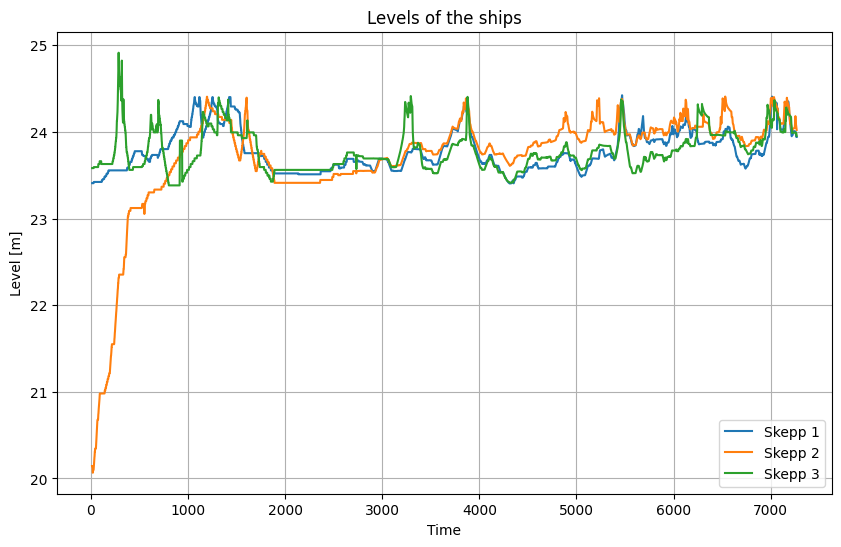

In [26]:
# top level adjustment
#0 - 24.3 m volume step of 0.05

path_levels = 'C:/Users/extaxha/Documents/project_data/Nivåer.xlsx'
df_levels = pd.read_excel(path_levels, sheet_name='Sheet1')

df_levels = df_levels.iloc[13:, 8:12]
df_levels.columns = ['Datum', 'Skepp 1 [m]', 'Skepp 2 [m]', 'Skepp 3 [m]']


df_levels['Skepp 1 [m]'].iloc[453:512] = df_levels['Skepp 1 [m]'].iloc[452]
df_levels['Skepp 2 [m]'].iloc[453:512] = df_levels['Skepp 2 [m]'].iloc[452]
df_levels['Skepp 3 [m]'].iloc[453:512] = df_levels['Skepp 3 [m]'].iloc[452]

# Reshape the 1D array into a 2D array with one column
df_levels['Skepp 1 [m]'] = replace_odd_datapoints(df_levels['Skepp 1 [m]'].values.reshape(-1, 1), threshold=1.3, step=2)[0].flatten()
df_levels['Skepp 2 [m]'] = replace_odd_datapoints(df_levels['Skepp 2 [m]'].values.reshape(-1, 1), threshold=1.1, step=2)[0].flatten()
df_levels['Skepp 3 [m]'] = replace_odd_datapoints(df_levels['Skepp 3 [m]'].values.reshape(-1, 1), threshold=1.3, step=2)[0].flatten()


plt.figure(figsize=(10, 6))
plt.plot(df_levels['Skepp 1 [m]'], label='Skepp 1')
plt.plot(df_levels['Skepp 2 [m]'], label='Skepp 2')
plt.plot(df_levels['Skepp 3 [m]'], label='Skepp 3')
plt.title('Levels of the ships')
plt.xlabel('Time')
plt.ylabel('Level [m]')
plt.legend()
plt.grid()
plt.show()


Actual min value 46.09 °C
Actual max value 96.79 °C
Average of typical_low: [55.09711621 55.95935095 56.8799753 ]
Average of typical_high: [86.86978398 87.74815562 85.98400054]
Mode of typical_low (rounded to 1 decimal): 59.8 with count 357
Mode of typical_high (rounded to 1 decimal): 87.5 with count 357


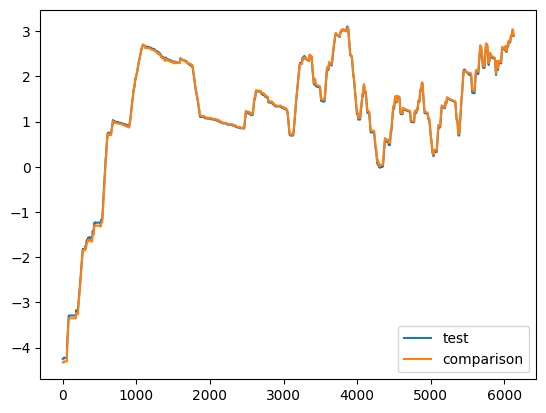

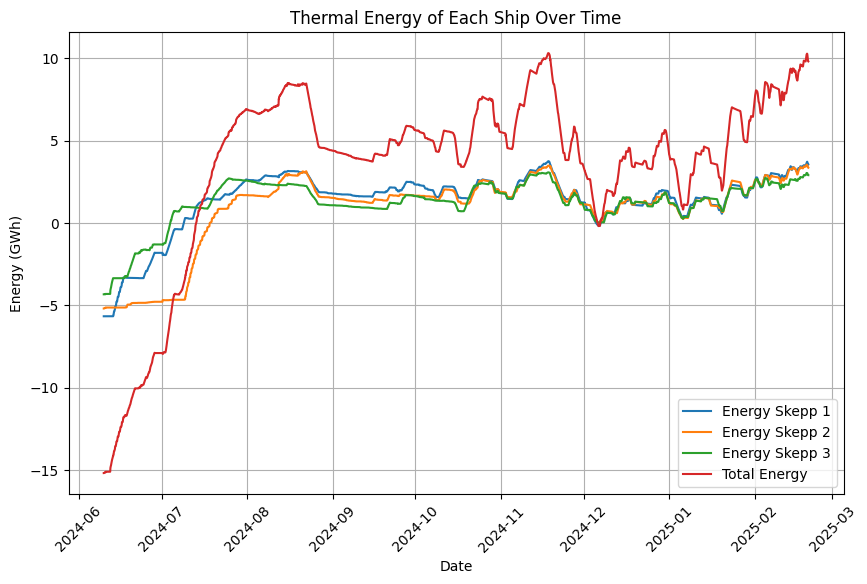

In [27]:
from scipy.stats import mode

def thermal_energy_new(T_bot_min, T_top_min, T, V, top_layer, top_volume, degree=1):
    """Heat function. Calculates the energy at every instant using the temperature & volume gradient. This includes a varying top layer."""

    # Allocate
    E = np.zeros(len(T))
    T_copy = np.copy(T)

    T_top =np.zeros((len(T_copy),1))

    for t, temp in enumerate(T_copy):
        T_top[t] = temp[-1]

    # remove the last layer from the temperature array
    T_new = T_copy[:, :-1] 
    T_top = T_top.flatten()

    # define top layer
    top_layer_h = top_layer - 23

    # Ensure top_layer_h is non-negative
    top_layer_h = top_layer_h.clip(lower=0)

    # Calculate the index based on the height and step size
    i = (top_layer_h / 0.05).astype(int)

    # Ensure the index does not exceed the length of top_volume1
    i = i[0:np.size(E)]

    # Calculate the volume for the top layer
    V_last = np.array([np.sum(top_volume[:index]) for index in i])

    # Calculate the heat energy at every data point, time and depth level
    if isinstance(T_new, np.ndarray) and not isinstance(T_new[0], float):
        q = (T_new - min_temperature_distribution(T_new[0], T_bot_min, T_top_min, degree)) * V[0:-1] * water_density(T_new) * water_specific_heat(T_new)
    else:
        q = (T_new - min_temperature_distribution(T_new, T_bot_min, T_top_min, degree)) * V[0:-1] * water_density(T_new) * water_specific_heat(T_new)

    q_last = (T_top - T_bot_min) * V_last * water_density(T_top) * water_specific_heat(T_top)

    # Sum up the energy for each depth level
    for i in range(len(q)): 
        E[i] =+ np.sum(q[i]) + q_last[i]

    return E/(3600*1e9) # Convert to GWh



def thermal_energy(T_bot_min, T_top_min, T, V, degree=1):
    """Heat function. Calculates the energy at every instant using the temperature & volume gradient. """

    # Allocate memory for the energy
    E = np.zeros(len(T))

    # Calculate the heat energy at every data point, time and depth level
    if isinstance(T, np.ndarray) and not isinstance(T[0], float):
        q = (T - min_temperature_distribution(T[0], T_bot_min, T_top_min, degree)) * V * water_density(T) * water_specific_heat(T)
    else:
        q = (T - min_temperature_distribution(T, T_bot_min, T_top_min, degree)) * V * water_density(T) * water_specific_heat(T)
        
    # Sum up the energy for each depth level
    for i in range(len(q)): 
        E[i] =+ np.sum(q[i])

    return E/(3600*1e9) # Convert to GWh

def water_density(T):
    """Water Density. Calculates the density of water at a given temperature. [kg/m^3] """
    return 1000.6 - 0.0128 * T**1.76

def water_specific_heat(T):
    """Water Specific Heat. Calculates the specific heat of water at a given temperature. [J/kg*K] """
    return 4209.1 - 132.8 * 1e-2 * T + 143.2 * 1e-4 * T**2

def min_temperature_distribution(T, T_bot_min, T_top_min, degree=1):
    """Minimum Temperature Distribution. Calculates the minimum temperature distribution of the water. """
    
    # Constant distribution
    if degree == 0:
        return np.full(len(T), T_bot_min)
    # Linear distribution
    elif degree == 1:
        return np.linspace(T_bot_min, T_top_min, len(T))
    # Polynomial fit - distribution
    elif degree >= 2:
        x = np.linspace(0, 1, len(T))
        coeffs = np.polyfit([0, 1], [T_bot_min, T_top_min], degree)
        return np.polyval(coeffs, np.linspace(0, 1, len(T)))
    # Logarithmic fit - distribution
    elif degree == -1:
        x = np.linspace(1, len(T), len(T))
        log_fit = np.polyfit(np.log(x), [T_bot_min + (T_top_min - T_bot_min) * (i / (len(T) - 1)) for i in range(len(T))], 1)
        return np.polyval(log_fit, np.log(x))
    else:
        raise ValueError("Degree must be >= 0 or -1")
    
# Minimum temperatures for the bottom and top of the ship
t_bot_min = 45
t_top_min = 70


actual_min_temp = round(min(np.min(skepp1_temp[-3000:]),np.min(skepp2_temp[-3000:]),np.min(skepp3_temp[-3000:])),2)
actual_max_temp = round(max(np.max(skepp1_temp),np.max(skepp2_temp),np.max(skepp3_temp)),2)
print(f'Actual min value {actual_min_temp} °C')
print(f'Actual max value {actual_max_temp} °C')


# Find the mode of the temperature distribution
typical_low = np.zeros((len(skepp1_temp),3))
typical_high =np.zeros((len(skepp1_temp),3))
for t,temp in enumerate(skepp1_temp):

    typical_low[t,:] = temp[:3]
    typical_high[t,:] = temp[-3:]

# calculate the average
average_low = np.mean(typical_low[2000:], axis=0)
average_high = np.mean(typical_high[2000:], axis=0)

print(f"Average of typical_low: {average_low}")
print(f"Average of typical_high: {average_high}")

# Calculate the mode of the rounded values in typical_low
mode_low = mode(np.round(typical_low[2000:], decimals=1), axis=None)
mode_high = mode(np.round(typical_high[2000:], decimals=1), axis=None)

print(f"Mode of typical_low (rounded to 1 decimal): {mode_low.mode} with count {mode_high.count}")
print(f"Mode of typical_high (rounded to 1 decimal): {mode_high.mode} with count {mode_high.count}")


# Calculate the thermal energy for each ship
energy_skepp1 = thermal_energy(t_bot_min,t_top_min, skepp1_temp, skepp1_sep_vol_y,2)
energy_skepp2 = thermal_energy(t_bot_min,t_top_min, skepp2_temp, skepp2_sep_vol_y,2)
energy_skepp3 = thermal_energy(t_bot_min,t_top_min, skepp3_temp, skepp3_sep_vol_y,2)


###########################
test1 = thermal_energy_new(t_bot_min,t_top_min, skepp3_temp, skepp3_sep_vol_y, df_levels['Skepp 3 [m]'],top_volume3,2)

plt.plot(test1, label='test')
plt.plot(energy_skepp3, label='comparison')
plt.legend()
##########################


plt.figure(figsize=(10, 6))
plt.plot(temp_time, energy_skepp1, label='Energy Skepp 1')
plt.plot(temp_time, energy_skepp2, label='Energy Skepp 2')
plt.plot(temp_time, energy_skepp3, label='Energy Skepp 3')
plt.plot(temp_time, energy_skepp1 + energy_skepp2 + energy_skepp3, label='Total Energy')
plt.xlabel('Date')
plt.ylabel('Energy (GWh)')
plt.title('Thermal Energy of Each Ship Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



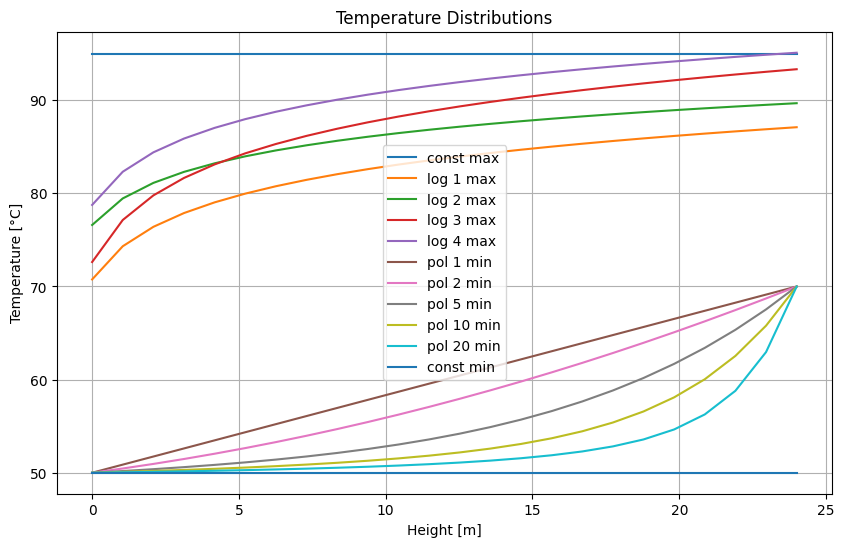

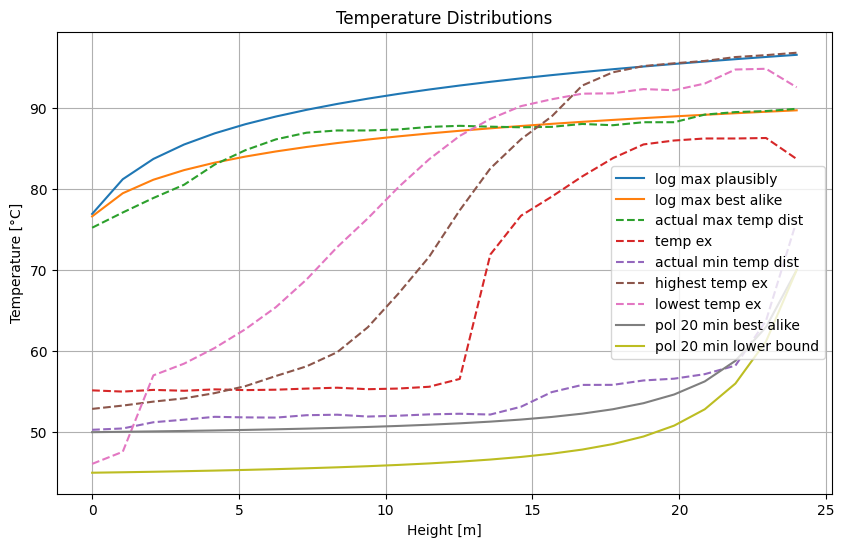

In [28]:
def find_temp_dist(T,min_max):
    """Find the actual max/min temperature distribution. """
    row_means = np.mean(T, axis=1)

    if min_max == 'min':
        i = np.argmin(row_means)
        return T[i]
    elif min_max == 'max':
        i = np.argmax(row_means)
        return T[i]

def find_extreme_index(data, mode='max'):
    """Find the time index where the max/min temperature occurs. """
    
    # Flatten the data to find the index of the max/min value
    data = np.array(data)
    
    if mode == 'max':
        flat_index = np.argmax(data)
    elif mode == 'min':
        flat_index = np.argmin(data)
    else:
        raise ValueError("mode must be 'max' or 'min'")
    
    # Convert flat index to row index
    row_index = np.unravel_index(flat_index, data.shape)[0]
    return row_index

# Test min_temperature_distribution function and plot the result
p_1 = min_temperature_distribution(skepp1_temp[0], 50, 70, 1)
p_2 = min_temperature_distribution(skepp1_temp[0], 50, 70, 2)
p_5 = min_temperature_distribution(skepp1_temp[0], 50, 70, 5)
p_10 = min_temperature_distribution(skepp1_temp[0], 50, 70, 10)
p_0 = min_temperature_distribution(skepp1_temp[0], 50, 45, 0)
p_max = min_temperature_distribution(skepp1_temp[0], 95, 95, 0)
p_min = min_temperature_distribution(skepp1_temp[0], 45, 70, 20)
x = np.linspace(0, len(p_1), len(p_1))


# Find some actual min/max temperature distributions and exemples
act_temp = skepp1_temp[4000]
act_temp_max = find_temp_dist(skepp1_temp, 'max')
act_temp_min = find_temp_dist(skepp1_temp[2000:], 'min')

temp_max_log_dist = min_temperature_distribution(skepp1_temp[0], 78, 97, -1) # actually 95 max but 100 makes the fit better
log_dis_1 = min_temperature_distribution(skepp1_temp[0], 75, 90, -1)
log_dis_2 = min_temperature_distribution(skepp1_temp[0], 83, 98, -1)
temp_best_alike_max_log_dis = min_temperature_distribution(skepp1_temp[0], 80, 92, -1)
temp_best_plausibly_log  = min_temperature_distribution(skepp1_temp[0], 82, 100, -1)
p_best_alike_min = min_temperature_distribution(skepp1_temp[0], 50, 70, 20)

plt.figure(figsize=(10, 6))
plt.plot(x, p_max, label= 'const max')
plt.plot(x, log_dis_1, label='log 1 max')
plt.plot(x, temp_best_alike_max_log_dis, label= 'log 2 max')
plt.plot(x, temp_max_log_dist, label= 'log 3 max')
plt.plot(x, log_dis_2, label='log 4 max')
plt.plot(x, p_1, label= 'pol 1 min')
plt.plot(x, p_2, label= 'pol 2 min')
plt.plot(x, p_5, label= 'pol 5 min')
plt.plot(x, p_10, label= 'pol 10 min')
plt.plot(x, p_best_alike_min, label= 'pol 20 min')
plt.plot(x, p_0, label= 'const min')
plt.xlabel('Height [m]')
plt.ylabel('Temperature [°C]')
plt.title('Temperature Distributions')
plt.legend()
plt.grid(True)


max_temp_index = find_extreme_index(skepp2_temp, 'max')
init = 3000
min_temp_index = find_extreme_index(skepp3_temp[init:], 'min') + init

plt.figure(figsize=(10, 6))
plt.plot(x, temp_best_plausibly_log, label= 'log max plausibly')
plt.plot(x, temp_best_alike_max_log_dis, label= 'log max best alike')
plt.plot(x, act_temp_max, linestyle='--', label='actual max temp dist')
plt.plot(x, act_temp,linestyle='--', label= 'temp ex')
plt.plot(x, act_temp_min, linestyle='--',label= 'actual min temp dist')
plt.plot(x, skepp2_temp[max_temp_index],linestyle='--', label='highest temp ex') #
plt.plot(x, skepp3_temp[min_temp_index],linestyle='--', label= 'lowest temp ex')
plt.plot(x, p_best_alike_min, label= 'pol 20 min best alike')
plt.plot(x, p_min, label= 'pol 20 min lower bound')
plt.xlabel('Height [m]')
plt.ylabel('Temperature [°C]')
plt.title('Temperature Distributions')
plt.legend()
plt.grid(True)



In the plot above one can a few different temperature distrubution along the height of the storage. The middle one is an actual distrubution whilst the other are suggestion of how the min and max distrubution can look like. Both the constant max and min are unrealistic. The log-fit-max curve might be realistic. The question is: which of the polynomial fits for the lower limit is most realistic? 

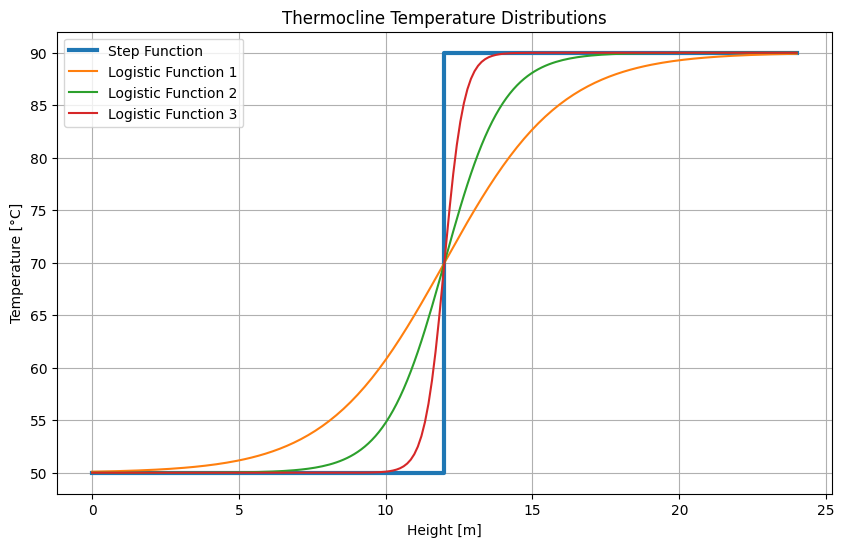

In [29]:

x = np.linspace(0, 24, 200)
step_function = np.where((x >= 12) & (x <= 85), 1, 0)
logistic_function1 = 1 / (1 + np.exp(-0.5 * (x - 12))) * 40 + 50
logistic_function2 = 1 / (1 + np.exp(-1 * (x - 12))) * 40 + 50
logistic_function3 = 1 / (1 + np.exp(-3 * (x - 12))) * 40 + 50

plt.figure(figsize=(10, 6))
plt.step(x, step_function * 40 + 50, where='mid', linewidth=3, label='Step Function')
plt.plot(x, logistic_function1, label='Logistic Function 1')
plt.plot(x, logistic_function2, label='Logistic Function 2')
plt.plot(x, logistic_function3, label='Logistic Function 3')
plt.ylabel('Temperature [°C]')
plt.xlabel('Height [m]')
plt.title('Thermocline Temperature Distributions')
plt.legend()
plt.grid(True)



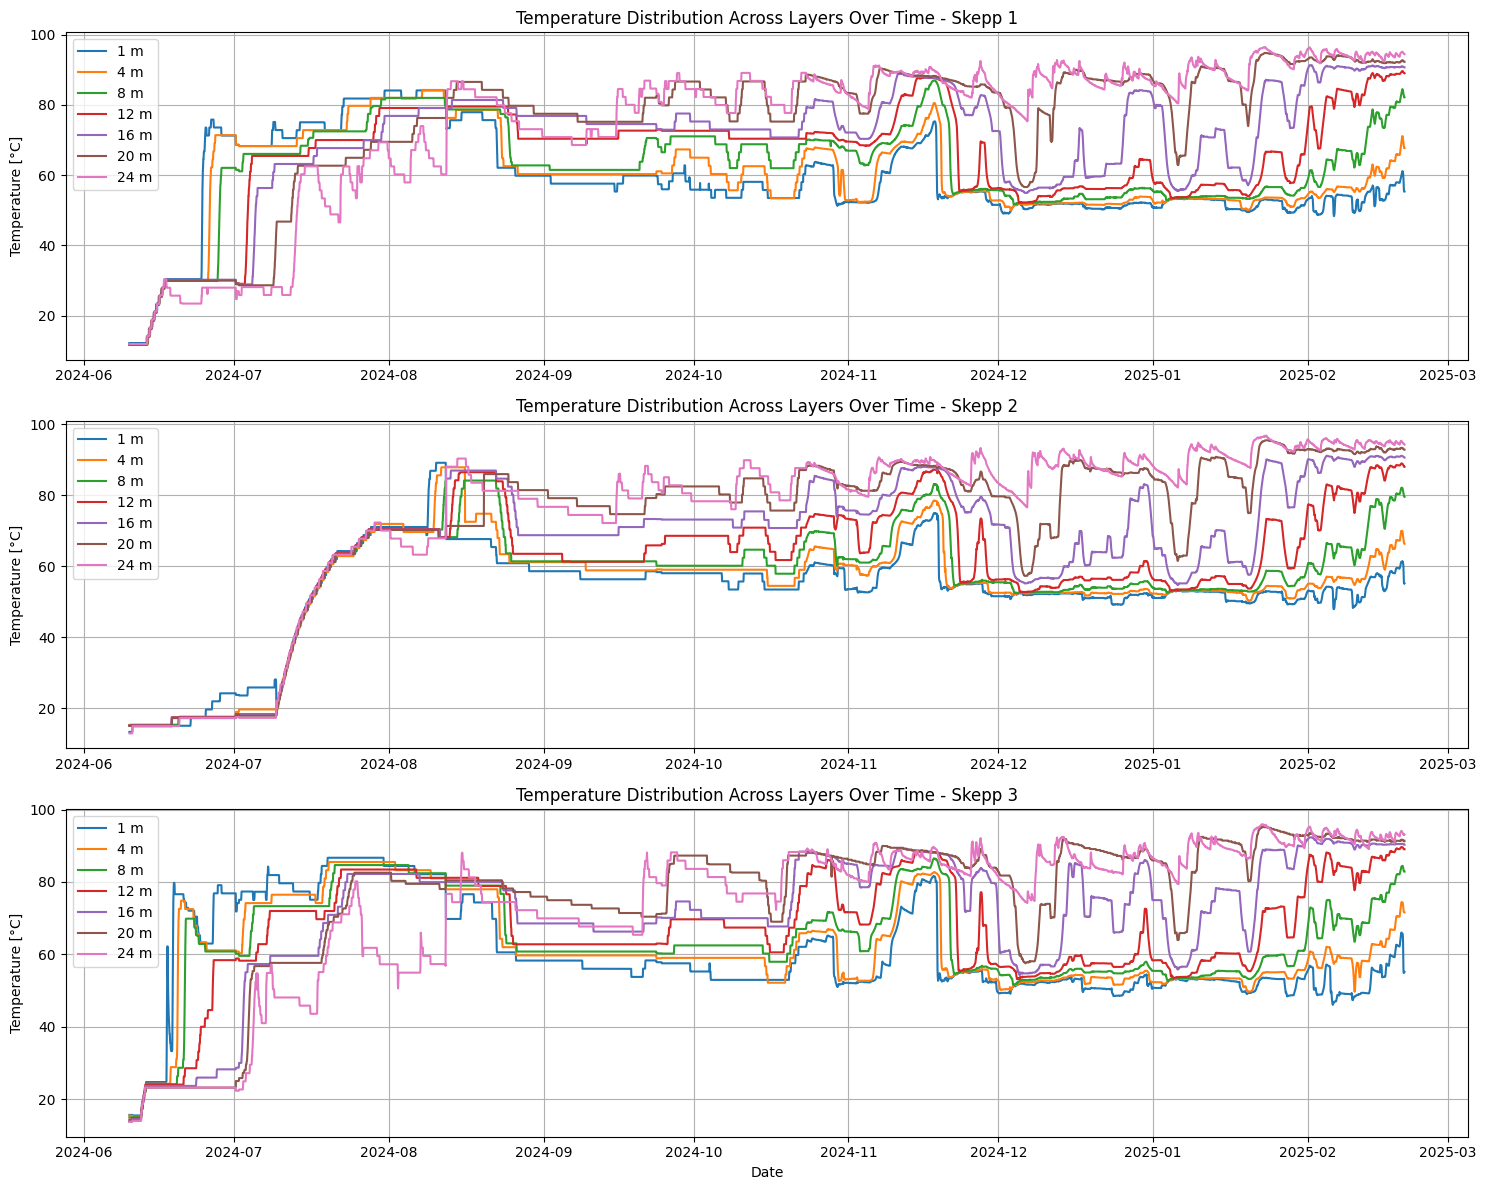

In [30]:
def extract_layers(temp_data, layers):
    """Extract specific layers from temperature data."""

    # preallocate the matrix
    layer_matrix = np.zeros((len(temp_data), len(layers)))
    
    # Extract the layers
    for i in range(len(temp_data)):
        for j, layer in enumerate(layers):
            layer_matrix[i, j] = temp_data[i][layer]
    
    return layer_matrix

# Define the layers to extract
layers = [0, 3, 7, 11, 15, 19, 23]

# Extract the layers for skepp1_temp
layer_matrix1 = extract_layers(skepp1_temp, layers)
layer_matrix2 = extract_layers(skepp2_temp, layers)
layer_matrix3 = extract_layers(skepp3_temp, layers)


plt.figure(figsize=(15, 12))

# Plot layers over time for skepp1_temp
plt.subplot(3, 1, 1)
for i, layer in enumerate(layers):
    plt.plot(temp_time, layer_matrix1[:, i], label=f'{layer+1} m')
plt.ylabel('Temperature [°C]')
plt.title('Temperature Distribution Across Layers Over Time - Skepp 1')
plt.legend()
plt.grid(True)

# Plot layers over time for skepp2_temp
plt.subplot(3, 1, 2)
for i, layer in enumerate(layers):
    plt.plot(temp_time, layer_matrix2[:, i], label=f'{layer+1} m')
plt.ylabel('Temperature [°C]')
plt.title('Temperature Distribution Across Layers Over Time - Skepp 2')
plt.legend()
plt.grid(True)

# Plot layers over time for skepp3_temp
plt.subplot(3, 1, 3)
for i, layer in enumerate(layers):
    plt.plot(temp_time, layer_matrix3[:, i], label=f'{layer+1} m')
plt.xlabel('Date')
plt.ylabel('Temperature [°C]')
plt.title('Temperature Distribution Across Layers Over Time - Skepp 3')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()




Fitted parameters: [20.33362945 68.14329998  0.40833174  1.62369155]
RMSE: 0.600056388760846
R-squared: 0.9768893529320052


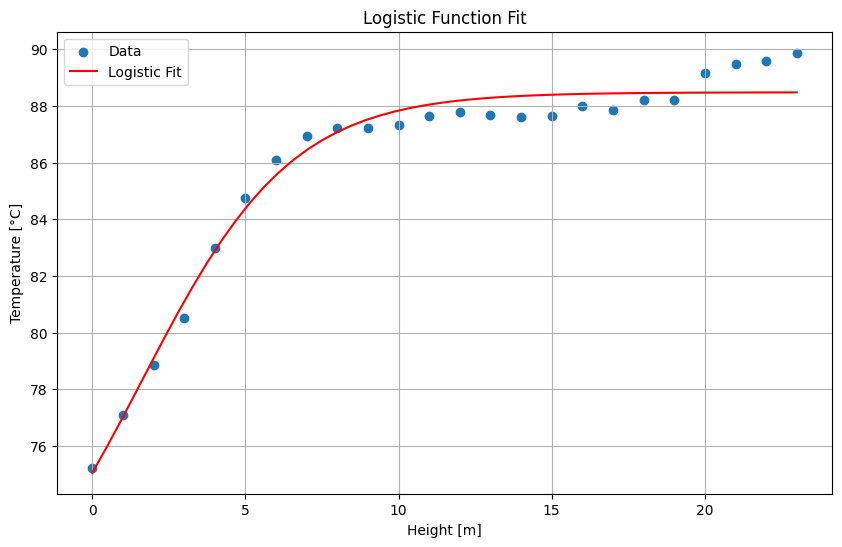

In [31]:
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution

def func(x, a, b, c, d):
    """Logistic function. """
    return a / (1.0 + np.exp(-c * (x - d))) + b

# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore")  # do not print warnings by genetic algorithm
    try:
        val = func(xData, *parameterTuple)
        return np.sum((yData - val) ** 2.0)
    except Exception as e:
        return np.inf  # Return a large value if the function fails

# generate initial parameter values
def generate_Initial_Parameters():
    """Initial parameter generation. """
    parameterBounds = []
    parameterBounds.append([0.0, 100.0]) # search bounds for a
    parameterBounds.append([-10.0, 0.0]) # search bounds for b
    parameterBounds.append([0.0, 10.0]) # search bounds for c
    parameterBounds.append([0.0, 10.0]) # search bounds for d

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

def logistical_model(xData,yData):
    """Logistical model. """
    # by default, differential_evolution completes by calling curve_fit() using parameter bounds
    geneticParameters = generate_Initial_Parameters()

    # now call curve_fit without passing bounds from the genetic algorithm,
    # just in case the best fit parameters are aoutside those bounds
    fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters)
    print('Fitted parameters:', fittedParameters)

    modelPredictions = func(xData, *fittedParameters) 

    absError = modelPredictions - yData

    SE = np.square(absError) # squared errors
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(yData))
    
    # create data for the fitted equation plot
    xModel = np.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    return yModel, xModel

# Ensure xData and yData have compatible shapes
xData = np.linspace(0, len(act_temp_max) - 1, len(act_temp_max))  # Generate xData with the same length as yData
yData = act_temp_max
y_fit, x_fit = logistical_model(xData, yData)

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(xData, act_temp_max, label='Data')
plt.plot(x_fit, y_fit, label='Logistic Fit', color='red')
plt.xlabel('Height [m]')
plt.ylabel('Temperature [°C]')
plt.legend()
plt.title('Logistic Function Fit')
plt.grid(True)
plt.show()


In [32]:
# Theoretical max? According to data it is above 90 and below 50, more likely 95 and 45
t_theo_max = np.full_like(temp_max_log_dist, 90)
theoretical_e1 = np.sum(thermal_energy(50, 50, t_theo_max, skepp1_sep_vol_y, 0))
theoretical_e2 = np.sum(thermal_energy(50, 50, t_theo_max, skepp2_sep_vol_y, 0))
theoretical_e3 = np.sum(thermal_energy(50, 50, t_theo_max, skepp3_sep_vol_y, 0))
print(f'Theoretical capacity 50-90 const:                                                {round(theoretical_e1 + theoretical_e2 + theoretical_e3,2)} GWh')

# Theoretical max? According to data it is above 90 and below 50, more likely 95 and 45
t_theo_max_H = np.full_like(temp_max_log_dist, 95)
theoretical_e1_H = np.sum(thermal_energy(45, 45, t_theo_max_H, skepp1_sep_vol_y, 0))
theoretical_e2_H = np.sum(thermal_energy(45, 45, t_theo_max_H, skepp2_sep_vol_y, 0))
theoretical_e3_H = np.sum(thermal_energy(45, 45, t_theo_max_H, skepp3_sep_vol_y, 0))
print(f'Theoretical capacity 45-95 const:                                                {round(theoretical_e1_H + theoretical_e2_H + theoretical_e3_H,2)} GWh')

# Theoretical max? According to data it is above 90 and below 50, more likely 95 and 45
t_theo_max_H = np.full_like(temp_max_log_dist, 95)
theoretical_e1_HL = np.sum(thermal_energy(50, 50, t_theo_max_H, skepp1_sep_vol_y, 0))
theoretical_e2_HL = np.sum(thermal_energy(50, 50, t_theo_max_H, skepp2_sep_vol_y, 0))
theoretical_e3_HL = np.sum(thermal_energy(50, 50, t_theo_max_H, skepp3_sep_vol_y, 0))
print(f'Theoretical capacity 50-95 const:                                                {round(theoretical_e1_HL + theoretical_e2_HL + theoretical_e3_HL,2)} GWh')

# Simple theoretical max, 40 degrees diff (difference is c and rho temperature dependency)
theoretical_simp1 = 4186*1000*np.sum(skepp1_sep_vol_y)*(90-50)/(3600*1e9)
theoretical_simp2 = 4186*1000*np.sum(skepp2_sep_vol_y)*(90-50)/(3600*1e9)
theoretical_simp3 = 4186*1000*np.sum(skepp3_sep_vol_y)*(90-50)/(3600*1e9)
print(f'Theoretical capacity 50-90 cosnst (no rho and c T dependence):                   {round(theoretical_simp1 + theoretical_simp2 + theoretical_simp3,2)} GWh')

# Simple theoretical max, 50 degrees diff (difference is c and rho temperature dependency)
theoretical_simp1_H = 4186*1000*np.sum(skepp1_sep_vol_y)*(95-45)/(3600*1e9)
theoretical_simp2_H = 4186*1000*np.sum(skepp2_sep_vol_y)*(95-45)/(3600*1e9)
theoretical_simp3_H = 4186*1000*np.sum(skepp3_sep_vol_y)*(95-45)/(3600*1e9)
print(f'Theoretical capacity 45-95 const (no rho and c T dependence):                    {round(theoretical_simp1_H + theoretical_simp2_H + theoretical_simp3_H,2)} GWh')

# Simple theoretical max, 50 degrees diff (difference is c and rho temperature dependency)
theoretical_simp1_HL = 4186*1000*np.sum(skepp1_sep_vol_y)*(95-50)/(3600*1e9)
theoretical_simp2_HL = 4186*1000*np.sum(skepp2_sep_vol_y)*(95-50)/(3600*1e9)
theoretical_simp3_HL = 4186*1000*np.sum(skepp3_sep_vol_y)*(95-50)/(3600*1e9)
print(f'Theoretical capacity 50-95 const (no rho and c T dependence):                    {round(theoretical_simp1_HL + theoretical_simp2_HL + theoretical_simp3_HL,2)} GWh')

print('')

# With max plausible temperature distribution
log_distrubution_e1_H = np.sum(thermal_energy(45, 70, temp_best_plausibly_log, skepp1_sep_vol_y, 20))
log_distrubution_e2_H = np.sum(thermal_energy(45, 70, temp_best_plausibly_log, skepp2_sep_vol_y, 20))
log_distrubution_e3_H = np.sum(thermal_energy(45, 70, temp_best_plausibly_log, skepp3_sep_vol_y, 20))
print(f'Energy with possible max log distribution & p20 min (45-95) (plausibly):         {round(log_distrubution_e1_H + log_distrubution_e2_H + log_distrubution_e3_H,2)} GWh')

# With max plausible temperature distribution
log_distrubution_e1 = np.sum(thermal_energy(50, 70, temp_best_plausibly_log, skepp1_sep_vol_y, 20))
log_distrubution_e2 = np.sum(thermal_energy(50, 70, temp_best_plausibly_log, skepp2_sep_vol_y, 20))
log_distrubution_e3 = np.sum(thermal_energy(50, 70, temp_best_plausibly_log, skepp3_sep_vol_y, 20))
print(f'Energy with possible max log distribution & p20 min (50-95) (plausibly):         {round(log_distrubution_e1+log_distrubution_e2+log_distrubution_e3,2)} GWh')

print('')

# With actual max and min distributions (fitted for actual temp)
log_distrubution_e1 = np.sum(thermal_energy(50, 70, temp_best_alike_max_log_dis, skepp1_sep_vol_y, 20))
log_distrubution_e2 = np.sum(thermal_energy(50, 70, temp_best_alike_max_log_dis, skepp2_sep_vol_y, 20))
log_distrubution_e3 = np.sum(thermal_energy(50, 70, temp_best_alike_max_log_dis, skepp3_sep_vol_y, 20))
print(f'Energy with log distribution & p20 min (50-90) (fitted for actual temp):         {round(log_distrubution_e1+log_distrubution_e2+log_distrubution_e3,2)} GWh')


# Actual max historically, with acutal max
act_energy_max1 = np.sum(thermal_energy(50, 70, act_temp_max, skepp1_sep_vol_y, 20))
act_energy_max2 = np.sum(thermal_energy(50, 70, act_temp_max, skepp2_sep_vol_y, 20))
act_energy_max3 = np.sum(thermal_energy(50, 70, act_temp_max, skepp3_sep_vol_y, 20))

print(f'Actual max capacity calculated (historically) with actual max                    {round(act_energy_max1 + act_energy_max2 + act_energy_max3,2)} GWh')
print(f'Actual max capacity measured (historically)                                      {round(max(df_power['Total Energi [MWh]'])/1000,2)} GWh')



Theoretical capacity 50-90 const:                                                13.76 GWh
Theoretical capacity 45-95 const:                                                17.17 GWh
Theoretical capacity 50-95 const:                                                15.45 GWh
Theoretical capacity 50-90 cosnst (no rho and c T dependence):                   14.19 GWh
Theoretical capacity 45-95 const (no rho and c T dependence):                    17.74 GWh
Theoretical capacity 50-95 const (no rho and c T dependence):                    15.97 GWh

Energy with possible max log distribution & p20 min (45-95) (plausibly):         14.66 GWh
Energy with possible max log distribution & p20 min (50-95) (plausibly):         13.21 GWh

Energy with log distribution & p20 min (50-90) (fitted for actual temp):         11.45 GWh
Actual max capacity calculated (historically) with actual max                    11.44 GWh
Actual max capacity measured (historically)                                      10.45 G

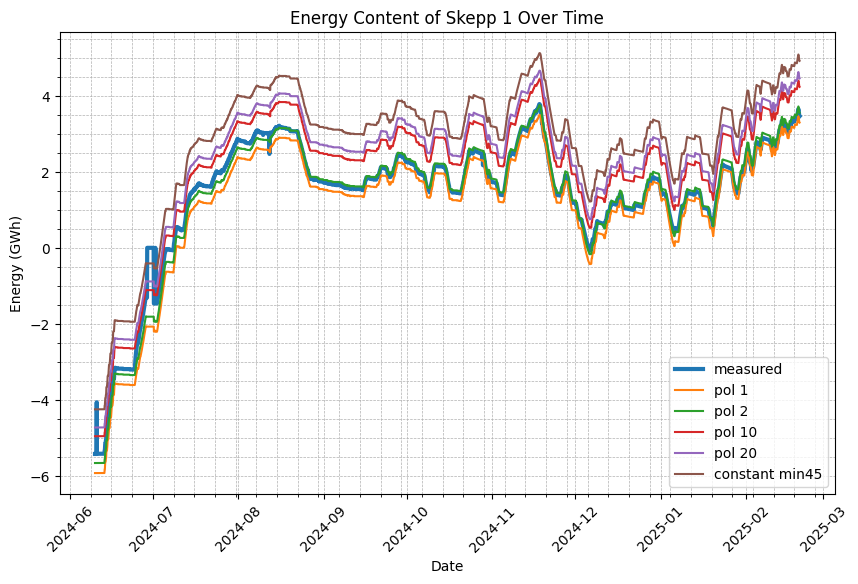

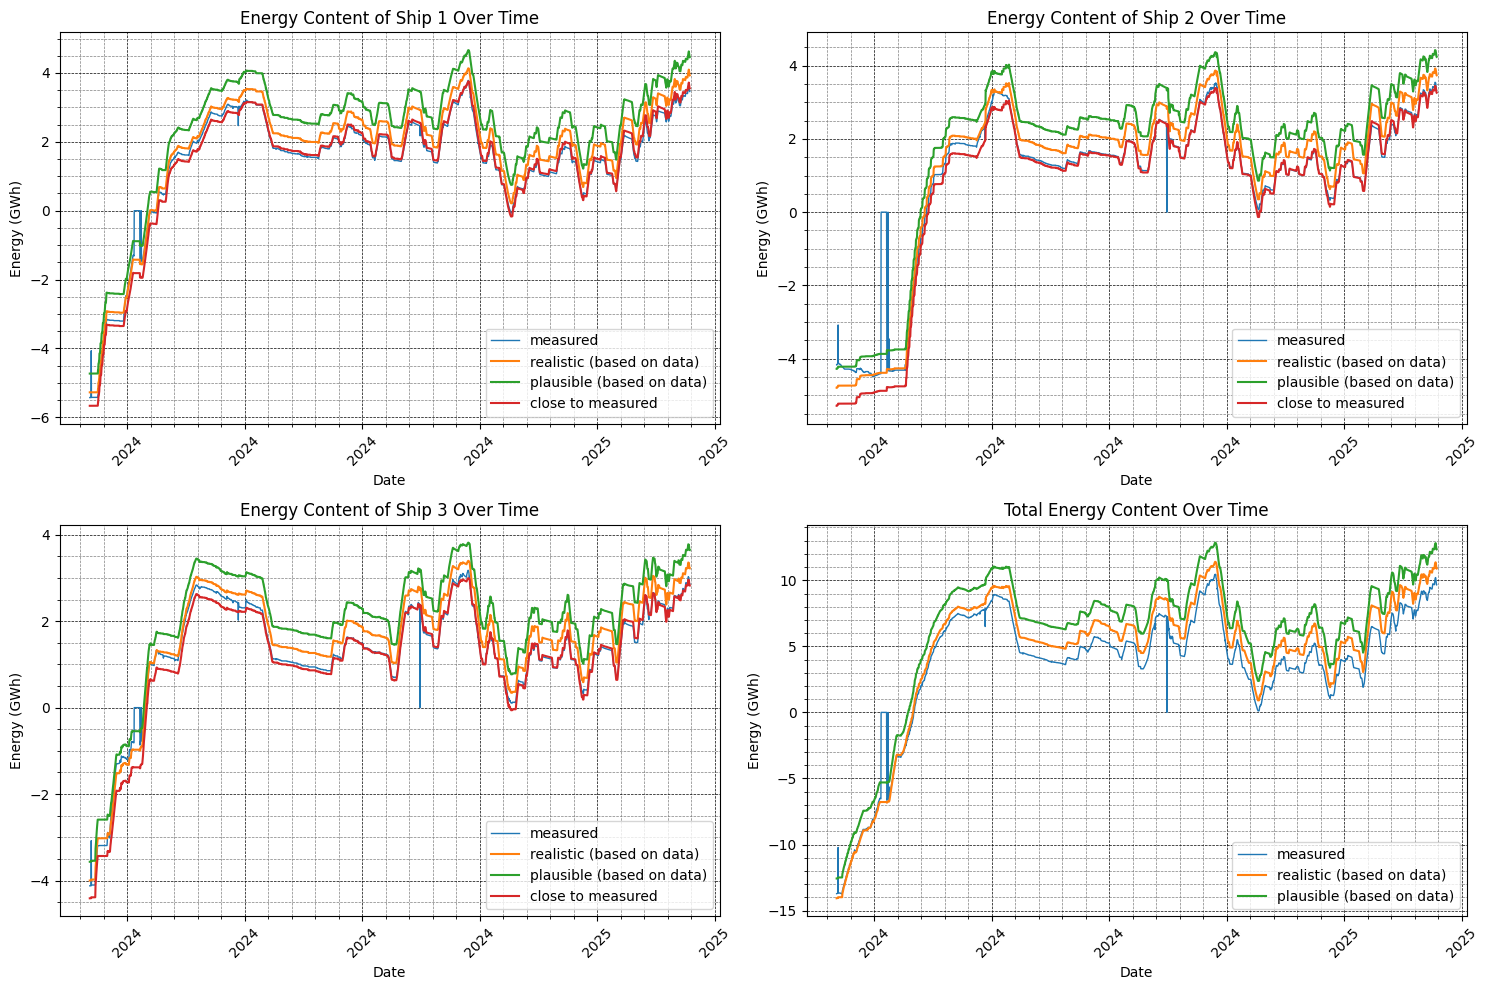

In [33]:
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import AutoLocator

# pol energy calc
energy_skepp1_pol1 = thermal_energy(t_bot_min,t_top_min, skepp1_temp, skepp1_sep_vol_y,1)
energy_skepp1_pol2 = thermal_energy(t_bot_min,t_top_min, skepp1_temp, skepp1_sep_vol_y,2)
energy_skepp1_pol3 = thermal_energy(t_bot_min,t_top_min, skepp1_temp, skepp1_sep_vol_y,10)
energy_skepp1_pol5 = thermal_energy(t_bot_min,t_top_min, skepp1_temp, skepp1_sep_vol_y,20)
energy_skepp1_pol4 = thermal_energy(t_bot_min,t_bot_min, skepp1_temp, skepp1_sep_vol_y,0)

# realistic, plausible and extra realistic energy calc
energy_skepp1_realistic = thermal_energy(50,70, skepp1_temp, skepp1_sep_vol_y,20)
energy_skepp1_plausible = thermal_energy(45,70, skepp1_temp, skepp1_sep_vol_y,20)

energy_skepp2_realistic = thermal_energy(50,70, skepp2_temp, skepp2_sep_vol_y,20)
energy_skepp2_plausible = thermal_energy(45,70, skepp2_temp, skepp2_sep_vol_y,20)
energy_skepp2_comp = thermal_energy(50,70, skepp2_temp, skepp2_sep_vol_y,4)

energy_skepp3_realistic = thermal_energy(50,70, skepp3_temp, skepp3_sep_vol_y,20)
energy_skepp3_plausible = thermal_energy(45,70, skepp3_temp, skepp3_sep_vol_y,20)
energy_skepp3_comp = thermal_energy(50,70, skepp3_temp, skepp3_sep_vol_y,4)







# Plot the energy of Skepp 1 over time
plt.figure(figsize=(10, 6))
plt.plot(temp_time, df_power['Skepp 1 Energi [MWh]']/1000, linewidth = 3, label='measured')
plt.plot(temp_time, energy_skepp1_pol1, label='pol 1')
plt.plot(temp_time, energy_skepp1_pol2, label='pol 2')
plt.plot(temp_time, energy_skepp1_pol3, label='pol 10')
plt.plot(temp_time, energy_skepp1_pol5, label='pol 20')
plt.plot(temp_time, energy_skepp1_pol4, label='constant min45')
plt.xlabel('Date')
plt.ylabel('Energy (GWh)')
plt.title('Energy Content of Skepp 1 Over Time')
plt.legend()
plt.grid(True)
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
# Loop through each subplot and apply the settings
for ax_row in axs:
	for ax in ax_row:
		ax.xaxis.set_major_locator(AutoLocator())
		ax.xaxis.set_minor_locator(AutoMinorLocator())
		ax.yaxis.set_major_locator(AutoLocator())
		ax.yaxis.set_minor_locator(AutoMinorLocator())
		# Enable both major and minor grid lines
		ax.grid(which='major', color='black', linestyle='-', linewidth=0.75)
		ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5)


# Plot for Skepp 1
axs[0, 0].plot(temp_time, df_power['Skepp 1 Energi [MWh]'] / 1000, linewidth=1, label='measured')
axs[0, 0].plot(temp_time, energy_skepp1_realistic, label='realistic (based on data)')
axs[0, 0].plot(temp_time, energy_skepp1_plausible, label='plausible (based on data)')
axs[0, 0].plot(temp_time, energy_skepp1_pol2, label='close to measured')
axs[0, 0].set_title('Energy Content of Ship 1 Over Time')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Energy (GWh)')
axs[0, 0].legend()
axs[0, 0].grid(True)
axs[0, 0].minorticks_on()
axs[0, 0].grid(which='both', linestyle='--', linewidth=0.5)
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot for Skepp 2
axs[0, 1].plot(temp_time, df_power['Skepp 2 Energi [MWh]'] / 1000, linewidth=1, label='measured')
axs[0, 1].plot(temp_time, energy_skepp2_realistic, label='realistic (based on data)')
axs[0, 1].plot(temp_time, energy_skepp2_plausible, label='plausible (based on data)')
axs[0, 1].plot(temp_time, energy_skepp2_comp, label='close to measured')
axs[0, 1].set_title('Energy Content of Ship 2 Over Time')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Energy (GWh)')
axs[0, 1].legend()
axs[0, 1].grid(True)
axs[0, 1].minorticks_on()
axs[0, 1].grid(which='both', linestyle='--', linewidth=0.5)
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot for Skepp 3
axs[1, 0].plot(temp_time, df_power['Skepp 3 Energi [MWh]'] / 1000, linewidth=1, label='measured')
axs[1, 0].plot(temp_time, energy_skepp3_realistic, label='realistic (based on data)')
axs[1, 0].plot(temp_time, energy_skepp3_plausible, label='plausible (based on data)')
axs[1, 0].plot(temp_time, energy_skepp3_comp, label='close to measured')
axs[1, 0].set_title('Energy Content of Ship 3 Over Time')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Energy (GWh)')
axs[1, 0].legend()
axs[1, 0].grid(True)
axs[1, 0].minorticks_on()
axs[1, 0].grid(which='both', linestyle='--', linewidth=0.5)
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot for Total Energy
axs[1, 1].plot(temp_time, df_power['Total Energi [MWh]']/1000, linewidth=1, label='measured')
axs[1, 1].plot(temp_time, energy_skepp1_realistic + energy_skepp2_realistic + energy_skepp3_realistic, label='realistic (based on data)')
axs[1, 1].plot(temp_time, energy_skepp1_plausible + energy_skepp2_plausible + energy_skepp3_plausible, label='plausible (based on data)')
axs[1, 1].set_title('Total Energy Content Over Time')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Energy (GWh)')
axs[1, 1].legend()
axs[1, 1].grid(True)
axs[1, 1].minorticks_on()
axs[1, 1].grid(which='both', linestyle='--', linewidth=0.5)
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

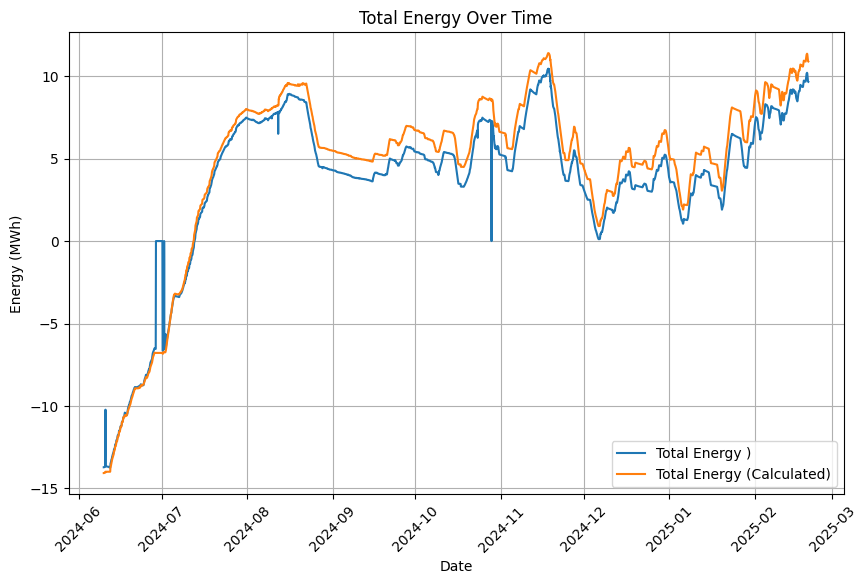

In [34]:
# Calculate the total energy over time

skepp1_energy = thermal_energy(50, 70, skepp1_temp, skepp1_sep_vol_y, 20)
skepp2_energy = thermal_energy(50, 70, skepp2_temp, skepp2_sep_vol_y, 20)
skepp3_energy = thermal_energy(50, 70, skepp3_temp, skepp3_sep_vol_y, 20)

total_energy = df_power['Total Energi [MWh]'].values/1000

# Plot the total energy over time
plt.figure(figsize=(10, 6))
plt.plot(temp_time, total_energy, label='Total Energy )')
plt.plot(temp_time, skepp1_energy + skepp2_energy + skepp3_energy, label='Total Energy (Calculated)')
plt.xlabel('Date')
plt.ylabel('Energy (MWh)')
plt.title('Total Energy Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Assure total volume

vol1 = np.sum(skepp1_sep_vol_y)
vol2 = np.sum(skepp2_sep_vol_y)
vol3 = np.sum(skepp3_sep_vol_y)

print(f'Total volume of the ship: {vol1+vol2+vol3} m^3')

Total volume of the ship: 305120 m^3
109922 106460 88738


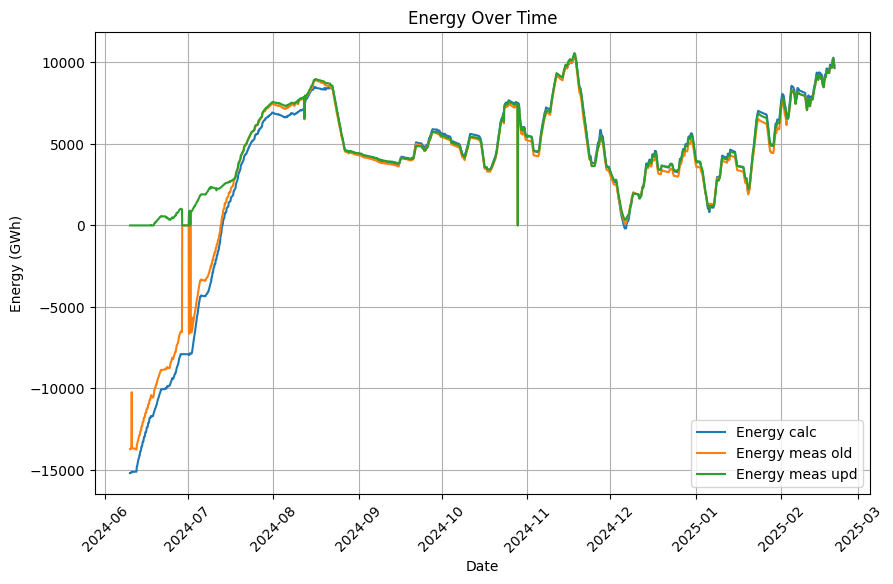

In [36]:
# check the total energy of updated version
power_path_upd = 'C:/Users/extaxha/Documents/project_data/Laddeffekter_upd_new.xlsx'
df_upd_power = pd.read_excel(power_path_upd)
columns_p = ['Datum','Total Energi [MWh]', 'Skepp 1 - Effekt [MW]', 'Skepp 1 Energi [MWh]','Skepp 2 - Effekt [MW]', 'Skepp 2 Energi [MWh]','Skepp 3 - Effekt [MW]', 'Skepp 3 Energi [MWh]']

df_upd_power = df_upd_power.iloc[13:, 8:-1]
df_upd_power.columns = columns_p

# Remove NaN values from the specified columns
#df_upd_power = df_upd_power.dropna(subset=columns_p)

# nya updaterade energi beräkningar- gör ingenting

# Calculate the total energy over time
plt.figure(figsize=(10, 6))
plt.plot(temp_time, (energy_skepp1+energy_skepp2+energy_skepp3)*1000, label='Energy calc')
plt.plot(temp_time, df_power['Total Energi [MWh]'], label='Energy meas old')
plt.plot(temp_time, df_upd_power['Total Energi [MWh]'].iloc[0:len(temp_time)], label='Energy meas upd')
plt.xlabel('Date')
plt.ylabel('Energy (GWh)')
plt.title('Energy Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [37]:
from scipy.ndimage import uniform_filter

# POWER CALCULATION FUNCTIONS

# Calculate the power of the ship
def calculate_power(energy, time, measured_charge, measured_discharge, threshold=10):           # ONE CAN CHANGE THIS, FOR DISCHARGE!
    """Calculate the power of a ship thrugh by using the gradient. A threshold is used. Does not work in the intial warming up. """
    # calculate the power through numeric gradient
    power = np.gradient(energy, time)
    
    # allocate memory for the charge, discharge and losses
    calc_charge = np.zeros_like(power)
    calc_discharge = np.zeros_like(power)
    losses = np.zeros_like(power)

    # calculate the charge, discharge and losses
    for i in range(1, len(power)):
        if measured_charge.iloc[i] > 0:
            # charge, for current and previous timepoint
            calc_charge[i] = power[i]
            if power[i-1] > threshold/2:
                calc_charge[i-1] = power[i-1]
        elif  measured_discharge.iloc[i] < 0: # power[i] < -threshold or
            # discharge, for current and previous timepoint
            calc_discharge[i] = power[i]
            if power[i-1] < -threshold/2:
                calc_discharge[i-1] = power[i-1]
        else: #power[i] < 0 and power[i] > -threshold/2:
            losses[i] = power[i]
  
    steady_losses = np.copy(losses)
    # calculate the losses from charge and discharge
    losses += (calc_charge - measured_charge)
    losses += (- calc_discharge + measured_discharge) # HÄR MAN SKA ÄNDRA TECKEN OM MAN VILL GÖRA TVÄRTOM OCH JUSTERA FÖR UTRÄKNADE URLADDNINGEN SKA VARA STÖRRE ÄN MÄTTA
   
   
    return power, calc_charge, calc_discharge, losses, steady_losses # add to check of measuread and calculated power is at the same time instant?

# calculate power from energy directly
def calulate_charge_based_on_energy(meas_power, energy):
    """Calculate charge based on energy. """
    
    measured_charge_index = np.where(meas_power > 0)[0]
    measured_discharge_index = np.where(meas_power < 0)[0]

    # alllocate 
    charging_periods = []
    discharging_periods = []
    current_period_charge = [measured_charge_index[0].item()]
    current_period_discharge = [measured_discharge_index[0].item()]

    # find the charging and discharging periods
    for i in range(1, len(measured_charge_index)):
        if measured_charge_index[i] == measured_charge_index[i-1] + 1:
            current_period_charge.append(measured_charge_index[i].item())
        else:
            current_period_charge.append(measured_charge_index[i-1].item())
            
            charging_periods.append(current_period_charge)
            current_period_charge = [measured_charge_index[i].item()]

    for i in range(1, len(measured_discharge_index)):
        if measured_discharge_index[i] == measured_discharge_index[i-1] + 1:
            current_period_discharge.append(measured_discharge_index[i].item())
        else:
            discharging_periods.append(current_period_discharge)
            current_period_discharge = [measured_discharge_index[i].item()]

    # add the last period
    charging_periods.append(current_period_charge)
    discharging_periods.append(current_period_discharge)

    # allocate for the charge and discharge periods
    charge_time = np.zeros((len(charging_periods), 2))
    discharge_time = np.zeros((len(discharging_periods), 2))

    # find the charge and discharge periods
    for j in range(0, len(charging_periods)-1):
        charge_time[j] = [charging_periods[j][0], charging_periods[j][-1]]

    for j in range(0, len(discharging_periods)-1):
        discharge_time[j] = [discharging_periods[j][0], discharging_periods[j][-1]]

    # allocate for the calculated power
    calc_power = np.zeros((len(energy), 1))

    # add one to the end time for
    charge_time[:,1] = charge_time[:,1] + 1
    discharge_time[:,1] = discharge_time[:,1] + 1

    # calculate the mean power based on the energy
    for k in range (0, len(charge_time)):
        index = charge_time[k].astype(int)
        calc_power[index[0]:index[1]] = (energy[index[1]] - energy[index[0]])/(index[1]-index[0]) #MWh / h

    for k in range (0, len(discharge_time)):
        index = discharge_time[k].astype(int)
        calc_power[index[0]:index[1]] = (energy[index[1]] - energy[index[0]])/(index[1]-index[0])


    return calc_power

# Smooth and adjust the power
def smooth_and_adjust_power(data,discharge_meas, threshold_factor=1, filter_size=5):
    """
    Smooth outliers in the data using a moving average filter and adjust positive peaks with negative ones.

    Parameters:
    data (array-like): The input data array.
    threshold_factor (float): The factor to determine the threshold for outliers.
    filter_size (int): The size of the moving average filter.

    Returns:
    array-like: The smoothed data with adjusted power values.
    """

    ################ ADJUST FOR POSITIVE LOSSES ################
    data_copy = np.copy(data)
    discharge_meas_copy = np.copy(discharge_meas)

    # Find the positive power values
    pos_power = np.where(data_copy > 0, data_copy, 0)

    # Find the values and indices where pos_power also corresponds to the discharging in discharge_meas
    discharge_indices = np.where(discharge_meas_copy < 0)[0]
    pos_power_indices = np.where(pos_power > 0)[0]

    # Find common indices
    common_indices = np.intersect1d(discharge_indices, pos_power_indices)

    # Create a new vector with the same indices, initialized with zeros
    new_vector = np.zeros_like(pos_power)

    # Save the common values at the common indices in the new vector
    new_vector[common_indices] = pos_power[common_indices]
    # Adjust the positive losses

    data_copy += - 2* new_vector


    ##########################################################
    # Define a threshold to identify outliers
    threshold = threshold_factor * np.std(data_copy)

    # Identify outliers
    mean = np.mean(data_copy)
    outliers = np.abs(data_copy - mean) > threshold
    smoothed_data = np.copy(data_copy)
    length = len(data_copy)

    for i in range(length):
            if smoothed_data[i] > 0:
                # Look for a negative peak within the window before and after the current index
                for j in range(max(0, i - filter_size), min(i + filter_size, length)):
                    if smoothed_data[j] < 0:
                        # Cancel out the peaks
                        adjustment = min(smoothed_data[i], abs(smoothed_data[j]))
                        smoothed_data[i] -= adjustment
                        smoothed_data[j] += adjustment
                        break

    # Apply a smoothing filter (moving average) to the outliers
    smoothed_data[outliers] = uniform_filter(smoothed_data, size=filter_size)[outliers]
    
    
    
    # Smooth the peaks that were not adjusted
    # Find the values and indices where pos_power also corresponds to the discharging in discharge_meas
    discharge_indices = np.where(discharge_meas_copy < 0)[0]
    neg_power_indices = np.where(smoothed_data < discharge_meas_copy)[0]

    # Find common indices
    common_indices = np.intersect1d(discharge_indices, neg_power_indices)
    smoothed_data[common_indices] = uniform_filter(smoothed_data, size=filter_size)[common_indices]


    # Adjust remaining positive peaks with negative ones
    positive_indices = smoothed_data > 0
    negative_indices = smoothed_data < 0

    positive_sum = np.sum(smoothed_data[positive_indices])
    negative_sum = np.sum(smoothed_data[negative_indices])

    if positive_sum > 0 and negative_sum < 0:
        adjustment_factor = positive_sum / abs(negative_sum)
        smoothed_data[negative_indices] *= (1 + adjustment_factor)
        smoothed_data[positive_indices] = 0
    

    # Adjust the smoothed data to preserve the sum
    original_sum = np.sum(data)
    smoothed_sum = np.sum(smoothed_data)
    if smoothed_sum != 0:
        adjustment_factor = original_sum / smoothed_sum
        smoothed_data *= adjustment_factor


    # Adjust the smoothed data to preserve the sum within each window
    # for start in range(0, length, filter_size*2):
    #     end = min(start + filter_size*2, length)
    #     window_original_sum = np.sum(data[start:end])
    #     window_smoothed_sum = np.sum(smoothed_data[start:end])
    #     if window_smoothed_sum != 0:
    #         adjustment_factor = window_original_sum / window_smoothed_sum
    #         smoothed_data[start:end] *= adjustment_factor
        
    #     smoothed_data[start:end][smoothed_data[start:end] > 0] = 0

        
    return smoothed_data

# Calculate the power through the smooth and andjust power
def power_loss_calculation(energy,time,df_power,threshold=1,filter_size=15,smooth=120):
    """Calculate the power loss over time. """
    power_loss_vec = np.gradient(energy, time)


    power_loss_vec_smooth = smooth_and_adjust_power(power_loss_vec,df_power,threshold,filter_size)
    power_loss_vec_smoothest = uniform_filter(power_loss_vec_smooth,smooth)

    if np.sum(power_loss_vec_smooth) - np.sum(power_loss_vec) > 0:
        print(energy.name, np.sum(power_loss_vec_smooth)-np.sum(power_loss_vec))
     

    return power_loss_vec, power_loss_vec_smooth, power_loss_vec_smoothest

# Find the charging,discharging and non periods
def find_charge_discharge(meas_power):
    
    # Find the indices for charging and discharing
    measured_charge_index = np.where(meas_power > 0)[0]
    measured_discharge_index = np.where(meas_power < 0)[0]

    # Find all indices
    all_indices = np.arange(len(meas_power))

    # Find the rest of the indices (neither charge nor discharge)
    rest_indices = np.setdiff1d(all_indices, np.concatenate((measured_charge_index, measured_discharge_index)))

    # alllocate 
    charging_periods = []
    discharging_periods = []
    non_periods = []
    current_period_charge = [measured_charge_index[0].item()]
    current_period_discharge = [measured_discharge_index[0].item()]
    current_period_non = [rest_indices[0].item()]

    # find the charging and discharging periods
    for i in range(1, len(measured_charge_index)):
        if measured_charge_index[i] == measured_charge_index[i-1] + 1:
            current_period_charge.append(measured_charge_index[i].item())
        else:
            #current_period_charge.append(measured_charge_index[i-1].item())
            charging_periods.append(current_period_charge)
            current_period_charge = [measured_charge_index[i].item()]

    for i in range(1, len(measured_discharge_index)):
        if measured_discharge_index[i] == measured_discharge_index[i-1] + 1:
            current_period_discharge.append(measured_discharge_index[i].item())
        else:
            discharging_periods.append(current_period_discharge)
            current_period_discharge = [measured_discharge_index[i].item()]

    for i in range(1, len(rest_indices)):
        if rest_indices[i] == rest_indices[i-1] + 1:
            current_period_non.append(rest_indices[i].item())
        else:
            non_periods.append(current_period_non)
            current_period_non = [rest_indices[i].item()]

    # add the last period
    charging_periods.append(current_period_charge)
    discharging_periods.append(current_period_discharge)
    non_periods.append(current_period_non)

    # allocate for the charge and discharge periods
    charge_time = np.zeros((len(charging_periods), 2))
    discharge_time = np.zeros((len(discharging_periods), 2))
    non_time = np.zeros((len(non_periods), 2))

    # find the charge and discharge periods
    for j in range(0, len(charging_periods)):
        charge_time[j] = [charging_periods[j][0], charging_periods[j][-1]]

    for j in range(0, len(discharging_periods)):
        discharge_time[j] = [discharging_periods[j][0], discharging_periods[j][-1]]

    for j in range(0, len(non_periods)):
        non_time[j] = [non_periods[j][0], non_periods[j][-1]]


    # add one to the end time for smoothness
    charge_time[:,1] = charge_time[:,1] + 2
    discharge_time[:,1] = discharge_time[:,1] + 2

    # add also in the begging
    charge_time[:,0] = charge_time[:,0] - 1
    discharge_time[:,0] = discharge_time[:,0] - 1

    # Convert to integer
    charge_time = charge_time.astype(int)
    discharge_time = discharge_time.astype(int)
    non_time = non_time.astype(int)

    # save the values that will be removed
    cha_mask = np.ones(len(charge_time), dtype=bool)
    dis_mask = np.ones(len(discharge_time), dtype=bool)

    # remove overlapping periods
    for i in range(0, len(charge_time)-1):
        # if the end time of the current period is greater than the start time of the next period
        if charge_time[i][1] >= charge_time[i+1][0]:
            
            # change the end time of the current period to the end time of the next period
            charge_time[i][1] = charge_time[i+1][1]

            # mark the next period for removal
            cha_mask[i+1] = False

    # remove overlapping periods
    for i in range(0, len(discharge_time)-1):
        # if the end time of the current period is greater than the start time of the next period
        if discharge_time[i][1] >= discharge_time[i+1][0]:
            
            # change the end time of the current period to the end time of the next period
            discharge_time[i][1] = discharge_time[i+1][1]

            # mark the next period for removal
            dis_mask[i+1] = False

            


    charge_time = charge_time[cha_mask]
    discharge_time = discharge_time[dis_mask]
    
    # add one to the end time for smoothness
    charge_time[:,1] = charge_time[:,1] + 1
    discharge_time[:,1] = discharge_time[:,1] + 1
    
    return charge_time, discharge_time, non_time

# Smooth data over the windows
def smooth_and_adjust_power_window(data, filter_size=10):
    """
    Smooth outliers in the data using a moving average filter and adjust positive peaks with negative ones.

    Parameters:
    data (array-like): The input data array.
    threshold_factor (float): The factor to determine the threshold for outliers.
    filter_size (int): The size of the moving average filter.

    Returns:
    array-like: The smoothed data with adjusted power values.
    """

    # Copy data
    data_copy = np.copy(data)
    smoothed_data = np.copy(data_copy)

    # Adjust remaining positive peaks with negative ones
    positive_indices = smoothed_data > 0
    negative_indices = smoothed_data < 0

    # calculate the sums
    positive_sum = np.sum(smoothed_data[positive_indices])
    negative_sum = np.sum(smoothed_data[negative_indices])

    # if there are positive and negative values adjust the negative regarding the positive
    if positive_sum > 0 and negative_sum < 0:
        adjustment_factor = positive_sum / abs(negative_sum)
        smoothed_data[negative_indices] *= (1 + adjustment_factor)
        smoothed_data[positive_indices] = 0
    
    # Smooth the data further
    smoothed_data = uniform_filter(smoothed_data, size=filter_size)

    # Adjust the smoothed data to preserve the sum
    original_sum = np.sum(data)
    smoothed_sum = np.sum(smoothed_data)
    if smoothed_sum != 0:
        adjustment_factor = original_sum / smoothed_sum
        smoothed_data *= adjustment_factor

    return smoothed_data

# Smooth the power losses over windows for above function
def smooth_over_windows(charge, discharge, non_charge, losses, filter_size=5):
    """Smooth the power losses. """

    # Copy the data
    losses_copy = np.copy(losses)
    smoothed_data = np.copy(losses_copy)

    # Smooth the data within the charge, discharge and non periods for each window
    for c in charge:
        smoothed_data[c[0]:c[1]] = smooth_and_adjust_power_window((losses_copy[c[0]:c[1]]), filter_size)

    for d in discharge:
        smoothed_data[d[0]:d[1]] = smooth_and_adjust_power_window((losses_copy[d[0]:d[1]]), filter_size)

    for n in non_charge:
        smoothed_data[n[0]:n[1]] = uniform_filter(smoothed_data[n[0]:n[1]], filter_size)

    return smoothed_data



Skepp 1
Tot calc power:       9215.89 MWh
Tot meas power:       15071.14 MWh
Tot loss power calc:  5.86 GWh
Tot loss energy calc: 8.79 GWh
Tot loss energy meas: 6.18 GWh
Calculated loss:      9.09 GWh
Skepp 2
Tot calc power:       8548.65 MWh
Tot meas power:       14615.41 MWh
Tot loss power calc:  6.07 GWh
Tot loss energy calc: 7.4 GWh
Tot loss energy meas: 6.57 GWh
Calculated loss:      7.59 GWh
Skepp 3
Tot calc power:       7234.37 MWh
Tot meas power:       12661.11 MWh
Tot loss power calc:  5.43 GWh
Tot loss energy calc: 7.15 GWh
Tot loss energy meas: 5.67 GWh
Calculated loss:      7.04 GWh

TOTAL, ALL 3 SHIPS
Tot loss energy calc: 23.73 GWh


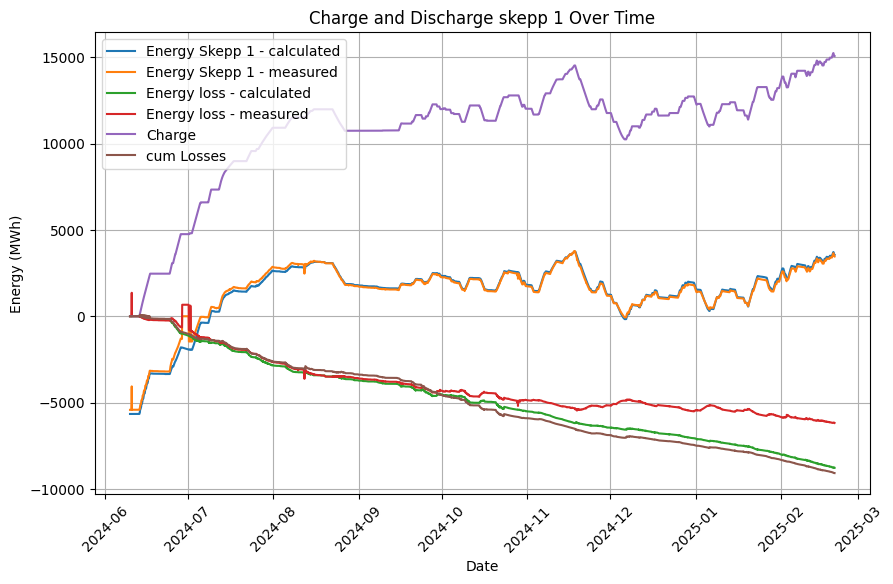

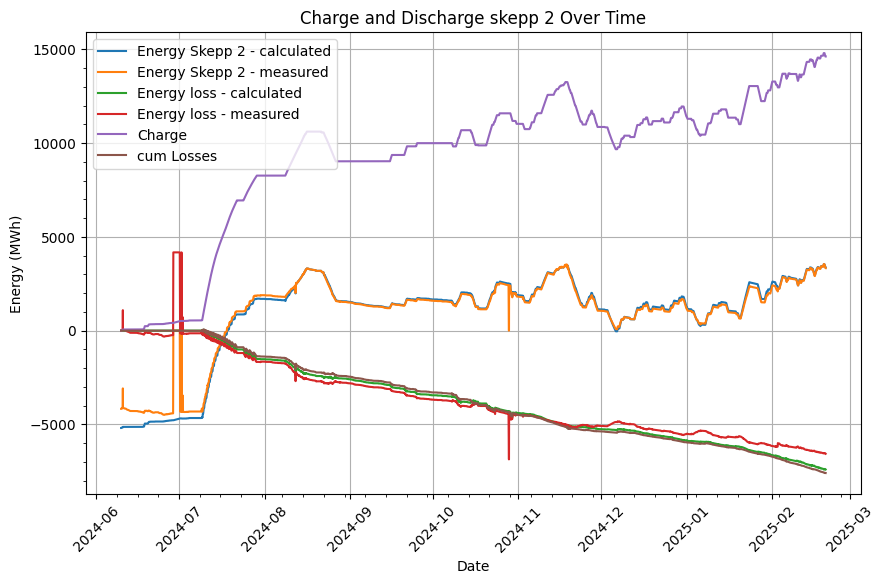

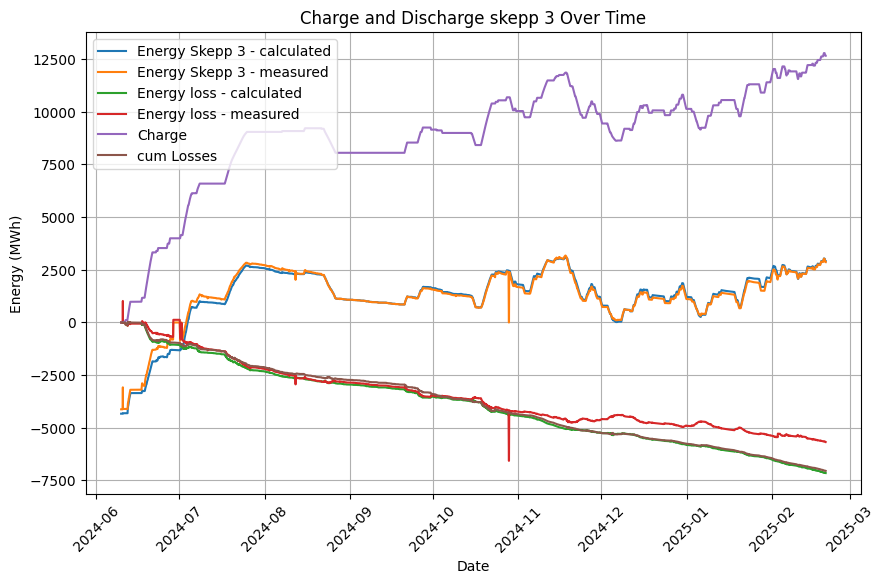

In [38]:
################ POWER_CALCULATION ################

# Energy calculations
energy_skepp1 = thermal_energy(t_bot_min, t_top_min, skepp1_temp, skepp1_sep_vol_y, 2)*1000 # Convert to MWh
energy_skepp2 = thermal_energy(t_bot_min, t_top_min, skepp2_temp, skepp2_sep_vol_y, 2)*1000 # Convert to MWh
energy_skepp3 = thermal_energy(t_bot_min, t_top_min, skepp3_temp, skepp3_sep_vol_y, 2)*1000 # Convert to MWh

# Linear fit between the values at indices 453 and 513
energy_skepp1[453:514] = np.linspace(energy_skepp1[452], energy_skepp1[513], 513 - 453 + 1)
energy_skepp2[453:514] = np.linspace(energy_skepp2[452], energy_skepp2[513], 513 - 453 + 1)
energy_skepp3[453:514] = np.linspace(energy_skepp3[452], energy_skepp3[513], 513 - 453 + 1)

# adjust energy for ship 2
energy_skepp2[1450:1770] = df_power['Skepp 2 Energi [MWh]'][1450:1770]
energy_skepp2[1430:1530] = df_power['Skepp 2 Energi [MWh]'][1430:1530] * np.linspace(0.90, 1, 100)


############################################################################

# Take the cumulative sum of the charge and discharge and adjust the energy, keep the same shape
charge_measured1 = df_power['Skepp 1 - Effekt [MW]'].apply(lambda x: x if x > 0 else 0)
cum_charge_measured1 = charge_measured1.cumsum()
discharge_measured1 = df_power['Skepp 1 - Effekt [MW]'].apply(lambda x: x if x < 0 else 0)
cum_discharge_measured1 = discharge_measured1.cumsum()

# Take the cumulative sum of the charge and discharge and adjust the energy
charge_measured2 = df_power['Skepp 2 - Effekt [MW]'].apply(lambda x: x if x > 0 else 0)
cum_charge_measured2 = charge_measured2.cumsum()
discharge_measured2 = df_power['Skepp 2 - Effekt [MW]'].apply(lambda x: x if x < 0 else 0)
cum_discharge_measured2 = discharge_measured2.cumsum()

# Adjust the energy for ship 2, where some charging has not been accounted for 
power2, charge_calc2, discharge_calc2, losses2, steady_losses2 = calculate_power(energy_skepp2, temp_time_hours, charge_measured2, discharge_measured2)

when = slice(0, 705)
charge_measured2_adjusted = np.copy(charge_measured2)

charge_measured2_adjusted[when] = np.where(power2[when] > 0, power2[when], charge_measured2_adjusted[when])
cum_charge_measured2_adjust = charge_measured2_adjusted.cumsum()
charge_measured2_adjusted = pd.DataFrame(charge_measured2_adjusted, columns=['Charge Measured 2 Adjusted'])
charge_measured2_adjusted = charge_measured2_adjusted['Charge Measured 2 Adjusted']
df_power['Skepp 2 - Effekt [MW]'].iloc[0:700] = charge_measured2_adjusted[0:700]

power2, charge_calc2, discharge_calc2, losses2, steady_losses2 = calculate_power(energy_skepp2, temp_time_hours, charge_measured2_adjusted, discharge_measured2)


# Take the cumulative sum of the charge and discharge and adjust the energy
charge_measured3 = df_power['Skepp 3 - Effekt [MW]'].apply(lambda x: x if x > 0 else 0)
cum_charge_measured3 = charge_measured3.cumsum()
discharge_measured3 = df_power['Skepp 3 - Effekt [MW]'].apply(lambda x: x if x < 0 else 0)
cum_discharge_measured3 = discharge_measured3.cumsum()


###########################################################################

# Calculate the power of the ships
power1, charge_calc1, discharge_calc1, losses1, steady_losses1 = calculate_power(energy_skepp1, temp_time_hours, charge_measured1, discharge_measured1)
power2, charge_calc2, discharge_calc2, losses2, steady_losses2 = calculate_power(energy_skepp2, temp_time_hours, charge_measured2, discharge_measured2)
power3, charge_calc3, discharge_calc3, losses3, steady_losses3 = calculate_power(energy_skepp3, temp_time_hours, charge_measured3, discharge_measured3)

charge_diff1 =  charge_calc1 - charge_measured1
discharge_diff1 = discharge_calc1 - discharge_measured1

charge_diff2 =  charge_calc2 - charge_measured2
discharge_diff2 = discharge_calc2 - discharge_measured2

charge_diff3 =  charge_calc3 - charge_measured3
discharge_diff3 = discharge_calc3 - discharge_measured3


calc_power_sum1 = round(np.sum(power1),2)
meas_power_sum1 = round(np.sum(df_power['Skepp 1 - Effekt [MW]']),2)
loss1 = round((meas_power_sum1 - calc_power_sum1)/1000,2)

###########################################################################

# Calculate the adjusted energy withoit the charge and discharge = losses over time
energy_loss_meas1 = df_power['Skepp 1 Energi [MWh]'] - cum_charge_measured1 - cum_discharge_measured1 - df_power['Skepp 1 Energi [MWh]'].iloc[0]
energy_loss_calc1 = energy_skepp1 - cum_charge_measured1*1.02 - cum_discharge_measured1*0.85 - energy_skepp1[0]

# Calculate the adjusted energy withoit the charge and discharge = losses over time
energy_loss_meas2 = df_power['Skepp 2 Energi [MWh]'] - cum_charge_measured2 - cum_discharge_measured2 - df_power['Skepp 2 Energi [MWh]'].iloc[0]
energy_loss_calc2 = energy_skepp2 - cum_charge_measured2*1.02 - cum_discharge_measured2*0.94 - energy_skepp2[0]

#######
added_value = -np.sum(power2[when])
energy_loss_calc2 += added_value
energy_loss_calc2[when] = -cum_charge_measured2[when]
#########

when = slice(3000, 3500)
losses_fix = (np.copy(losses2[3100:3120]))
losses2_adjusted = np.copy(losses2)
losses2_adjusted[3100:3120] = -losses_fix

losses_fix2 = (np.copy(losses2[3385:3410]))
losses2_adjusted = np.copy(losses2)
losses2_adjusted[3385:3410] = -losses_fix2

losses_fix3 = np.zeros_like(losses2_adjusted[3405:3410])
losses2_adjusted[3405:3410] = -losses_fix3


# Calculate the adjusted energy withoit the charge and discharge = losses over time
energy_loss_meas3 = df_power['Skepp 3 Energi [MWh]'] - cum_charge_measured3 - cum_discharge_measured3 - df_power['Skepp 3 Energi [MWh]'].iloc[0]
energy_loss_calc3 = energy_skepp3 - cum_charge_measured3*1.02 - cum_discharge_measured3*0.9 - energy_skepp3[0]

###############################################################################

print('Skepp 1')
print(f'Tot calc power:       {calc_power_sum1} MWh')
print(f'Tot meas power:       {meas_power_sum1} MWh')
print(f'Tot loss power calc:  {loss1} GWh')
print(f'Tot loss energy calc: {-round(energy_loss_calc1.values[-1]/1000,2)} GWh')
print(f'Tot loss energy meas: {-round(energy_loss_meas1.values[-1]/1000,2)} GWh')
print(f'Calculated loss:      {-round(np.sum(losses1)/1000,2)} GWh')


calc_power_sum2 = round(np.sum(power2),2)
meas_power_sum2 = round(np.sum(df_power['Skepp 2 - Effekt [MW]']),2)
loss2 = round((meas_power_sum2 - calc_power_sum2)/1000,2)

print('Skepp 2')
print(f'Tot calc power:       {calc_power_sum2} MWh')
print(f'Tot meas power:       {meas_power_sum2} MWh')
print(f'Tot loss power calc:  {loss2} GWh')
print(f'Tot loss energy calc: {-round(energy_loss_calc2.values[-1]/1000,2)} GWh')
print(f'Tot loss energy meas: {-round(energy_loss_meas2.values[-1]/1000,2)} GWh')
print(f'Calculated loss:      {-round(np.sum(losses2)/1000,2)} GWh')

calc_power_sum3 = round(np.sum(power3),2)
meas_power_sum3 = round(np.sum(df_power['Skepp 3 - Effekt [MW]']),2)
loss3 = round((meas_power_sum3 - calc_power_sum3)/1000,2)

print('Skepp 3')
print(f'Tot calc power:       {calc_power_sum3} MWh')
print(f'Tot meas power:       {meas_power_sum3} MWh')
print(f'Tot loss power calc:  {loss3} GWh')
print(f'Tot loss energy calc: {-round(energy_loss_calc3.values[-1]/1000,2)} GWh')
print(f'Tot loss energy meas: {-round(energy_loss_meas3.values[-1]/1000,2)} GWh')
print(f'Calculated loss:      {-round(np.sum(losses3)/1000,2)} GWh')

print('')
print('TOTAL, ALL 3 SHIPS')
print(f'Tot loss energy calc: {-round(np.sum(losses1 + losses2 + losses3)/1000,2)} GWh')



#### Plot the charge and discharge for ship 1
plt.figure(figsize=(10, 6))
plt.plot(temp_time, energy_skepp1, label='Energy Skepp 1 - calculated')
plt.plot(temp_time, df_power['Skepp 1 Energi [MWh]'], label='Energy Skepp 1 - measured')
plt.plot(temp_time, energy_loss_calc1, label='Energy loss - calculated')
plt.plot(temp_time, energy_loss_meas1, label='Energy loss - measured')
plt.plot(temp_time,  cum_charge_measured1 + cum_discharge_measured1, label='Charge')
plt.plot(temp_time, losses1.cumsum(), label='cum Losses')  
plt.xlabel('Date')
plt.ylabel('Energy (MWh)')
plt.title('Charge and Discharge skepp 1 Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Plot the charge and discharge for ship 1
plt.figure(figsize=(10, 6))
plt.plot(temp_time, energy_skepp2, label='Energy Skepp 2 - calculated')
plt.plot(temp_time, df_power['Skepp 2 Energi [MWh]'], label='Energy Skepp 2 - measured')
plt.plot(temp_time, energy_loss_calc2, label='Energy loss - calculated')
plt.plot(temp_time, energy_loss_meas2, label='Energy loss - measured')
plt.plot(temp_time, cum_charge_measured2_adjust + cum_discharge_measured2, label='Charge')
#plt.plot(temp_time, losses2.cumsum(), label='cum Losses')
plt.plot(temp_time, losses2_adjusted.cumsum(), label='cum Losses')
plt.xlabel('Date')
plt.ylabel('Energy (MWh)')
plt.title('Charge and Discharge skepp 2 Over Time')
plt.legend()
plt.grid(True)
plt.minorticks_on()
plt.xticks(rotation=45)
plt.show()

# Plot the charge and discharge for ship 1
plt.figure(figsize=(10, 6))
plt.plot(temp_time, energy_skepp3, label='Energy Skepp 3 - calculated')
plt.plot(temp_time, df_power['Skepp 3 Energi [MWh]'], label='Energy Skepp 3 - measured')
plt.plot(temp_time, energy_loss_calc3, label='Energy loss - calculated')
plt.plot(temp_time, energy_loss_meas3, label='Energy loss - measured')
plt.plot(temp_time, cum_charge_measured3 + cum_discharge_measured3, label='Charge')
plt.plot(temp_time, losses3.cumsum(), label='cum Losses')
plt.xlabel('Date')
plt.ylabel('Energy (MWh)')
plt.title('Charge and Discharge skepp 3 Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

index
13-15   fel i datan (temperatur droppar och sen stiger)
511     temp sjunker drastiskt från 71-68 men är stabil både före och efter, cumulativt power loss, blir inte fel i beräkningarna 
1520    power spike, temperaturenerna blandas väldigt mycket här, från hög temp i botten till tvärt om (innan det laddas), blir inte effekt plus ändå, förskjuten tid.
2550    negativ power spike, samma som 511
3220    positiv power spike efter laddning. inget konstigt (mer än något annat)

2024-11 tog bort en låg temperatur för alla skepp, och fler små fel
0:1000  skepp 2 börjar med oregistrerad laddning. ta bort detta för nu.

2024-08-13- 10:00 skepp 2: pga bakladdning så är den stratifierad åt fel håll. i detta skede vänder den. Justera genom att sätta energin till samma mellan calc och meas. ( 1430: är justerade)

vid 2024-10-17 skepp 2 så laddas det ur väldigt lite, men enligt uträkningar, välidgt mycket. Blir en positiv förlust. (justerat nedanför)

vid 2024-10-29 skepp 2 så laddas det ut mer enligt uträkningar än med mätningar. Alla sådana fall bör justeras! (justerat, men svårt att hitta automatiskt sett?)

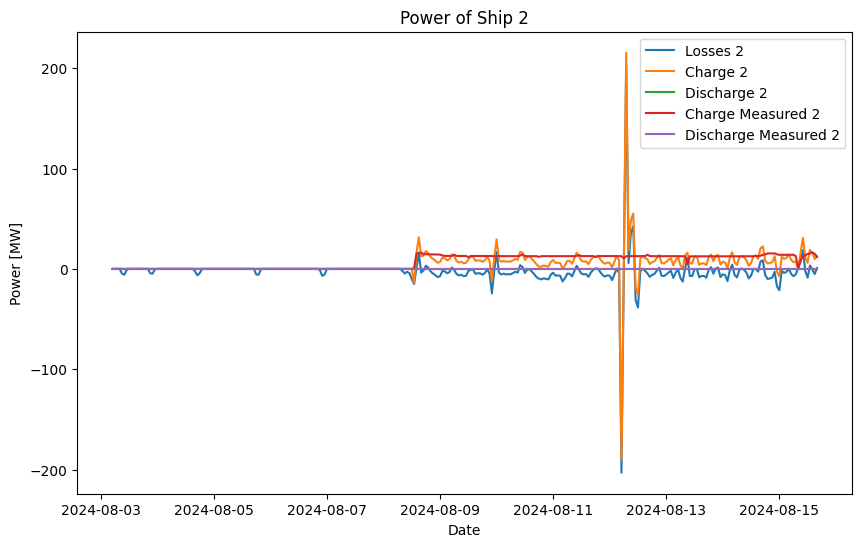

In [39]:
# FEL JUSTERINGSSÖKNING

when = slice(1300, 1600)
losses2_adjusted = np.copy(losses2)

losses_fix1 = np.abs(np.copy(losses2[3100:3120]))
losses2_adjusted[3100:3120] = -losses_fix1

losses_fix2 = (np.copy(losses2[3385:3405]))
losses2_adjusted[3385:3405] = -losses_fix2

losses_fix3 = np.zeros_like(losses2_adjusted[3405:3410])
losses2_adjusted[3405:3410] = -losses_fix3


plt.figure(figsize=(10, 6)) 
plt.plot(temp_time[when], losses2[when], label='Losses 2')
plt.plot(temp_time[when], charge_calc2[when], label='Charge 2')
plt.plot(temp_time[when], discharge_calc2[when], label='Discharge 2')
plt.plot(temp_time[when], charge_measured2[when], label='Charge Measured 2')
plt.plot(temp_time[when], discharge_measured2[when], label='Discharge Measured 2')

plt.xlabel('Date')
plt.ylabel('Power [MW]')
plt.title('Power of Ship 2')
plt.legend()



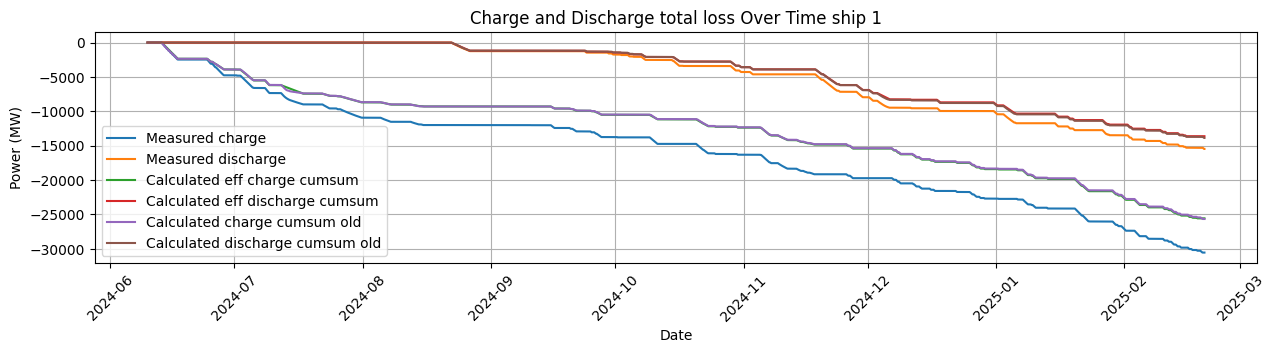

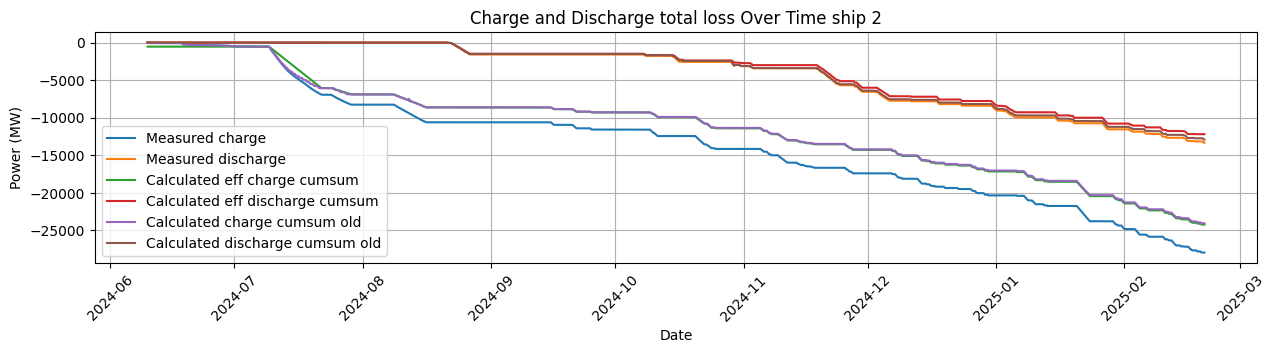

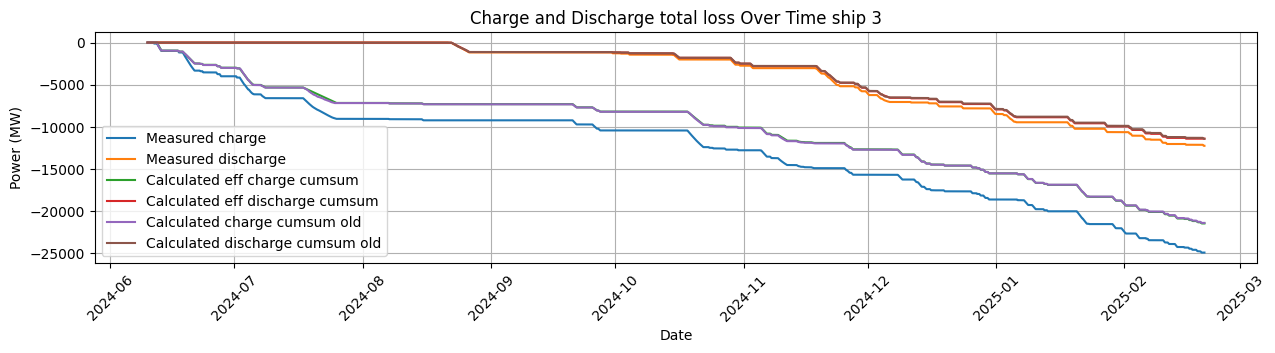

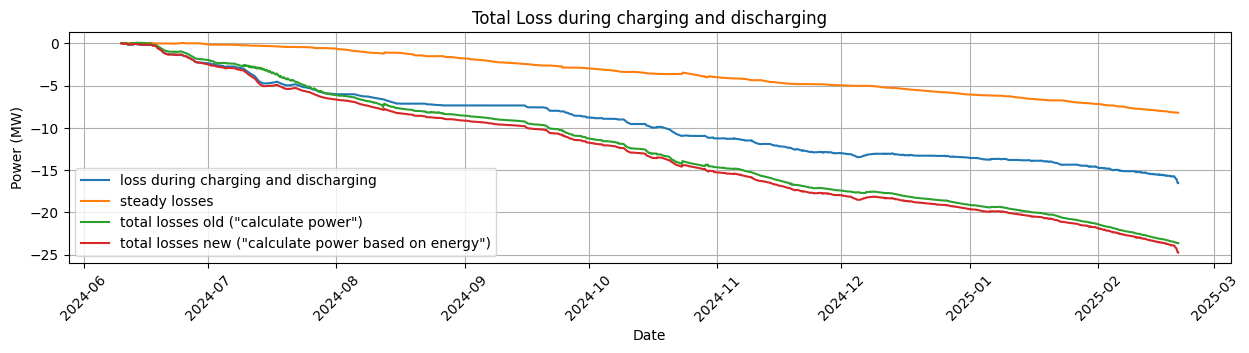

In [40]:
############# CALCULATE THE LOSS BASED ON ENERGY ####################

# This power calculation does already takes into account losses, even the steady losses during charging

# Use function to calculate the effective power (charge and discharge) 
effective_calc_power_mean1 = calulate_charge_based_on_energy(df_measured_power['Skepp 1 - Effekt [MW]'],energy_skepp1)
effective_calc_power_mean2 = calulate_charge_based_on_energy(df_measured_power['Skepp 2 - Effekt [MW]'],energy_skepp2) # NEED TO ADJUST VALUE LATER (WANT TO USE meausred_charge2_adjusted)
effective_calc_power_mean3 = calulate_charge_based_on_energy(df_measured_power['Skepp 3 - Effekt [MW]'],energy_skepp3)

# Find the effective charge & discharge
charge_calc1_eff = np.where(effective_calc_power_mean1 > 0, effective_calc_power_mean1, 0)
charge_calc2_eff = np.where(effective_calc_power_mean2 > 0, effective_calc_power_mean2, 0)
charge_calc3_eff = np.where(effective_calc_power_mean3 > 0, effective_calc_power_mean3, 0)

discharge_calc1_eff = np.where(effective_calc_power_mean1 < 0, effective_calc_power_mean1, 0)
discharge_calc2_eff = np.where(effective_calc_power_mean2 < 0, effective_calc_power_mean2, 0)
discharge_calc3_eff = np.where(effective_calc_power_mean3 < 0, effective_calc_power_mean3, 0)

# Calculate the cumulative charge & discharge
cum_charge_calc1_eff = charge_calc1_eff.cumsum()
cum_charge_calc2_eff = charge_calc2_eff.cumsum()
cum_charge_calc3_eff = charge_calc3_eff.cumsum()

cum_discharge_calc1_eff = discharge_calc1_eff.cumsum()
cum_discharge_calc2_eff = discharge_calc2_eff.cumsum()
cum_discharge_calc3_eff = discharge_calc3_eff.cumsum()


# calculate cumulative charge & discharge from FIRST GRADIENT METHOD
charge_calc1_cum = charge_calc1.cumsum()
charge_calc2_cum = charge_calc2.cumsum()
charge_calc3_cum = charge_calc3.cumsum()

# discharge
discharge_calc1_cum = discharge_calc1.cumsum()
discharge_calc2_cum = discharge_calc2.cumsum()
discharge_calc3_cum = discharge_calc3.cumsum()


##############
loss_during_charging = (-cum_charge_measured1 + cum_charge_calc1_eff) + (-cum_charge_measured2_adjust + cum_charge_calc2_eff) + (-cum_charge_measured3 + cum_charge_calc3_eff)
loss_during_discharging = (cum_discharge_measured1 - cum_discharge_calc1_eff) + (cum_discharge_measured2 - cum_discharge_calc2_eff) + (cum_discharge_measured3 - cum_discharge_calc3_eff)
steady_losses = steady_losses1.cumsum() + steady_losses2.cumsum() + steady_losses3.cumsum()

total_loss_load = (loss_during_charging + loss_during_discharging)/1000
TOT_new = steady_losses/1000+total_loss_load

TOT_old = losses1.cumsum()/1000 + losses2.cumsum()/1000 + losses3.cumsum()/1000

plt.figure(figsize=(15, 3))
plt.plot(temp_time, -cum_charge_measured1, label='Measured charge')
plt.plot(temp_time, cum_discharge_measured1, label = 'Measured discharge')
plt.plot(temp_time, -cum_charge_calc1_eff, label='Calculated eff charge cumsum')
plt.plot(temp_time, cum_discharge_calc1_eff, label = 'Calculated eff discharge cumsum')
plt.plot(temp_time, -charge_calc1_cum, label = 'Calculated charge cumsum old')
plt.plot(temp_time, discharge_calc1_cum, label = 'Calculated discharge cumsum old')
plt.xlabel('Date')
plt.ylabel('Power (MW)')
plt.title('Charge and Discharge total loss Over Time ship 1')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15, 3))
plt.plot(temp_time, -cum_charge_measured2_adjust, label='Measured charge')
plt.plot(temp_time, cum_discharge_measured2, label = 'Measured discharge')
plt.plot(temp_time, -cum_charge_calc2_eff+added_value, label='Calculated eff charge cumsum')
plt.plot(temp_time, cum_discharge_calc2_eff, label = 'Calculated eff discharge cumsum')
plt.plot(temp_time, -charge_calc2_cum, label = 'Calculated charge cumsum old')
plt.plot(temp_time, discharge_calc2_cum, label = 'Calculated discharge cumsum old')
plt.xlabel('Date')
plt.ylabel('Power (MW)')
plt.title('Charge and Discharge total loss Over Time ship 2')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15, 3))
plt.plot(temp_time, -cum_charge_measured3, label='Measured charge')
plt.plot(temp_time, cum_discharge_measured3, label = 'Measured discharge')
plt.plot(temp_time, -cum_charge_calc3_eff, label='Calculated eff charge cumsum')
plt.plot(temp_time, cum_discharge_calc3_eff, label = 'Calculated eff discharge cumsum')
plt.plot(temp_time, -charge_calc3_cum, label = 'Calculated charge cumsum old')
plt.plot(temp_time, discharge_calc3_cum, label = 'Calculated discharge cumsum old')
plt.xlabel('Date')
plt.ylabel('Power (MW)')
plt.title('Charge and Discharge total loss Over Time ship 3')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(15, 3))
plt.plot(temp_time, total_loss_load, label='loss during charging and discharging')
plt.plot(temp_time, steady_losses/1000, label='steady losses')
plt.plot(temp_time, TOT_old, label='total losses old ("calculate power")')
plt.plot(temp_time, TOT_new, label='total losses new ("calculate power based on energy")')
plt.xlabel('Date')
plt.ylabel('Power (MW)')
plt.title('Total Loss during charging and discharging')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()




EFTERSOM FELET ÄR EN DIFFERENS MELLAN UPPMÄTT OCH UTRÄKNAD, SÅ KAN DET HELT PLÖTSLIGT BLI POSITIVA SVÄNGNINGAR, det är dock okej, det betyder att mätningarna mäter effekt lite före uträkningarna gör det! detta skede i mitten av juni måste dock fixas för alla skepp(typ inte 3), det ser förjävligt ut

NU! Energi beräkningarna och power_calculations ger samma förluster!


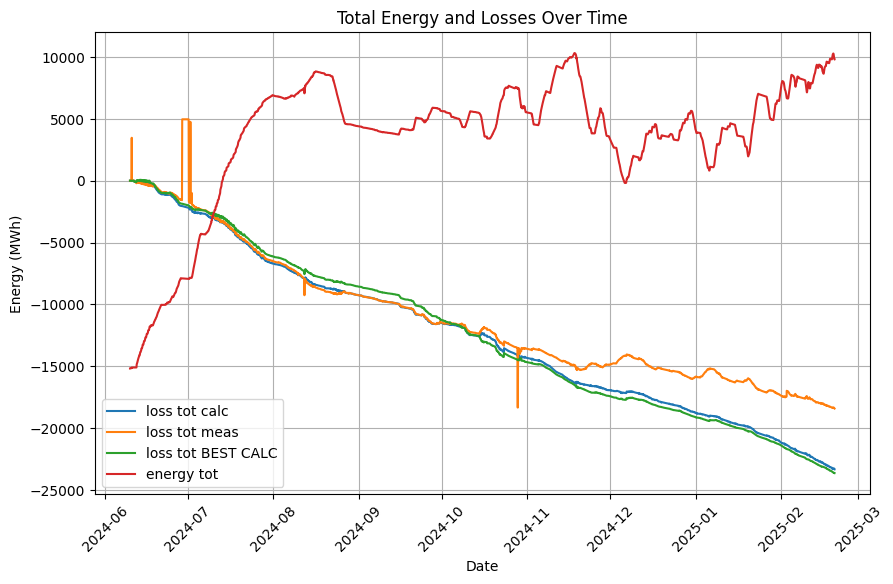

Loss prediction this month:  3.54 MW


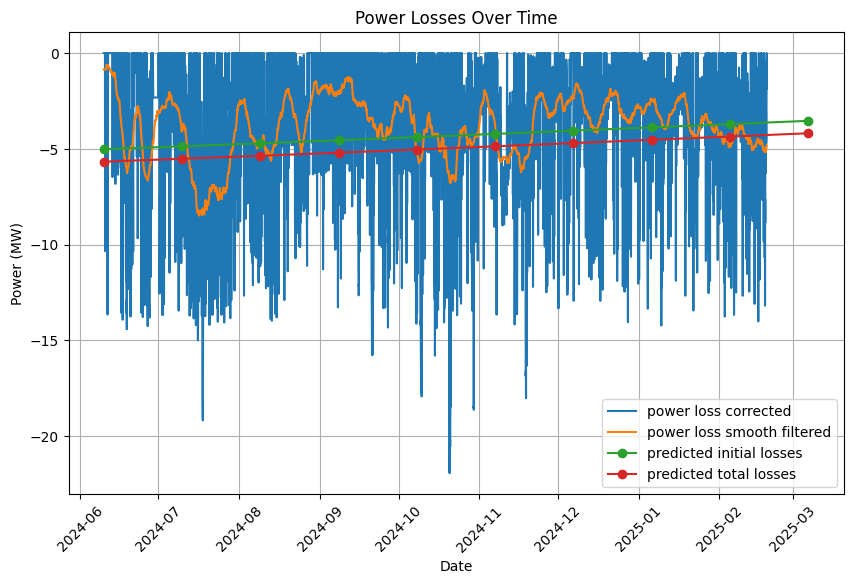

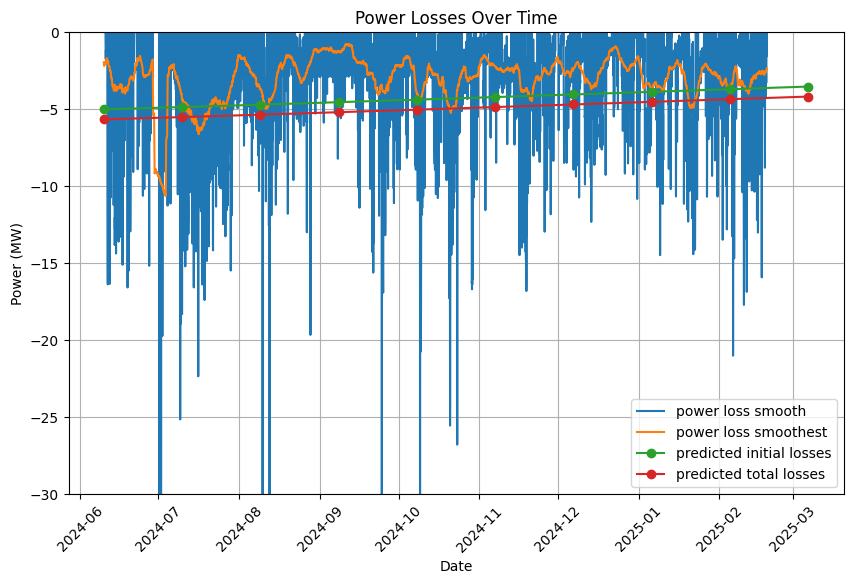

In [ ]:

########## CALCULATE THE TOTAL POWER LOSS THROUGH POWER_LOSS_CALC AND SMOOTH POWER ####################

tot_loss_vector_calc = energy_loss_calc1 + energy_loss_calc2 + energy_loss_calc3
tot_loss_vector_meas = energy_loss_meas1 + energy_loss_meas2 + energy_loss_meas3 
tot_energy_vector = energy_skepp1 + energy_skepp2 + energy_skepp3

plt.figure(figsize=(10, 6))
plt.plot(temp_time, tot_loss_vector_calc, label='loss tot calc')
plt.plot(temp_time, tot_loss_vector_meas, label='loss tot meas')
plt.plot(temp_time, TOT_old*1000, label='loss tot BEST CALC')
plt.plot(temp_time, tot_energy_vector, label='energy tot')
plt.xlabel('Date')
plt.ylabel('Energy (MWh)')
plt.title('Total Energy and Losses Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


power_loss_vector_calc, power_loss_vector_calc_smooth, power_loss_vector_calc_smoothest = power_loss_calculation(tot_loss_vector_calc,temp_time_hours,discharge_measured1)
power_loss_vector_meas, power_loss_vector_meas_smooth, power_loss_vector_meas_smoothest = power_loss_calculation(tot_loss_vector_meas,temp_time_hours,discharge_measured1)


# Run the FVB_loss_prediction script
%run FVB_loss_prediction.py

# Access values from FVB_loss_prediction, This is losses for each day
power_loss_predicted = predicted_spline_loss
power_loss_predicted_initial = predicted_spline_loss[0:10*30*24]
power_loss_predicted_all = power_loss_predicted_initial + 0.65


# Take the cumulative sum of the predicted losses
power_loss_predicted_corrected = np.cumsum(power_loss_predicted)
# Adjust the first year so its value is 27 GWh
power_loss_predicted_corrected *= 27 / power_loss_predicted_corrected[8760]  # 8760 hours in a year


# Create a time series for the predicted losses, assuming they are monthly
daily_time = pd.date_range(start=temp_time.iloc[0], periods=len(power_loss_predicted_initial), freq='H')
daily_time = daily_time - pd.DateOffset(days=daily_time[0].day - temp_time.iloc[0].day)
power_loss_today = predicted_spline_loss[9*30*24]
print(f'Loss prediction this month:  {round(power_loss_today,2)} MW')


date= slice(0, 6100)
plt.figure(figsize=(10, 6))
#plt.plot(temp_time[date], power_loss_vector_calc[date], label='power loss measured')
plt.plot(temp_time[date], power_loss_vector_calc_smooth[date], label='power loss corrected')
plt.plot(temp_time[date], power_loss_vector_calc_smoothest[date], label='power loss smooth filtered')
#plt.plot(temp_time[date], -tot_energy_vector[date]/1000, label='tot energy')
plt.plot(daily_time[::30*24], -power_loss_predicted_initial[::30*24], 'o-', label='predicted initial losses')
plt.plot(daily_time[::30*24], -power_loss_predicted_all[::30*24], 'o-', label='predicted total losses')
plt.xlabel('Date')
plt.ylabel('Power (MW)')
plt.title('Power Losses Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(temp_time[date], power_loss_vector_meas_smooth[date], label='power loss smooth')
plt.plot(temp_time[date], power_loss_vector_meas_smoothest[date], label='power loss smoothest')
plt.plot(daily_time[::30*24], -power_loss_predicted_initial[::30*24], 'o-', label='predicted initial losses')
plt.plot(daily_time[::30*24], -power_loss_predicted_all[::30*24], 'o-', label='predicted total losses')
plt.xlabel('Date')
plt.ylabel('Power (MW)')
plt.title('Power Losses Over Time')
plt.ylim(-30, 0)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



In [42]:
########################### CALCULATE THE DIFFERENCE BETWEEN CALC/MEAS CHARGES ################################

print('Discharge:')
print(f'ratio mellan calc/meas 1: {discharge_calc1.cumsum()[-1]/cum_discharge_measured1.iloc[-1]}')
print(f'ratio mellan calc/meas 2: {discharge_calc2.cumsum()[-1]/cum_discharge_measured2.iloc[-1]}') # SHOULD BE INVERSE FOR DISCHARGE
print(f'ratio mellan calc/meas 3: {discharge_calc3.cumsum()[-1]/cum_discharge_measured3.iloc[-1]}')
print('')
print('Charge:')
print(f'ratio mellan calc/meas 1: {charge_calc1.cumsum()[-1]/cum_charge_measured1.iloc[-1]}')
print(f'ratio mellan calc/meas 2: {charge_calc2.cumsum()[-1]/cum_charge_measured2_adjust[-1]}')
print(f'ratio mellan calc/meas 3: {charge_calc3.cumsum()[-1]/cum_charge_measured3.iloc[-1]}')

Discharge:
ratio mellan calc/meas 1: 0.8964992290267458
ratio mellan calc/meas 2: 0.9682240079334123
ratio mellan calc/meas 3: 0.9321075549248555

Charge:
ratio mellan calc/meas 1: 0.8400491207473253
ratio mellan calc/meas 2: 0.8604813667194384
ratio mellan calc/meas 3: 0.8587035733429718


In [43]:
# FVB FORMULAS

def FVB_continuous_loss_formula(T_top, T_bot, T0 = 10, lambdaa = 4):
    """FVB Loss Formula. Continuous loss (power MW). """
    # Constants from FVB
    top_loss = 9876 # W/K (lambda*SurfaceArea)
    bot_loss = 6817 # W/K (lambda*S)
    lambda_reg = 4 # W/m*K
    P = (top_loss*(T_top-T_bot) + bot_loss*(T_bot-T0))*lambdaa/(lambda_reg*1e6) # MW
    return P

def FVB_initial_loss_formula(T_top, T_bot, T0 = 10, lambdaa = 4):
    """FVB Loss Formula. Initial loss (energy GWh). """
    # Constants from FVB
    top_loss = 1237 # MWh/K (rho*c*V)
    bot_loss = 421 # MWh/K (rho*c*V)
    E = (top_loss*(T_top-T_bot) + bot_loss*(T_bot-T0))/1e3 # GW
    return E

# Calculate the FVB continuous loss
fvb_cont_loss = FVB_continuous_loss_formula(90, 50)
print(f'FVB cont. Loss:     {round(fvb_cont_loss,2)} MW')

# Calculate the FVB continuous loss for ship 
fvb_cont_loss_new = FVB_continuous_loss_formula(85, 55, 12.5)
print(f'FVB cont. Loss new: {round(fvb_cont_loss_new,2)} MW')

# Calculate the FVB initial loss
fvb_init_loss = FVB_initial_loss_formula(90,50)
print(f'FVB init. Loss:     {round(fvb_init_loss,2)} GWh')

# Calculate the FVB initial loss
fvb_init_loss_new = FVB_initial_loss_formula(87,55, 12.5)
print(f'FVB init. Loss new: {round(fvb_init_loss_new,2)} GWh')


print(FVB_initial_loss_formula(95,75))
print(FVB_initial_loss_formula(70,45))
print(FVB_initial_loss_formula(95,54))
print(FVB_initial_loss_formula(95,45))
print(fvb_cont_loss_new/fvb_cont_loss)
print(fvb_init_loss_new/fvb_init_loss)


FVB cont. Loss:     0.67 MW
FVB cont. Loss new: 0.59 MW
FVB init. Loss:     66.32 GWh
FVB init. Loss new: 57.48 GWh
52.105
45.66
69.241
76.585
0.8776171149583658
0.8666541013269


In [44]:
# Create a dictionary with the calculated energies
data = {
    'Time': temp_time,
    'Energy_Skepp1': energy_skepp1,
    'Energy_Skepp2': energy_skepp2,
    'Energy_Skepp3': energy_skepp3,
    'Total_Energy': energy_skepp1 + energy_skepp2 + energy_skepp3
}

# Create a pandas DataFrame
df_energies = pd.DataFrame(data)

# Save the DataFrame as a CSV file
calc_energy_path = 'C:/Users/extaxha/Documents/project_data/calc_energy.csv'
df_energies.to_csv(calc_energy_path, index=False)

print(f"Calculated energies saved to {calc_energy_path}")

Calculated energies saved to C:/Users/extaxha/Documents/project_data/calc_energy.csv


Fitted parameters: [ 4.3583966  -0.74263591  0.71070289]
RMSE: 0.12146414424320419
R-squared: 0.9862090355075808


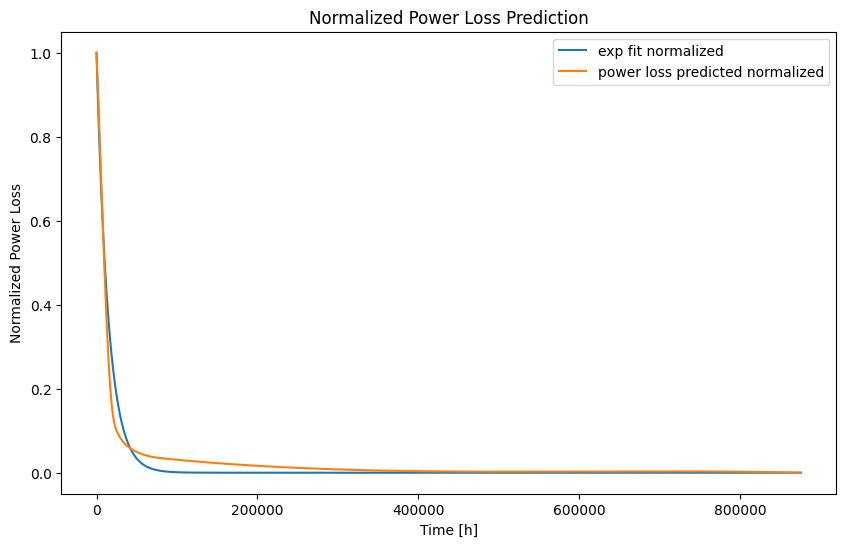

In [ ]:
def func(x, a, b, c):
    return a * np.exp(b * x) + c

# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return np.sum((yData - val) ** 2.0)

# generate initial parameter values
def generate_Initial_Parameters():
    """Initial parameter generation. """
    parameterBounds = []
    parameterBounds.append([0.0, 100.0]) # search bounds for a
    parameterBounds.append([-10.0, 0.0]) # search bounds for b
    parameterBounds.append([0.0, 10.0]) # search bounds for c

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

def exponential_model(xData,yData):
    """Logistical model. """
    # by default, differential_evolution completes by calling curve_fit() using parameter bounds
    geneticParameters = generate_Initial_Parameters()

    # now call curve_fit without passing bounds from the genetic algorithm,
    # just in case the best fit parameters are aoutside those bounds
    fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters)
    print('Fitted parameters:', fittedParameters)

    modelPredictions = func(xData, *fittedParameters) 

    absError = modelPredictions - yData

    SE = np.square(absError) # squared errors
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(yData))
    
    # create data for the fitted equation plot
    hourly_data_points = 100*365*24
    xModel = np.linspace(min(xData), max(xData),hourly_data_points)
    yModel = func(xModel, *fittedParameters)

    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    return yModel, xModel, fittedParameters


# Read the operational data from a CSV file
data_power = pd.read_csv('C:/Users/extaxha/Documents/project_data/estimated_power_loss.csv')
starting_value = pd.DataFrame({'year': [0], 'loss': [5]})
data_power = pd.concat([starting_value, data_power], ignore_index=True)

# Calculate the hours from the years
hours = data_power['year']
heat_loss = data_power['loss']

contineous_heat_loss = 0.65 # 6.4% of 100GWh from report

# Calculate the fitted logarithmic curve using the filtered data
xData = hours
yData = heat_loss
y_fit, x_fit, exp_param = exponential_model(xData, yData)


# Known exponential parameters (yearly)
a_exp_yearly = exp_param[0]
b_exp_yearly = exp_param[1]
c_exp_yearly = exp_param[2]

# Convert b from yearly to hourly
b_exp_hourly = b_exp_yearly / 8760
exp_param_hourly = [a_exp_yearly, b_exp_hourly*0.8, c_exp_yearly] 

###################################
exp_time = np.linspace(0, len(power_loss_predicted)-1, len(power_loss_predicted))
paramsexp, covarianceexp = curve_fit(func, exp_time, power_loss_predicted-power_loss_predicted[-1])

# Normalize the exponential function between 1 and 0. add value for boost
exp = func(exp_time, *exp_param_hourly)
exp_normalized = (exp - np.min(exp)) / (np.max(exp) - np.min(exp))
power_loss_predicted_normalized = 0.0 + (power_loss_predicted - np.min(power_loss_predicted)) / (np.max(power_loss_predicted) - np.min(power_loss_predicted))

plt.figure(figsize=(10, 6))
plt.plot(exp_time, exp_normalized, label='exp fit normalized')
plt.plot(exp_time, power_loss_predicted_normalized, label='power loss predicted normalized')
plt.xlabel('Time [h]')
plt.ylabel('Normalized Power Loss')
plt.title('Normalized Power Loss Prediction')
plt.legend()


# y_fit, x_fit = logistical_model(xData, yData)
# plt.figure(figsize=(10, 6))
# plt.plot(x_fit, y_fit, label='Logistical Fit', color='red')
# #plt.plot(exp_time, exp, label='Exponential Fit', color='blue')

Ansats! förlusterna beror på tiden (enligt prediction), laddning/urladdning, samt energiinnehåll.

loss = exp(t) * a*energy * b*charge + 0.65

verkar som förlusterna ökar under laddning i början och sjunker med urladdning....

sum losses1:     -7044.5369960641165 
sum smooth:      -7053.178950813372
sum smooth_tot:  -7053.1789508133725
[4117 4144]
-60.87016916143226
-59.234557466146796


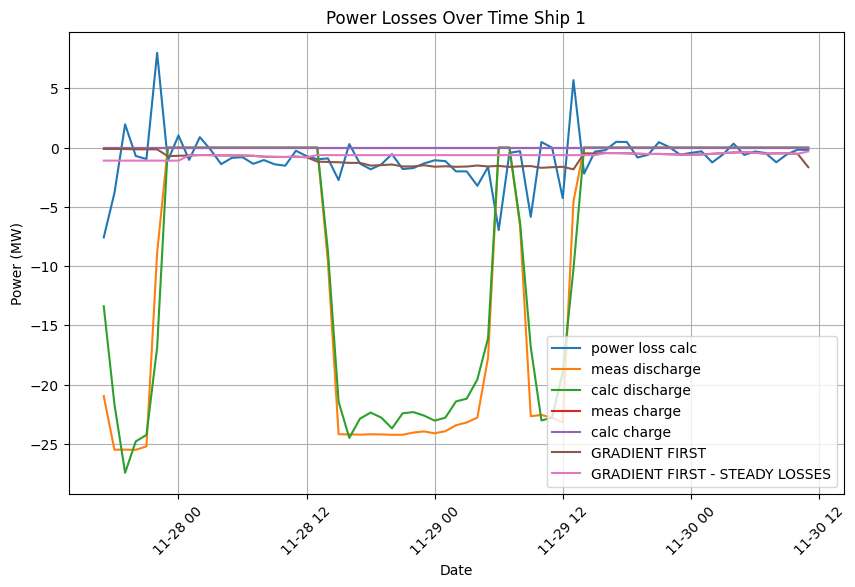

In [ ]:

# TEST FÖR ATT KOLLA PÅ IN OCH URLADDNINGAR (GRADIENT FIRST)


def calculate_period_means(charge, discharge, non_charge, losses):
    """Smooth the power losses. """

    # Copy the data
    losses_copy = np.copy(losses)
    charge_mean = np.zeros(len(charge))
    discharge_mean = np.zeros(len(discharge))
    non_charge_mean = np.zeros(len(non_charge))
    
    # Smooth the data within the charge, discharge and non periods for each window
    for i, c in enumerate(charge):
        charge_mean[i] = np.mean((losses_copy[c[0]:c[1]])) 

    for i, d in enumerate(discharge):
        discharge_mean[i] = np.mean((losses_copy[d[0]:d[1]]))

    for i, n, in enumerate(non_charge):
        non_charge_mean[i] = np.mean((losses_copy[n[0]:n[1]]))

    return charge_mean, discharge_mean, non_charge_mean 


def calculate_mean_loss_during_dischargin(losses, find_discharge, find_steady_losses):
    """Calculate the loss during discharge through the mean values of the loss before and after discharge. """

    # Copy the losses and allocate
    new_loss = np.copy(losses)
    steady_index = []

    # Find the index for the steady losses before a discharge
    for d in find_discharge:
        for j, n in enumerate(find_steady_losses):
            #print(n)
            if n[0] <= d[0] <= n[1]:
                steady_index.append(j)
    
    idx_pre_dis = steady_index

    # Loop over the index of discharges. Calculate the mean loss for the period before and after discharge
    for dis_idx, i in enumerate(idx_pre_dis):


        # if the period before discharge is too short, use the previous steady loss. Calculate the mean loss for the period before discharge
        if i + 1 < len(find_steady_losses) and find_steady_losses[i][1] - find_steady_losses[i][0] > 2:
            mean_loss_pre_discharge = np.mean(new_loss[find_steady_losses[i][0]:find_steady_losses[i][1]])
            if np.isnan(mean_loss_pre_discharge):
   
                # Calculate without NaN values
                new_loss[find_steady_losses[i][0]:find_steady_losses[i][1]] = np.nan_to_num(new_loss[find_steady_losses[i][0]:find_steady_losses[i][1]])
                mean_loss_pre_discharge = np.mean(new_loss[find_steady_losses[i][0]:find_steady_losses[i][1]][new_loss[find_steady_losses[i][0]:find_steady_losses[i][1]] != 0])
 
        elif i + 2 < len(find_steady_losses) and find_steady_losses[i-1][1] - find_steady_losses[i-1][0] > 2:
            mean_loss_pre_discharge = np.mean(new_loss[find_steady_losses[i][0]:find_steady_losses[i][1]])
            if np.isnan(mean_loss_pre_discharge):

                # Calculate without NaN values
                new_loss[find_steady_losses[i-1][0]:find_steady_losses[i-1][1]] = np.nan_to_num(new_loss[find_steady_losses[i-1][0]:find_steady_losses[i-1][1]])
                mean_loss_pre_discharge = np.mean(new_loss[find_steady_losses[i-1][0]:find_steady_losses[i-1][1]][new_loss[find_steady_losses[i-1][0]:find_steady_losses[i-1][1]] != 0])

        else:
            mean_loss_pre_discharge = np.mean(new_loss[find_steady_losses[i][0]:find_steady_losses[i][1]])
            if np.isnan(mean_loss_pre_discharge):
                # calculate only with sorunding values
                mean_loss_pre_discharge =  np.mean((new_loss[find_steady_losses[i][0]-3:find_steady_losses[i][1]+3]))

        # if the period after discharge is too short, use the next steady loss. Calculate the mean loss for the period after discharge
        if i + 1 < len(find_steady_losses) and find_steady_losses[i+1][1] - find_steady_losses[i+1][0] > 2:
            mean_loss_post_discharge = np.mean(new_loss[find_steady_losses[i+1][0]:find_steady_losses[i+1][1]])
            if np.isnan(mean_loss_post_discharge):
                print('NaN value found in mean loss calculation 4')
        elif i + 2 < len(find_steady_losses) and find_steady_losses[i+2][1] - find_steady_losses[i+2][0] > 2:
            mean_loss_post_discharge = np.mean(new_loss[find_steady_losses[i+2][0]:find_steady_losses[i+2][1]])
            if np.isnan(mean_loss_post_discharge):
                print('NaN value found in mean loss calculation 7')
        else:
            mean_loss_post_discharge = np.mean(new_loss[find_steady_losses[i][0]:find_steady_losses[i][1]])
            if np.isnan(mean_loss_post_discharge):
                # calculate only with sorunding values
                mean_loss_post_discharge = np.mean((new_loss[find_steady_losses[i][0]-3:find_steady_losses[i][1]+3]))

        # Set the mean loss for the period during discharge
        new_loss[find_discharge[dis_idx][0]:find_discharge[dis_idx][1]] = (mean_loss_pre_discharge+mean_loss_post_discharge)/2

    return new_loss 

def GRADIENT_FIRST_STEADY_LOSSES(energy, time_vec, charge_meas, discharge_meas, df_power, adj=[1,1]):
    """Calculate through gradient first method. """

    # Power calculations 
    _, _, _, losses, steady_losses = calculate_power(energy, time_vec, adj[0] * charge_meas, adj[1] * discharge_meas)
   
    # Find the indicies of different stages
    find_charge, find_discharge, find_steady_losses = find_charge_discharge(df_power)

    # First smoothing
    gradient_first = smooth_over_windows(find_charge, find_discharge, find_steady_losses, losses, filter_size=25)

    # Final smoothing
    gradient_first = smooth_and_adjust_power(gradient_first, adj[1] * discharge_meas, threshold_factor=1, filter_size=25)

    # Calculate the mean loss around discharging
    gradient_first = calculate_mean_loss_during_dischargin(gradient_first, find_discharge, find_steady_losses)

    # Calculate the cumulative energy loss
    cum_energy_loss = gradient_first.cumsum()

    return cum_energy_loss, gradient_first
    


x = 0.9321075549248555
x = 1

#power_loss_vector_calc1, power_loss_vector_calc_smooth1, power_loss_vector_calc_smoothest1 = power_loss_calculation(energy_loss_calc1,temp_time_hours,discharge_measured1*x, smooth=24*5)

#power_loss_new1 = smooth_and_adjust_power(np.copy(losses), discharge_measured1) # DET ÄR DENNA SOM FUCKAR

power, charge_calc, discharge_calc, losses, steady_losses = calculate_power(energy_skepp3, temp_time_hours, charge_measured3, discharge_measured3*x)

test_smooth = smooth_and_adjust_power_window(losses) 


test_find_charge, test_find_discharge, test_find_steady_losses = find_charge_discharge(df_power['Skepp 3 - Effekt [MW]'])

smooth = smooth_over_windows(test_find_charge, test_find_discharge, test_find_steady_losses, losses, filter_size=25)

smooth_tot = smooth_and_adjust_power(smooth, discharge_measured3*x, threshold_factor=1, filter_size=25)



# plt.figure(figsize=(10, 6))
# plt.plot(temp_time,smooth)
# plt.xlabel('Date')

print(f'sum losses1:     {np.sum(losses[:])} ')
print(f'sum smooth:      {np.sum(smooth[:])}')
print(f'sum smooth_tot:  {np.sum(smooth_tot[:])}')


#mean_charge, mean_discharge, mean_steady_loss = calculate_period_means(test_find_charge, test_find_discharge, test_find_steady_losses, losses)


#new_discharge_loss = calculate_mean_loss_during_dischargin(smooth, test_find_discharge, test_find_steady_losses)

#cum_loss_GRADIENT_FIRST_SL1, gradient_first_SL1 = GRADIENT_FIRST_STEADY_LOSSES(energy_skepp1, temp_time_hours, charge_measured1, discharge_measured1, df_power['Skepp 1 - Effekt [MW]'], adj=[1,1])
#cum_loss_GRADIENT_FIRST_SL2, gradient_first_SL2 = GRADIENT_FIRST_STEADY_LOSSES(energy_skepp2, temp_time_hours, charge_measured2, discharge_measured2, df_power['Skepp 2 - Effekt [MW]'], adj=[1,1])
cum_loss_GRADIENT_FIRST_SL3, gradient_first_SL3 = GRADIENT_FIRST_STEADY_LOSSES(energy_skepp3, temp_time_hours, charge_measured3, discharge_measured3, df_power['Skepp 3 - Effekt [MW]'], adj=[1,1])




# KOLLA PÅ PUNKT 35, 16 OCKSÅ, VERKAR SOM ATT MEDELVÄRDET INTE RIKTIGT STÄMMER (DET ÄR HÖGST UNDER DISCHARGE!?!?!? DET ÄR FEL)
t = 16
when = slice(test_find_discharge[t][0]-20, test_find_discharge[t][1]+20)

print(test_find_discharge[t])
print(np.sum(smooth_tot[when]))
print(np.sum(losses[when]))

plt.figure(figsize=(10, 6))
plt.plot(temp_time[when], losses[when], label='power loss calc')
# plt.plot(temp_time[when], power_loss_vector_calc_smooth3[when], label='power loss smooth 1')
plt.plot(temp_time[when], discharge_measured3[when], label='meas discharge')
plt.plot(temp_time[when], discharge_calc3[when], label='calc discharge')
plt.plot(temp_time[when], charge_measured3[when], label='meas charge')
plt.plot(temp_time[when], charge_calc3[when], label='calc charge')
plt.plot(temp_time[when], smooth_tot[when], label='GRADIENT FIRST')
plt.plot(temp_time[when], gradient_first_SL3[when], label='GRADIENT FIRST - STEADY LOSSES')
plt.xlabel('Date')
plt.ylabel('Power (MW)')
plt.title('Power Losses Over Time Ship 1')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Skepp 2 - Effekt [MW] 9.094947017729282e-13
FVB predicted loss:          21.3 GWh
Total loss with best method: 22.02 GWh


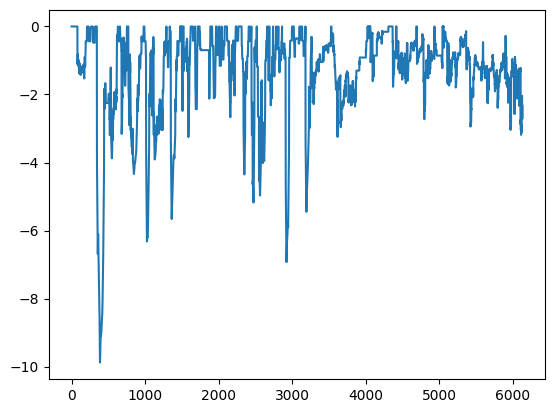

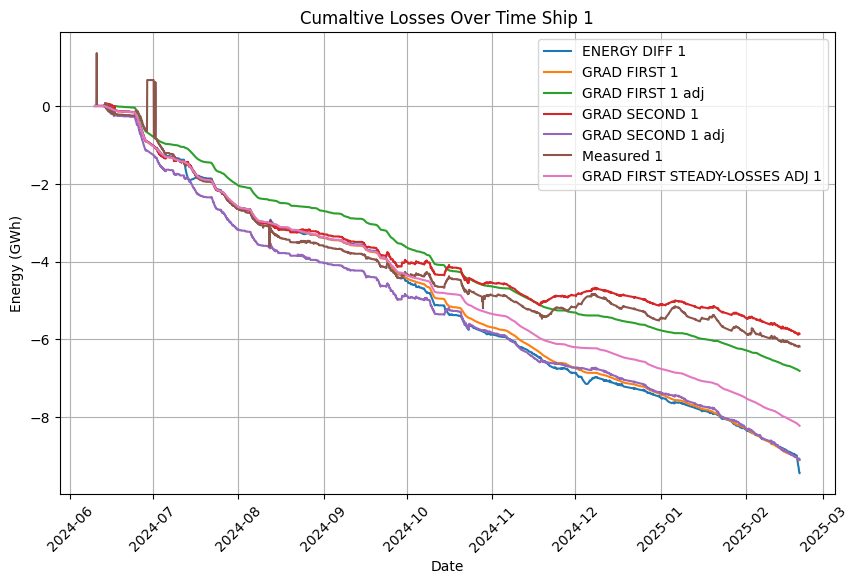

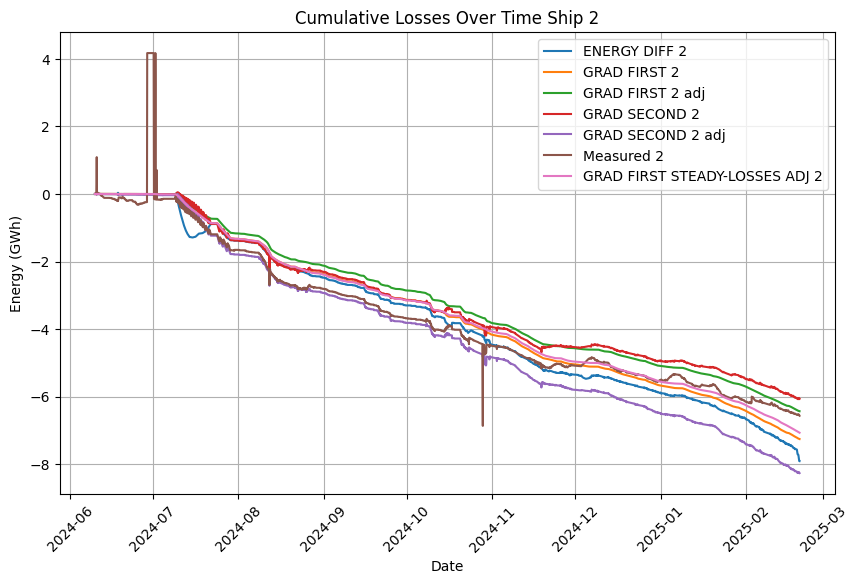

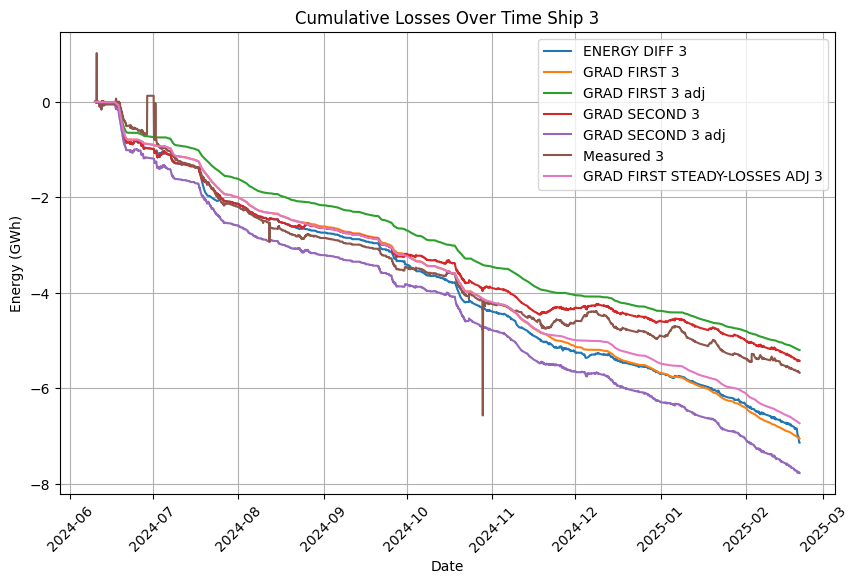

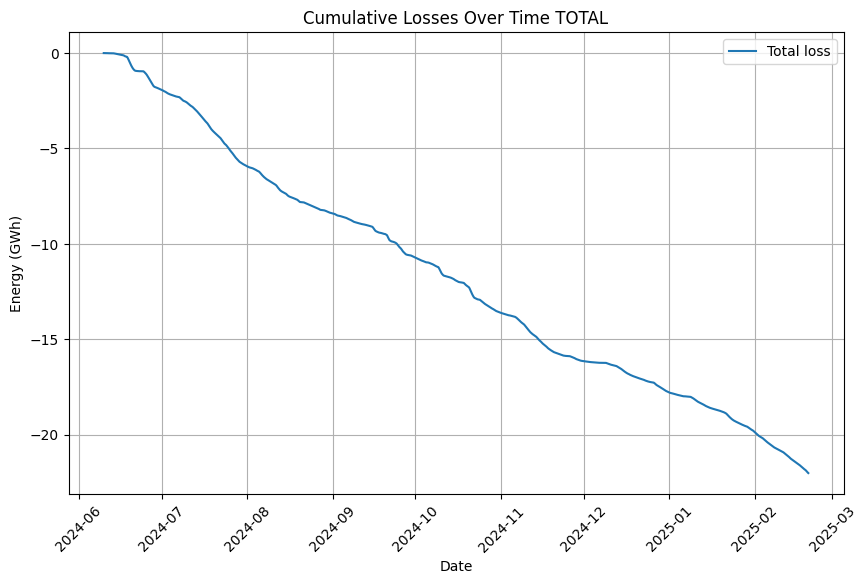

In [252]:
# COMPARE ALL THE WAYS TO CALCULATE POWER LOSS

def GRADIENT_SECOND_METHOD(energy, cum_charge_meas, cum_discharge_meas, discharge_meas, time_vec, adj=[1,1]):
    """Calculate through gradient second method. Adj is the adjusting constants for charging and dischargin."""

    # Calculate cumulative energy loss
    cum_energy_loss = energy -  adj[0] * cum_charge_meas - adj[1] * cum_discharge_meas - energy[0]

    # Calculate the power of the energy loss
    power_loss_vec, power_loss_vec_smooth, power_loss_vec_smoothest = power_loss_calculation(cum_energy_loss, time_vec, discharge_meas, smooth=24*5)

    return cum_energy_loss, power_loss_vec, power_loss_vec_smooth, power_loss_vec_smoothest


def GRADIENT_FIRST_METHOD(energy, time_vec, charge_meas, discharge_meas, df_power, adj=[1,1]):
    """Calculate through gradient first method. """

    # Power calculations 
    _, _, _, losses, steady_losses = calculate_power(energy, time_vec, adj[0] * charge_meas, adj[1] * discharge_meas)
   
    # Find the indicies of different stages
    find_charge, find_discharge, find_steady_losses = find_charge_discharge(df_power)

    # First smoothing
    gradient_first = smooth_over_windows(find_charge, find_discharge, find_steady_losses, losses, filter_size=25)

    # Final smoothing
    gradient_first = smooth_and_adjust_power(gradient_first, adj[1] * discharge_meas, threshold_factor=1, filter_size=25)

    # Calculate the cumulative energy loss
    cum_energy_loss = gradient_first.cumsum()

    return cum_energy_loss, gradient_first, steady_losses


def ENERGY_DIFF_METHOD(df_power, energy, steady_losses, cum_charge_meas, cum_discharge_meas, adj=[1,1]):
    """Calculate power based on energy difference. """

    # Use function to calculate the effective power (charge and discharge) 
    effective_calc_power_mean = calulate_charge_based_on_energy(df_power, energy)

    # Find the effective charge & discharge
    charge_calc_eff = np.where(effective_calc_power_mean > 0, effective_calc_power_mean, 0)
    discharge_calc_eff = np.where(effective_calc_power_mean < 0, effective_calc_power_mean, 0)

    # Calculate the cumulative charge & discharge & steady losses
    cum_charge_calc_eff = charge_calc_eff.cumsum()
    cum_discharge_calc_eff = discharge_calc_eff.cumsum()
    cum_steady_losses = steady_losses.cumsum()

    # Calculate the cumulative energy loss
    cum_loss_during_charging = (-cum_charge_meas + cum_charge_calc_eff)
    cum_loss_during_discharging = (cum_discharge_meas - cum_discharge_calc_eff)
    
    # Total cumulative loss
    cum_loss_ENERGY_DIFF = (cum_loss_during_charging + cum_loss_during_discharging + cum_steady_losses)/1000

    return cum_loss_ENERGY_DIFF # ALSO CALCULATE THE POWER LOSS VECTOR


############## Calcylate power through POWER_LOSS_CALC AND SMOOTH POWER (GRADIENT SECOND METHOD) #################

cum_energy_loss_grad_sec1, power_loss_vec_calc1, gradient_second1, power_loss_vec_calc_smoothest1 = GRADIENT_SECOND_METHOD(energy_skepp1, cum_charge_measured1, cum_discharge_measured1, discharge_measured1, temp_time_hours, adj=[1,1])
cum_energy_loss_grad_sec2, power_loss_vec_calc2, gradient_second2, power_loss_vec_calc_smoothest2 = GRADIENT_SECOND_METHOD(energy_skepp2, cum_charge_measured2_adjust, cum_discharge_measured2, discharge_measured2, temp_time_hours, adj=[1,1])
cum_energy_loss_grad_sec3, power_loss_vec_calc3, gradient_second3, power_loss_vec_calc_smoothest3 = GRADIENT_SECOND_METHOD(energy_skepp3, cum_charge_measured3, cum_discharge_measured3, discharge_measured3, temp_time_hours, adj=[1,1])

cum_energy_loss_grad_sec1_adj, power_loss_vec_calc1_adj, gradient_second1_adj, power_loss_vec_calc_smoothest1_adj = GRADIENT_SECOND_METHOD(energy_skepp1, cum_charge_measured1, cum_discharge_measured1, discharge_measured1, temp_time_hours, adj=[1.05, 0.89])
cum_energy_loss_grad_sec2_adj, power_loss_vec_calc2_adj, gradient_second2_adj, power_loss_vec_calc_smoothest2_adj = GRADIENT_SECOND_METHOD(energy_skepp2, cum_charge_measured2_adjust, cum_discharge_measured2, discharge_measured2, temp_time_hours, adj=[1.05, 0.94])
cum_energy_loss_grad_sec3_adj, power_loss_vec_calc3_adj, gradient_second3_adj, power_loss_vec_calc_smoothest3_adj = GRADIENT_SECOND_METHOD(energy_skepp3, cum_charge_measured3, cum_discharge_measured3, discharge_measured3, temp_time_hours, adj=[1.05, 0.91])


######################## calculated power function (GRADIENT FIRST METHOD) ################################

cum_energy_loss_grad_fir1, gradient_first1, steady_losses1 = GRADIENT_FIRST_METHOD(energy_skepp1, temp_time_hours, charge_measured1, discharge_measured1, df_power['Skepp 1 - Effekt [MW]'], adj=[1,1])
cum_energy_loss_grad_fir2, gradient_first2, steady_losses2 = GRADIENT_FIRST_METHOD(energy_skepp2, temp_time_hours, charge_measured2, discharge_measured2, df_power['Skepp 2 - Effekt [MW]'], adj=[1,1])
cum_energy_loss_grad_fir3, gradient_first3, steady_losses3 = GRADIENT_FIRST_METHOD(energy_skepp3, temp_time_hours, charge_measured3, discharge_measured3, df_power['Skepp 3 - Effekt [MW]'], adj=[1,1])

cum_energy_loss_grad_fir1_adj, gradient_first1_adj, steady_losses1_adj = GRADIENT_FIRST_METHOD(energy_skepp1, temp_time_hours, charge_measured1, discharge_measured1, df_power['Skepp 1 - Effekt [MW]'], adj = [0.95, 0.95])
cum_energy_loss_grad_fir2_adj, gradient_first2_adj, steady_losses2_adj = GRADIENT_FIRST_METHOD(energy_skepp2, temp_time_hours, charge_measured2, discharge_measured2, df_power['Skepp 2 - Effekt [MW]'], adj = [0.98, 0.98])
cum_energy_loss_grad_fir3_adj, gradient_first3_adj, steady_losses3_adj = GRADIENT_FIRST_METHOD(energy_skepp3, temp_time_hours, charge_measured3, discharge_measured3, df_power['Skepp 3 - Effekt [MW]'], adj = [0.95, 0.95])

######################## calculate power from energy diff function (ENERGY DIFF METHOD) ################################

cum_loss_ENERGY_DIFF1 = ENERGY_DIFF_METHOD(df_power['Skepp 1 - Effekt [MW]'], energy_skepp1, steady_losses1, cum_charge_measured1, cum_discharge_measured1)
cum_loss_ENERGY_DIFF2 = ENERGY_DIFF_METHOD(df_power['Skepp 2 - Effekt [MW]'], energy_skepp2, steady_losses2, cum_charge_measured2_adjust, cum_discharge_measured2)
cum_loss_ENERGY_DIFF3 = ENERGY_DIFF_METHOD(df_power['Skepp 3 - Effekt [MW]'], energy_skepp3, steady_losses3, cum_charge_measured3, cum_discharge_measured3)


####################### Calculate with (GRADIENT FIRST STEADY-LOSSES ADJ) ############################################
cum_loss_GRADIENT_FIRST_SL1, gradient_first_SL1 = GRADIENT_FIRST_STEADY_LOSSES(energy_skepp1, temp_time_hours, charge_measured1, discharge_measured1, df_power['Skepp 1 - Effekt [MW]'], adj=[1,1])
cum_loss_GRADIENT_FIRST_SL2, gradient_first_SL2 = GRADIENT_FIRST_STEADY_LOSSES(energy_skepp2, temp_time_hours, charge_measured2, discharge_measured2, df_power['Skepp 2 - Effekt [MW]'], adj=[1,1])
cum_loss_GRADIENT_FIRST_SL3, gradient_first_SL3 = GRADIENT_FIRST_STEADY_LOSSES(energy_skepp3, temp_time_hours, charge_measured3, discharge_measured3, df_power['Skepp 3 - Effekt [MW]'], adj=[1,1])

#######################################################################################################################

print(f'FVB predicted loss:          {round(power_loss_predicted_corrected[9*30*24],2)} GWh')
print(f'Total loss with best method: {np.round(-(cum_loss_GRADIENT_FIRST_SL1+cum_loss_GRADIENT_FIRST_SL2+cum_loss_GRADIENT_FIRST_SL3)[-1]/1000,2)} GWh')

###########
# print(gradient_first_SL1[6010:6040])
# print(cum_loss_GRADIENT_FIRST_SL1[6010:6040])
plt.plot(gradient_first_SL1)

############

plt.figure(figsize=(10, 6))
plt.plot(temp_time, cum_loss_ENERGY_DIFF1, label='ENERGY DIFF 1')
plt.plot(temp_time, cum_energy_loss_grad_fir1/1000, label='GRAD FIRST 1')
plt.plot(temp_time, cum_energy_loss_grad_fir1_adj/1000, label='GRAD FIRST 1 adj')
plt.plot(temp_time, cum_energy_loss_grad_sec1/1000, label='GRAD SECOND 1')
plt.plot(temp_time, cum_energy_loss_grad_sec1_adj/1000, label='GRAD SECOND 1 adj')
plt.plot(temp_time, energy_loss_meas1/1000, label = 'Measured 1')
plt.plot(temp_time, cum_loss_GRADIENT_FIRST_SL1/1000, label = 'GRAD FIRST STEADY-LOSSES ADJ 1')
plt.title('Cumaltive Losses Over Time Ship 1')
plt.xlabel('Date')
plt.ylabel('Energy (GWh)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(temp_time, cum_loss_ENERGY_DIFF2, label='ENERGY DIFF 2')
plt.plot(temp_time, cum_energy_loss_grad_fir2/1000, label='GRAD FIRST 2')
plt.plot(temp_time, cum_energy_loss_grad_fir2_adj/1000, label='GRAD FIRST 2 adj')
plt.plot(temp_time, cum_energy_loss_grad_sec2/1000, label='GRAD SECOND 2')
plt.plot(temp_time, cum_energy_loss_grad_sec2_adj/1000, label='GRAD SECOND 2 adj')
plt.plot(temp_time, energy_loss_meas2/1000, label = 'Measured 2')
plt.plot(temp_time, cum_loss_GRADIENT_FIRST_SL2/1000, label = 'GRAD FIRST STEADY-LOSSES ADJ 2')
plt.title('Cumulative Losses Over Time Ship 2')
plt.xlabel('Date')
plt.ylabel('Energy (GWh)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(temp_time, cum_loss_ENERGY_DIFF3, label='ENERGY DIFF 3')
plt.plot(temp_time, cum_energy_loss_grad_fir3/1000, label='GRAD FIRST 3')
plt.plot(temp_time, cum_energy_loss_grad_fir3_adj/1000, label='GRAD FIRST 3 adj')
plt.plot(temp_time, cum_energy_loss_grad_sec3/1000, label='GRAD SECOND 3')
plt.plot(temp_time, cum_energy_loss_grad_sec3_adj/1000, label='GRAD SECOND 3 adj')
plt.plot(temp_time, energy_loss_meas3/1000, label = 'Measured 3')
plt.plot(temp_time, cum_loss_GRADIENT_FIRST_SL3/1000, label = 'GRAD FIRST STEADY-LOSSES ADJ 3')
plt.title('Cumulative Losses Over Time Ship 3')
plt.xlabel('Date')
plt.ylabel('Energy (GWh)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(temp_time, (cum_loss_GRADIENT_FIRST_SL1+cum_loss_GRADIENT_FIRST_SL2+cum_loss_GRADIENT_FIRST_SL3)/1000, label='Total loss')
plt.title('Cumulative Losses Over Time TOTAL')
plt.xlabel('Date')
plt.ylabel('Energy (GWh)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

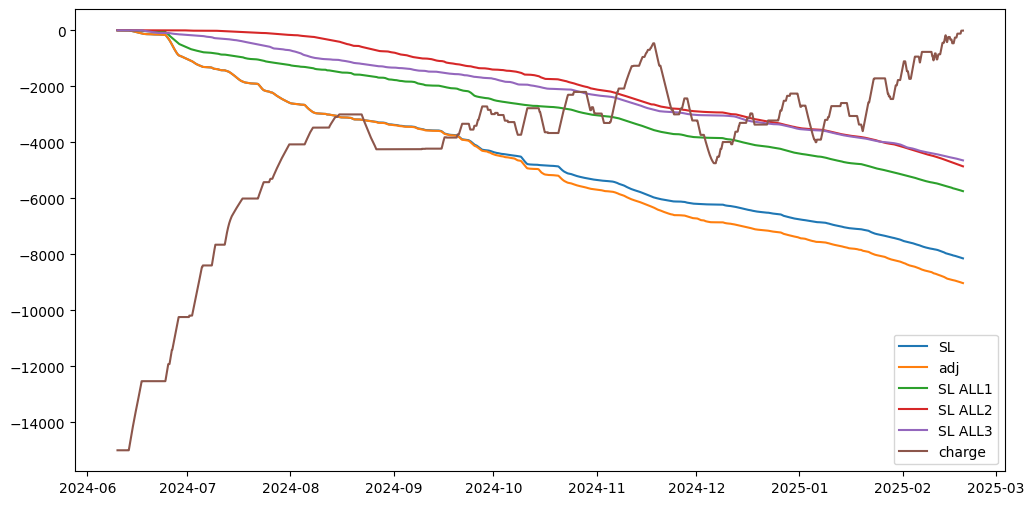

In [275]:
def calculate_mean_loss_during_dischargin(losses, find_discharge, find_steady_losses):
    """Calculate the loss during discharge through the mean values of the loss before and after discharge. """

    # Copy the losses and allocate
    new_loss = np.copy(losses)
    steady_index = []

    # Find the index for the steady losses before a discharge
    for d in find_discharge:
        for j, n in enumerate(find_steady_losses):
            #print(n)
            if n[0] <= d[0] <= n[1]:
                steady_index.append(j)
    
    idx_pre_dis = steady_index

    # Loop over the index of discharges. Calculate the mean loss for the period before and after discharge
    for dis_idx, i in enumerate(idx_pre_dis):


        # if the period before discharge is too short, use the previous steady loss. Calculate the mean loss for the period before discharge
        if i + 1 < len(find_steady_losses) and find_steady_losses[i][1] - find_steady_losses[i][0] > 2:
            mean_loss_pre_discharge = np.mean(new_loss[find_steady_losses[i][0]:find_steady_losses[i][1]])
            if np.isnan(mean_loss_pre_discharge):
   
                # Calculate without NaN values
                new_loss[find_steady_losses[i][0]:find_steady_losses[i][1]] = np.nan_to_num(new_loss[find_steady_losses[i][0]:find_steady_losses[i][1]])
                mean_loss_pre_discharge = np.mean(new_loss[find_steady_losses[i][0]:find_steady_losses[i][1]][new_loss[find_steady_losses[i][0]:find_steady_losses[i][1]] != 0])
 
        elif i + 2 < len(find_steady_losses) and find_steady_losses[i-1][1] - find_steady_losses[i-1][0] > 2:
            mean_loss_pre_discharge = np.mean(new_loss[find_steady_losses[i][0]:find_steady_losses[i][1]])
            if np.isnan(mean_loss_pre_discharge):

                # Calculate without NaN values
                new_loss[find_steady_losses[i-1][0]:find_steady_losses[i-1][1]] = np.nan_to_num(new_loss[find_steady_losses[i-1][0]:find_steady_losses[i-1][1]])
                mean_loss_pre_discharge = np.mean(new_loss[find_steady_losses[i-1][0]:find_steady_losses[i-1][1]][new_loss[find_steady_losses[i-1][0]:find_steady_losses[i-1][1]] != 0])

        else:
            mean_loss_pre_discharge = np.mean(new_loss[find_steady_losses[i][0]:find_steady_losses[i][1]])
            if np.isnan(mean_loss_pre_discharge):
                # calculate only with sorunding values
                mean_loss_pre_discharge =  np.mean((new_loss[find_steady_losses[i][0]-3:find_steady_losses[i][1]+3]))

        # if the period after discharge is too short, use the next steady loss. Calculate the mean loss for the period after discharge
        if i + 1 < len(find_steady_losses) and find_steady_losses[i+1][1] - find_steady_losses[i+1][0] > 2:
            mean_loss_post_discharge = np.mean(new_loss[find_steady_losses[i+1][0]:find_steady_losses[i+1][1]])
            if np.isnan(mean_loss_post_discharge):
                print('NaN value found in mean loss calculation 4')
        elif i + 2 < len(find_steady_losses) and find_steady_losses[i+2][1] - find_steady_losses[i+2][0] > 2:
            mean_loss_post_discharge = np.mean(new_loss[find_steady_losses[i+2][0]:find_steady_losses[i+2][1]])
            if np.isnan(mean_loss_post_discharge):
                print('NaN value found in mean loss calculation 7')
        else:
            mean_loss_post_discharge = np.mean(new_loss[find_steady_losses[i][0]:find_steady_losses[i][1]])
            if np.isnan(mean_loss_post_discharge):
                # calculate only with sorunding values
                mean_loss_post_discharge = np.mean((new_loss[find_steady_losses[i][0]-3:find_steady_losses[i][1]+3]))

        # Set the mean loss for the period during discharge
        new_loss[find_discharge[dis_idx][0]:find_discharge[dis_idx][1]] = (mean_loss_pre_discharge+mean_loss_post_discharge)/2

    return new_loss 

def GRADIENT_FIRST_STEADY_LOSSES_ALL(energy, time_vec, charge_meas, discharge_meas, df_power, adj=[1,1]):
    """Calculate through gradient first method. """

    # Power calculations 
    _, _, _, losses, steady_losses = calculate_power(energy, time_vec, adj[0] * charge_meas, adj[1] * discharge_meas)
   
    # Find the indicies of different stages
    find_charge, find_discharge, find_steady_losses = find_charge_discharge(df_power)

    # First smoothing
    gradient_first = smooth_over_windows(find_charge, find_discharge, find_steady_losses, losses, filter_size=25)

    # Final smoothing
    gradient_first = smooth_and_adjust_power(gradient_first, adj[1] * discharge_meas, threshold_factor=1, filter_size=25)

    # Calculate the mean loss around discharging
    gradient_first = calculate_mean_loss_during_dischargin(gradient_first, find_discharge, find_steady_losses)

    gradient_first = calculate_mean_loss_during_dischargin(gradient_first, find_charge, find_steady_losses)

    # Calculate the cumulative energy loss
    cum_energy_loss = gradient_first.cumsum()

    return cum_energy_loss, gradient_first

cum_loss_GRADIENT_FIRST_SL1_ALL, gradient_first_SL1_ALL = GRADIENT_FIRST_STEADY_LOSSES_ALL(energy_skepp1, temp_time_hours, charge_measured1, discharge_measured1, df_power['Skepp 1 - Effekt [MW]'], adj=[1,1])
cum_loss_GRADIENT_FIRST_SL2_ALL, gradient_first_SL2_ALL = GRADIENT_FIRST_STEADY_LOSSES_ALL(energy_skepp2, temp_time_hours, charge_measured2, discharge_measured2, df_power['Skepp 2 - Effekt [MW]'], adj=[1,1])
cum_loss_GRADIENT_FIRST_SL3_ALL, gradient_first_SL3_ALL = GRADIENT_FIRST_STEADY_LOSSES_ALL(energy_skepp3, temp_time_hours, charge_measured3, discharge_measured3, df_power['Skepp 3 - Effekt [MW]'], adj=[1,1])

# Test
when = slice(0, 6100)
plt.figure(figsize=(12, 6))
plt.plot(temp_time[when], cum_loss_GRADIENT_FIRST_SL1[when], label='SL')
plt.plot(temp_time[when], cum_energy_loss_grad_fir1[when], label='adj')
plt.plot(temp_time[when], cum_loss_GRADIENT_FIRST_SL1_ALL[when], label='SL ALL1')
plt.plot(temp_time[when], cum_loss_GRADIENT_FIRST_SL2_ALL[when], label='SL ALL2')
plt.plot(temp_time[when], cum_loss_GRADIENT_FIRST_SL3_ALL[when], label='SL ALL3')
plt.plot(temp_time[when], cum_charge_measured1[when]+cum_discharge_measured1[when]-15000, label='charge') 
plt.legend()  



Pearson correlation:  -0.83
Spearman correlatio: -0.84
Pearson correlation:  -0.85
Spearman correlatio: -0.84
Pearson correlation:  -0.89
Spearman correlatio: -0.86
Pearson correlation:  -0.8
Spearman correlatio: -0.79
-6480.662546228675
-6732.586139394375


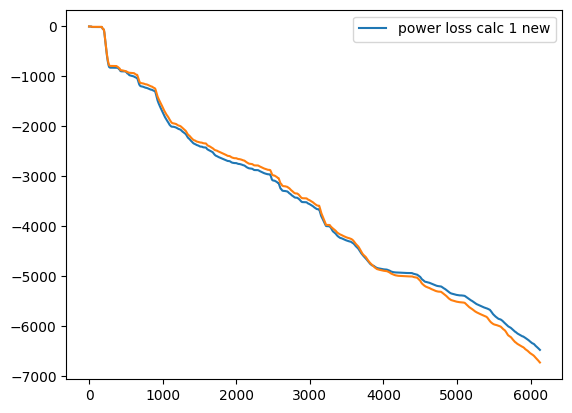

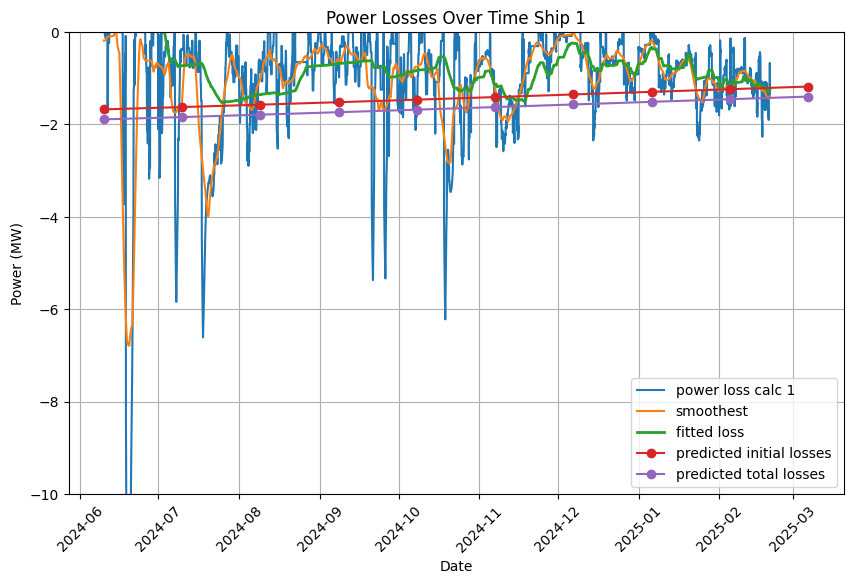

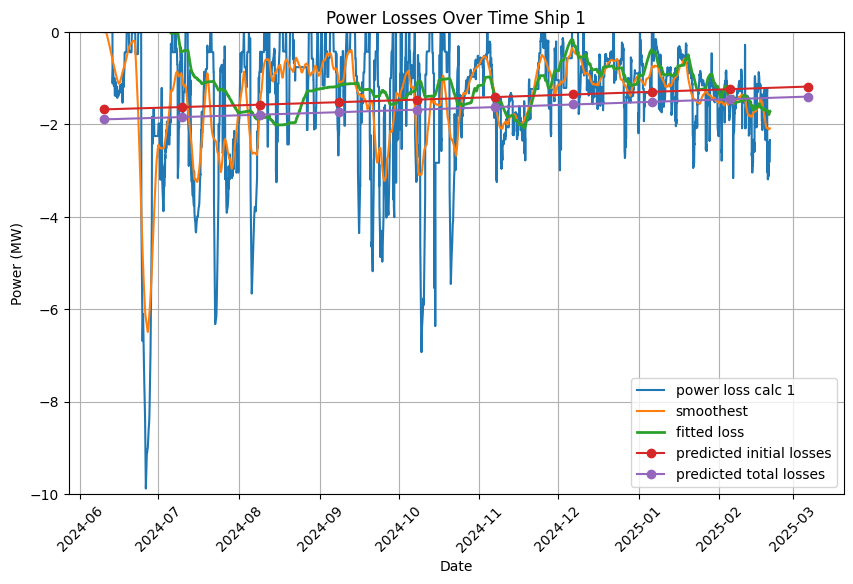

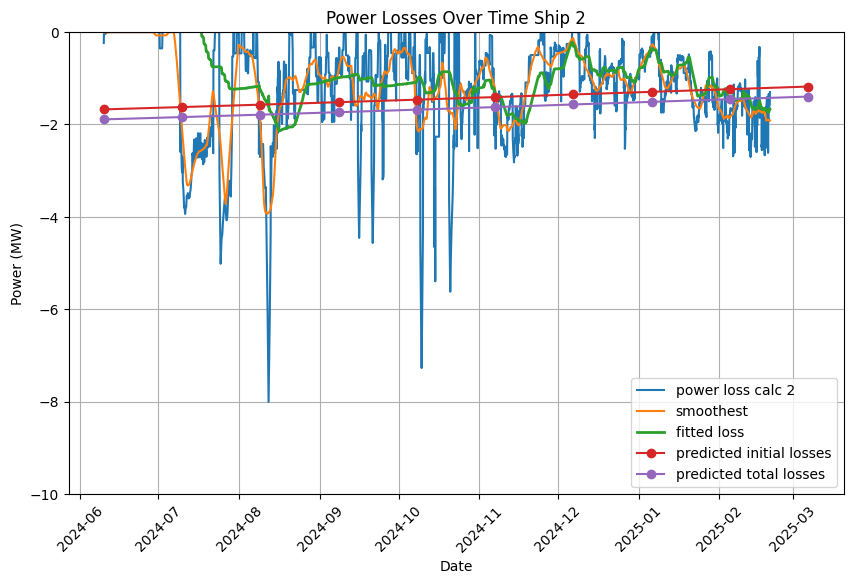

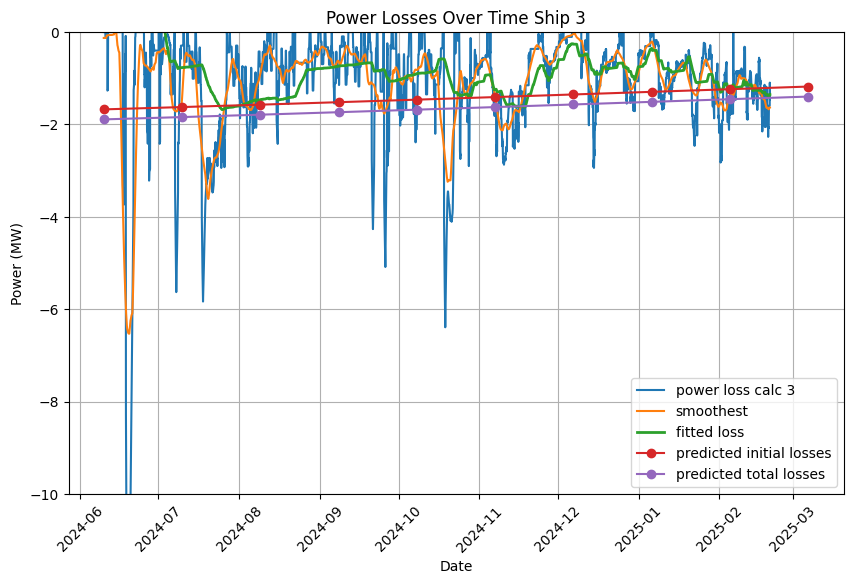

In [ ]:
from scipy.stats import pearsonr, spearmanr
from numpy.polynomial.polynomial import Polynomial

# Define the linear model
def linear_model(energy, k):
    """Linear model for power loss calculation. m is the total calculated continuation loss divided by three ships."""
    m = fvb_cont_loss = FVB_continuous_loss_formula(95, 45)/3
    return k * energy #- m

# Fit polynomial regression model
def polynomial_model(x, y, degree):
    p = Polynomial.fit(x, y, degree)
    return p

# Automized function for fitting the power loss
def power_loss_fit(energy, power_loss,power_loss_predicted_normalized):
    """Fit the power loss to the energy. """

    # Calculate the smoothed loss using uniform filter
    smoothed_loss = np.copy(power_loss)

    # Apply a uniform filter to smooth the data
    smoothed_loss = uniform_filter(smoothed_loss, 120)

    # improve the fit by removing the first part of the data
    dates = slice(4000,len(smoothed_loss)) 

    # apply curve fit
    params, covariance = curve_fit(linear_model, energy[dates], smoothed_loss[dates])

    # Calculate the fitted loss using the fitted parameters
    k1 = params[0]*power_loss_predicted_normalized[0:len(energy)]

    # calcualte the linear fit
    m = FVB_continuous_loss_formula(95, 45)/3
    fitted_loss = linear_model(energy, k1[:]) - m

    # Compute Pearson and Spearman correlations for each ship
    pearson_corr, _ = pearsonr(energy[dates], smoothed_loss[dates])
    spearman_corr, _ = spearmanr(energy[dates], smoothed_loss[dates])

    print(f'Pearson correlation:  {round(pearson_corr, 2)}')
    print(f'Spearman correlatio: {round(spearman_corr, 2)}')

    return fitted_loss, smoothed_loss, pearson_corr, spearman_corr

energy_skepp1_new = thermal_energy_new(t_bot_min,t_top_min, skepp3_temp, skepp3_sep_vol_y, df_levels['Skepp 3 [m]'],top_volume3,2)*1000
cum_loss_GRADIENT_FIRST_SL1_new, gradient_first_SL1_new = GRADIENT_FIRST_STEADY_LOSSES(energy_skepp1_new, temp_time_hours, charge_measured3, discharge_measured3, df_power['Skepp 3 - Effekt [MW]'], adj=[1,1])
fitted_loss1_new, gradient_first_SL1_smoothest_new, pearson_corr, spearman_corr= power_loss_fit(energy_skepp1_new, gradient_first_SL1_new ,power_loss_predicted_normalized)

plt.plot(cum_loss_GRADIENT_FIRST_SL1_new, label='power loss calc  new')
plt.plot(cum_loss_GRADIENT_FIRST_SL3, label='power loss calc old')
plt.legend()

fitted_loss1, gradient_first_SL1_smoothest, pearson_corr, spearman_corr = power_loss_fit(energy_skepp1, gradient_first_SL1 ,power_loss_predicted_normalized)
fitted_loss2, gradient_first_SL2_smoothest, pearson_corr, spearman_corr = power_loss_fit(energy_skepp2, gradient_first_SL2 ,power_loss_predicted_normalized)
fitted_loss3, gradient_first_SL3_smoothest, pearson_corr, spearman_corr = power_loss_fit(energy_skepp3, gradient_first_SL3 ,power_loss_predicted_normalized)


print(np.cumsum(gradient_first_SL1_new[:])[-1])
print(np.cumsum(gradient_first_SL3[:])[-1])


plt.figure(figsize=(10, 6))
plt.plot(temp_time,gradient_first_SL1_new, label='power loss calc 1')
plt.plot(temp_time,gradient_first_SL1_smoothest_new, label='smoothest')
plt.plot(temp_time,fitted_loss1_new, label='fitted loss', linewidth=2)
plt.plot(daily_time[::30*24], -power_loss_predicted_initial[::30*24]/3, 'o-', label='predicted initial losses')
plt.plot(daily_time[::30*24], -power_loss_predicted_all[::30*24]/3, 'o-', label='predicted total losses')
plt.xlabel('Date')
plt.ylabel('Power (MW)')
plt.title('Power Losses Over Time Ship 1')
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim(-10,0)
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(temp_time,gradient_first_SL1, label='power loss calc 1')
plt.plot(temp_time,gradient_first_SL1_smoothest, label='smoothest')
plt.plot(temp_time,fitted_loss1, label='fitted loss', linewidth=2)
plt.plot(daily_time[::30*24], -power_loss_predicted_initial[::30*24]/3, 'o-', label='predicted initial losses')
plt.plot(daily_time[::30*24], -power_loss_predicted_all[::30*24]/3, 'o-', label='predicted total losses')
plt.xlabel('Date')
plt.ylabel('Power (MW)')
plt.title('Power Losses Over Time Ship 1')
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim(-10,0)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(temp_time,gradient_first_SL2, label='power loss calc 2')
plt.plot(temp_time,gradient_first_SL2_smoothest, label='smoothest')
plt.plot(temp_time,fitted_loss2, label='fitted loss', linewidth=2)
plt.plot(daily_time[::30*24], -power_loss_predicted_initial[::30*24]/3, 'o-', label='predicted initial losses')
plt.plot(daily_time[::30*24], -power_loss_predicted_all[::30*24]/3, 'o-', label='predicted total losses')
plt.xlabel('Date')
plt.ylabel('Power (MW)')
plt.title('Power Losses Over Time Ship 2')
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim(-10,0)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(temp_time,gradient_first_SL3, label='power loss calc 3')
plt.plot(temp_time,gradient_first_SL3_smoothest, label='smoothest')
plt.plot(temp_time,fitted_loss3, label='fitted loss', linewidth=2)
plt.plot(daily_time[::30*24], -power_loss_predicted_initial[::30*24]/3, 'o-', label='predicted initial losses')
plt.plot(daily_time[::30*24], -power_loss_predicted_all[::30*24]/3, 'o-', label='predicted total losses')
plt.xlabel('Date')
plt.ylabel('Power (MW)')
plt.title('Power Losses Over Time Ship 3')
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim(-10,0)
plt.legend()
plt.show()



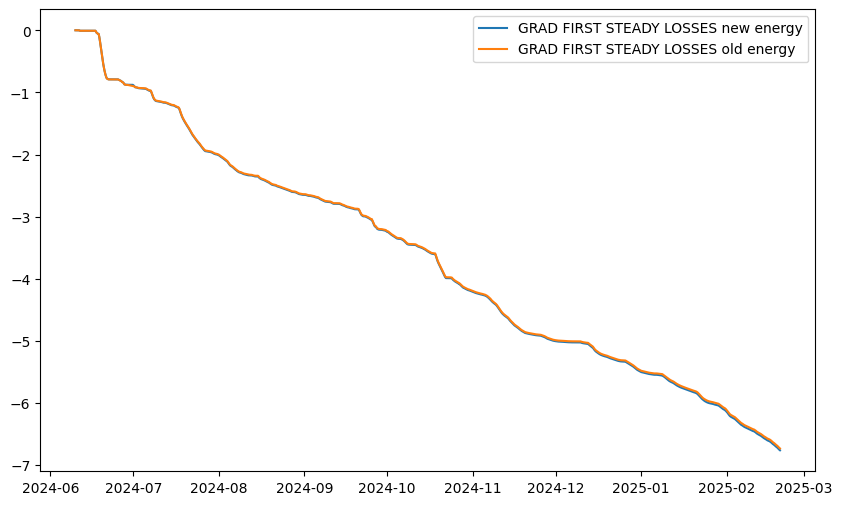

In [ ]:
def smooth_cumulative_loss(E, search_back=150):
    """ Function to ilimate bumps and smooth data. Finds regions where the derivative is positive (i.e., the curve is incorrectly increasing).
Searches backward from those points to find a point where the derivative is strongly negative (indicating the start of the incorrect bump).
Applies linear interpolation between the negative spike and the end of the positive bump. """

    # start up
    E = E.copy()
    dE = np.gradient(E)
    i = 100

    while i < len(dE) - 1:
        # Step 1: Find the start of a positive bump
        if dE[i] > 0.002:
            start_pos = i
            # Find the end of the positive bump
            end_pos = i
            while end_pos < len(dE) - 1 and dE[end_pos] > 0:
                end_pos += 1 # last point

            # Step 2: Look back from start_pos up to `search_back` steps for the most negative slope
            back_start = max(0, start_pos - search_back)
            window = dE[back_start:start_pos]
            if len(window) == 0:
                i += 1
                continue
            
            # Find the index for highest neg derivitive
            min_index = np.argmin(window)
            start_interp = back_start + min_index

            # Step 3: Linear interpolation
            if start_interp < end_pos:
                x = np.array([start_interp, end_pos])
                y = np.array([E[start_interp], E[end_pos]])
                interp = np.interp(np.arange(start_interp, end_pos + 1), x, y)
                E[start_interp-5:end_pos + 1 -5] = interp

                # Update derivative and index
                dE = np.gradient(E)
                i = end_pos + 1
            else:
                i += 1
        else:
            i += 1
        
    # Apply smoothing filter
    E = pd.Series(uniform_filter(E, 48))
    return E

# compare losses between the different energy calculations
# to bort bruset (statistiska moder) karakteristisk läng/tid

cum_loss_GRADIENT_FIRST_SL1, gradient_first_SL1 = GRADIENT_FIRST_STEADY_LOSSES(energy_skepp3, temp_time_hours, charge_measured3, discharge_measured3, df_power['Skepp 3 - Effekt [MW]'], adj=[1,1])
cum_loss_GRADIENT_FIRST_SL1_ENERGY, gradient_first_SL1_ENERGY = GRADIENT_FIRST_STEADY_LOSSES(skepp3_energy*1000, temp_time_hours, charge_measured3, discharge_measured3, df_power['Skepp 3 - Effekt [MW]'], adj=[1,1])



plt.figure(figsize=(10, 6))
plt.plot(temp_time, cum_loss_GRADIENT_FIRST_SL1_ENERGY/1000, label='GRAD FIRST STEADY LOSSES new energy')
plt.plot(temp_time, cum_loss_GRADIENT_FIRST_SL1/1000, label='GRAD FIRST STEADY LOSSES old energy')
plt.legend()
plt.show()

###################

new1 = smooth_cumulative_loss(cum_loss_ENERGY_DIFF1)
new2 = smooth_cumulative_loss(cum_loss_ENERGY_DIFF2)
new3 = smooth_cumulative_loss(cum_loss_ENERGY_DIFF3)


sli = slice(0,6100)
plt.figure(figsize=(10, 6))
plt.plot(temp_time[sli],cum_loss_ENERGY_DIFF1[sli], label = 'old')
plt.plot(temp_time[sli], new1[sli], label = 'new')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(temp_time[sli],cum_loss_ENERGY_DIFF2[sli], label = 'old')
plt.plot(temp_time[sli], new2[sli], label = 'new')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(temp_time[sli],cum_loss_ENERGY_DIFF3[sli], label = 'old')
plt.plot(temp_time[sli], new3[sli], label = 'new')
plt.legend()
plt.show()

losses_ED1, fitted_loss_ED1, ED1_smoothest, pearson_corr, spearman_corr = power_loss_fit_ENERGY_DIFF(new1, energy_skepp1, temp_time_hours, charge_measured1, discharge_measured1, df_power['Skepp 1 - Effekt [MW]'],power_loss_predicted_normalized)

plt.plot(losses_ED1)
plt.plot(fitted_loss_ED1)
plt.plot(ED1_smoothest)



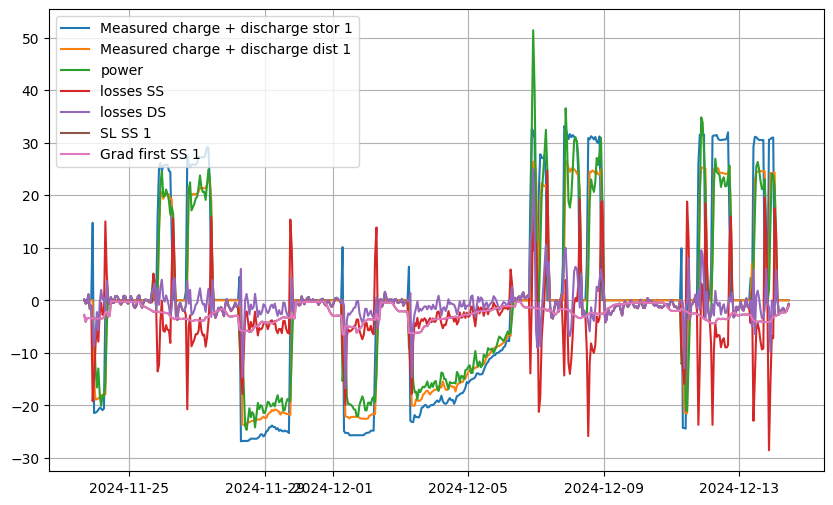

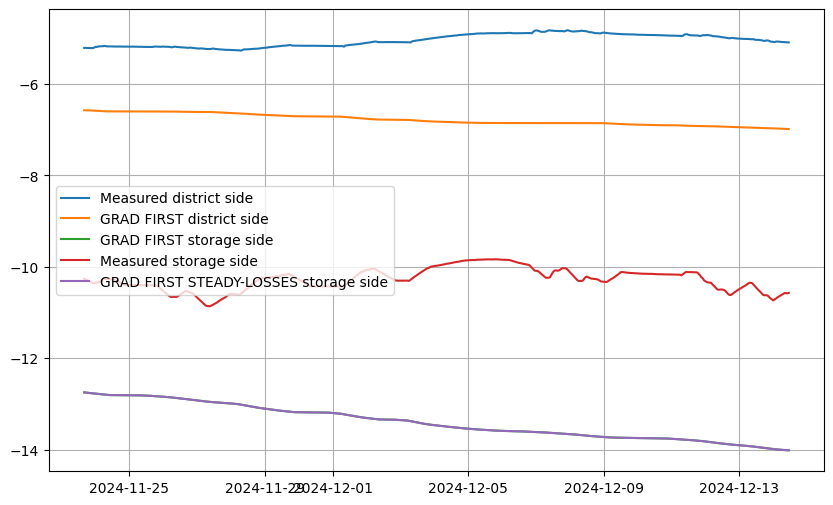

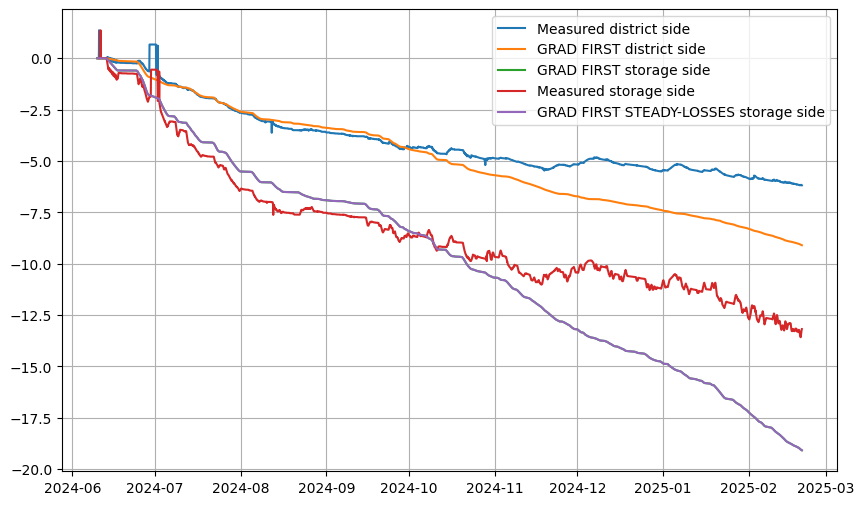

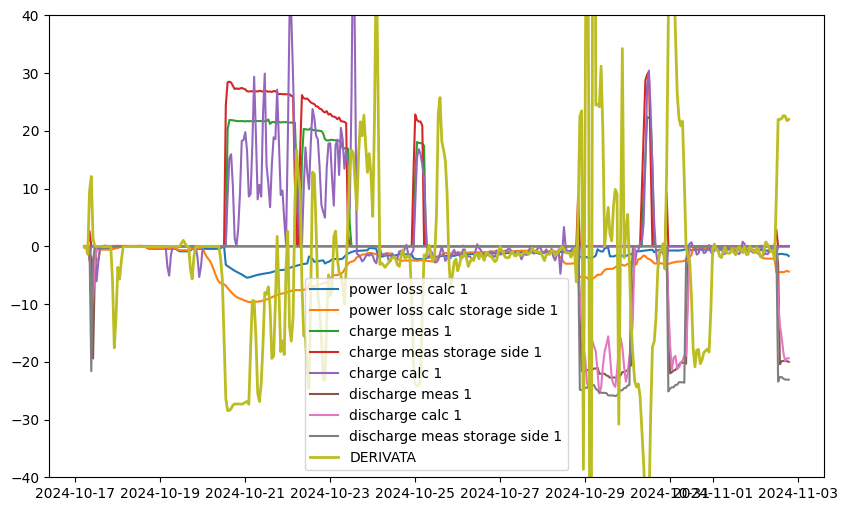

In [253]:
# TEST ATT ANVÄNDA DEN ANDRA UPPMÄTTA EFFEKTEN

# Take the cumulative sum of the charge and discharge and adjust the energy, keep the same shape
charge_measured1_new = df_power_storage['Effekt 1 - lagersida'].apply(lambda x: x if x > 0 else 0)
cum_charge_measured1_new = charge_measured1_new.cumsum()
discharge_measured1_new = df_power_storage['Effekt 1 - lagersida'].apply(lambda x: x if x < 0 else 0)
cum_discharge_measured1_new = discharge_measured1_new.cumsum()

charge_measured2_new = df_power_storage['Effekt 2 - lagersida'].apply(lambda x: x if x > 0 else 0)
cum_charge_measured2_new = charge_measured2_new.cumsum()
discharge_measured2_new = df_power_storage['Effekt 2 - lagersida'].apply(lambda x: x if x < 0 else 0)
cum_discharge_measured2_new = discharge_measured2_new.cumsum()

charge_measured3_new = df_power_storage['Effekt 3 - lagersida'].apply(lambda x: x if x > 0 else 0)
cum_charge_measured3_new = charge_measured3_new.cumsum()
discharge_measured3_new = df_power_storage['Effekt 3 - lagersida'].apply(lambda x: x if x < 0 else 0)
cum_discharge_measured3_new = discharge_measured3_new.cumsum()


cum_loss_meas1 = df_power['Skepp 1 Energi [MWh]'] - cum_charge_measured1_new - cum_discharge_measured1_new - df_power['Skepp 1 Energi [MWh]'].iloc[0]
cum_loss_meas2 = df_power['Skepp 2 Energi [MWh]'] - cum_charge_measured2_new - cum_discharge_measured2_new - df_power['Skepp 2 Energi [MWh]'].iloc[0]
cum_loss_meas3 = df_power['Skepp 3 Energi [MWh]'] - cum_charge_measured3_new - cum_discharge_measured3_new - df_power['Skepp 3 Energi [MWh]'].iloc[0]

cum_loss_meas1_grad = np.gradient(cum_loss_meas1[0:6129], temp_time_hours)
cum_energy_loss_grad_fir1_storage_side, gradient_first1_storage_side, steady_losses1_storage_side = GRADIENT_FIRST_METHOD(energy_skepp1, temp_time_hours, charge_measured1_new, discharge_measured1_new, df_power_storage['Effekt 1 - lagersida'], adj=[1,1])


cum_loss_GRADIENT_FIRST_SL1_storage_side, gradient_first_SL1_storage_side = GRADIENT_FIRST_STEADY_LOSSES(energy_skepp1, temp_time_hours, charge_measured1_new, discharge_measured1_new, df_power_storage['Effekt 1 - lagersida'], adj=[1,1])
cum_loss_GRADIENT_FIRST_SL2_storage_side, gradient_first_SL2_storage_side = GRADIENT_FIRST_STEADY_LOSSES(energy_skepp2, temp_time_hours, charge_measured2_new, discharge_measured2_new, df_power_storage['Effekt 2 - lagersida'], adj=[1,1])
cum_loss_GRADIENT_FIRST_SL3_storage_side, gradient_first_SL3_storage_side = GRADIENT_FIRST_STEADY_LOSSES(energy_skepp3, temp_time_hours, charge_measured3_new, discharge_measured3_new, df_power_storage['Effekt 3 - lagersida'], adj=[1,1])



power1_to, charge_calc1_to, discharge_calc1_to, losses1_to, steady_losses1_to = calculate_power(energy_skepp1, temp_time_hours, charge_measured1, discharge_measured1)
power1_t, charge_calc1_t, discharge_calc1_t, losses1_t, steady_losses1_t = calculate_power(energy_skepp1, temp_time_hours, charge_measured1_new, discharge_measured1_new)

cum_energy_loss_grad_fir1_ss, gradient_first1_ss, steady_losses1_ss = GRADIENT_FIRST_METHOD(energy_skepp1, temp_time_hours, charge_measured1_new, discharge_measured1_new, df_power_storage['Effekt 1 - lagersida'], adj=[1,1])




dates = slice(4000, 4500)
plt.figure(figsize=(10, 6))
plt.plot(temp_time[dates], charge_measured1_new[dates] + discharge_measured1_new[dates], label='Measured charge + discharge stor 1')
plt.plot(temp_time[dates], charge_measured1[dates] + discharge_measured1[dates], label='Measured charge + discharge dist 1')
plt.plot(temp_time[dates], power1_t[dates], label='power')
plt.plot(temp_time[dates], losses1_t[dates], label='losses SS')
plt.plot(temp_time[dates], losses1_to[dates], label='losses DS')
plt.plot(temp_time[dates], gradient_first_SL1_storage_side[dates], label='SL SS 1')
plt.plot(temp_time[dates], gradient_first1_ss[dates], label='Grad first SS 1')
plt.grid(True)
plt.legend()


plt.figure(figsize=(10, 6))
plt.plot(temp_time[dates], energy_loss_meas1[dates]/1000, label='Measured district side')
plt.plot(temp_time[dates], cum_energy_loss_grad_fir1[dates]/1000, label='GRAD FIRST district side')
plt.plot(temp_time[dates], cum_energy_loss_grad_fir1_storage_side[dates]/1000, label = 'GRAD FIRST storage side ')
plt.plot(temp_time[dates], cum_loss_meas1[dates]/1000, label = 'Measured storage side ')
plt.plot(temp_time[dates], cum_loss_GRADIENT_FIRST_SL1_storage_side[dates]/1000, label = 'GRAD FIRST STEADY-LOSSES storage side')
plt.grid(True)
plt.legend()

plt.figure(figsize=(10, 6))
plt.plot(temp_time, energy_loss_meas1/1000, label='Measured district side')
plt.plot(temp_time, cum_energy_loss_grad_fir1/1000, label='GRAD FIRST district side')
plt.plot(temp_time, cum_energy_loss_grad_fir1_storage_side/1000, label = 'GRAD FIRST storage side ')
plt.plot(temp_time, cum_loss_meas1[0:6129]/1000, label = 'Measured storage side ')
plt.plot(temp_time, cum_loss_GRADIENT_FIRST_SL1_storage_side/1000, label = 'GRAD FIRST STEADY-LOSSES storage side')
plt.grid(True)
plt.legend()


when = slice(3100,3500)
plt.figure(figsize=(10, 6))
plt.plot(temp_time[when], gradient_first1[when], label='power loss calc 1')
plt.plot(temp_time[when], gradient_first1_storage_side[when], label='power loss calc storage side 1')
plt.plot(temp_time[when], charge_measured1[when], label='charge meas 1')
plt.plot(temp_time[when], charge_measured1_new[when], label='charge meas storage side 1')
plt.plot(temp_time[when], charge_calc1[when], label='charge calc 1')
plt.plot(temp_time[when], discharge_measured1[when], label='discharge meas 1')
plt.plot(temp_time[when], discharge_calc1[when], label='discharge calc 1')
plt.plot(temp_time[when], discharge_measured1_new[when], label='discharge meas storage side 1')

plt.plot(temp_time[when], cum_loss_meas1_grad[when], linewidth = 2, label='DERIVATA')
plt.ylim(-40,40)
plt.legend()

Försök till förklaring varför district side är bättre. Man vill att den uträknade effekten ska vara störra än den uppmätta för att förlusterna ska tas i beaktning. Det blir dock bara större skillnad med SS för den har mer effekt (när man vill ha mindre). Därav också de justerade värdena. 

In [ ]:
print(f'Total loss with best method: {-np.round((cum_loss_GRADIENT_FIRST_SL1_storage_side[-1]+cum_loss_GRADIENT_FIRST_SL2_storage_side[-1]+cum_loss_GRADIENT_FIRST_SL3_storage_side[-1])/1000,2)} GWh')
print(f'Total loss measured        : {np.round((cum_loss_meas1.iloc[6128]+cum_loss_meas2.iloc[6128]+cum_loss_meas3.iloc[6128])/1000,2)} GWh')

tot_charge1_fjärr = cum_charge_measured1.iloc[-1] / 1000
tot_charge1_lager = cum_charge_measured1_new.iloc[-1] / 1000

print(f'tot charge fjärr: {round(tot_charge1_fjärr, 2)}')
print(f'tot charge lager: {round(tot_charge1_lager, 2)}')

tot_discharge1_fjärr = cum_discharge_measured1.iloc[-1] / 1000
tot_discharge1_lager = cum_discharge_measured1_new.iloc[-1] / 1000

print(f'tot discharge fjärr: {round(tot_discharge1_fjärr, 2)}')
print(f'tot discharge lager: {round(tot_discharge1_lager, 2)}')

energy_now1 = energy_skepp1[-1] / 1000
print(f'energy now: {round(energy_now1, 2)}')

print('loss fjärr: ', round((df_power['Skepp 1 Energi [MWh]'].iloc[-1]/1000 - tot_charge1_fjärr - tot_discharge1_fjärr), 2))
print('loss lager: ', round((energy_now1 - tot_charge1_lager - tot_discharge1_lager), 2))
print('')

tot_charge2_fjärr = cum_charge_measured2_adjust[-1] / 1000
tot_charge2_lager = cum_charge_measured2_new.iloc[-1] / 1000

print(f'tot charge fjärr: {round(tot_charge2_fjärr, 2)}')
print(f'tot charge lager: {round(tot_charge2_lager, 2)}')

tot_discharge2_fjärr = cum_discharge_measured2.iloc[-1] / 1000
tot_discharge2_lager = cum_discharge_measured2_new.iloc[-1] / 1000

print(f'tot discharge fjärr: {round(tot_discharge2_fjärr, 2)}')
print(f'tot discharge lager: {round(tot_discharge2_lager, 2)}')

energy_now2 = energy_skepp2[-1] / 1000
print(f'energy now: {round(energy_now2, 2)}')

print('loss fjärr: ', round((energy_now2 - tot_charge2_fjärr - tot_discharge2_fjärr), 2))
print('loss lager: ', round((energy_now2 - tot_charge2_lager - tot_discharge2_lager), 2))
print('')

tot_charge3_fjärr = cum_charge_measured3.iloc[-1] / 1000
tot_charge3_lager = cum_charge_measured3_new.iloc[-1] / 1000

print(f'tot charge fjärr: {round(tot_charge3_fjärr, 2)}')
print(f'tot charge lager: {round(tot_charge3_lager, 2)}')

tot_discharge3_fjärr = cum_discharge_measured3.iloc[-1] / 1000
tot_discharge3_lager = cum_discharge_measured3_new.iloc[-1] / 1000

print(f'tot discharge fjärr: {round(tot_discharge3_fjärr, 2)}')
print(f'tot discharge lager: {round(tot_discharge3_lager, 2)}')

energy_now3 = energy_skepp3[-1] / 1000
print(f'energy now: {round(energy_now3, 2)}')

print('loss fjärr: ', round((energy_now3 - tot_charge3_fjärr - tot_discharge3_fjärr), 2))
print('loss lager: ', round((energy_now3 - tot_charge3_lager - tot_discharge3_lager), 2))
print('')

print('loss tot fjärr: ', round((energy_now1 + energy_now2 + energy_now3 + ( - tot_charge1_fjärr - tot_discharge1_fjärr  - tot_charge2_fjärr - tot_discharge2_fjärr - tot_charge3_fjärr - tot_discharge3_fjärr)*0.8), 2))
print('loss tot lager: ', round((energy_now1 - tot_charge1_lager - tot_discharge1_lager + energy_now2 - tot_charge2_lager - tot_discharge2_lager + energy_now3 - tot_charge3_lager - tot_discharge3_lager), 2))

# detta förklarar felet med ovan metoden
plt.plot(temp_time, energy_skepp1 - cum_charge_measured1 - cum_discharge_measured1)
plt.plot(temp_time, energy_skepp1)


Förklaring varför den enskla uträkningen inste stämmer. När man enbart tar (Energi_idag - tot_laddning - tot_urladdning) så glömmer man bort hur energin har sett ut från start. Man måste ta bort start värdet. Det ser man i grafen ovan. Det är samma sak som att säga om  energiinnehållet idag är säg 3500 MWh så kan man bara ta ut 3500MWh för man sätter referenspunkten till 0. Men om referenspunkten istället är -5000. Så är motsvarande energi vi har idag -1500 MWh. Eftersom energinivån startade på -5000, och det är orimligt att ha det som referens, kan man alltså plussa på referensvärdet på och därför få en rimlig referenspunkt på 0. 

In [51]:

# Adjust the odd datapoints. This does not help

def adjust_odd_datapoints(temp_data,power, comparison_charge, threshold=10):
    """Adjust odd datapoints in a timeseries with the previous value if the previous value is not odd."""
    # Copy the data
    data_new = np.copy(temp_data)
    count = 0
    # Loop through the data
    for t in range(1, len(temp_data)):
        
        if comparison_charge[t] == 0 and power[t] > 0:
            data_new[t] = data_new[t-1]
            count += 1

        elif comparison_charge[t] == 0 and power[t] < -threshold:
            data_new[t] = data_new[t-1]
            count += 1
            
    return data_new, count


# Adjust the odd datapoints. 
# NO NEED TO
skepp1_temp_ny,count = adjust_odd_datapoints(skepp1_temp,power1, df_power['Skepp 1 - Effekt [MW]'].values) 
energy_skepp1_ny = thermal_energy(t_bot_min, t_top_min, skepp1_temp_ny, skepp1_sep_vol_y, 2)*1000 # Convert to MWh
power1, charge_calc1, discharge_calc1, losses1, steady_losses1 = calculate_power(energy_skepp1_ny, temp_time_hours, charge_measured1, discharge_measured1)

# this is just a miss in temperature, its corrects but should be over more time. 
val = slice(3220, 3270)

In [52]:
# charge effiency
def calculate_charging_efficiency(calc_charge, measured_charge):
    """Calculate the charging or discharging efficiency. """
    return 100 * np.sum(calc_charge) / np.sum(measured_charge)

def fourier_law(k, A, T_h,T_c, dx):
    """Fourier's Law. Calculates the heat transfer rate. """
    return k * A * (T_h - T_c) / dx

def thermal_effiencey(Q_in, Q_out):
    """Thermal efficiency. Calculates the efficiency of the thermal energy. """
    return 100 * np.sum(Q_out) / np.sum(Q_in)

def degree_of_utilization(E_max, Q_out):
    """Degree of Utilization. Calculates the degree of utilization of the thermal energy. """
    return 100 * np.sum(Q_out) / E_max


skepp_charge_test = thermal_energy(t_bot_min, t_top_min, skepp1_temp, skepp1_sep_vol_y, 2)*1000 # Convert to MWh


time = slice(4000, 6129)

# Calcualte the power
power_charge_test, charge_calc_charge_test, discharge_calc_charge_test, losses_charge_test, steady_losses_charge_test = calculate_power(skepp_charge_test[time], temp_time_hours[time], charge_measured1[time], discharge_measured1[time])

# Calculate the charging and discharging efficiency, disregarding the losses of the accumulator itself
mean_loss = np.mean(steady_losses_charge_test[steady_losses_charge_test != 0])
mean_loss_smooth = np.mean(smooth_tot[test_find_steady_losses[0][0]:test_find_steady_losses[-1][1]])


print(f'Mean loss from steady_losses:          {-round(mean_loss,2)} MW') 
print(f'Mean loss from smoothed steady losses: {-round(mean_loss_smooth,2)} MW') 


charge_eff = calculate_charging_efficiency(charge_calc_charge_test[charge_calc_charge_test != 0] - 0, charge_measured1[time])
discharge_eff = calculate_charging_efficiency(-discharge_calc_charge_test[discharge_calc_charge_test != 0] - 0, discharge_measured1[time])


print(f'Discharge efficiency:  {round(-discharge_eff,2)} %')
print(f'Charge efficiency:     {round(charge_eff,2)} %')




Mean loss from steady_losses:          0.97 MW
Mean loss from smoothed steady losses: 1.15 MW
Discharge efficiency:  92.31 %
Charge efficiency:     95.51 %


Discharge:
ratio mellan calc/meas 1: 0.8964992290267458
ratio mellan calc/meas 2: 0.9682240079334123
ratio mellan calc/meas 3: 0.9321075549248555

Charge:
ratio mellan calc/meas 1: 0.8400491207473253
ratio mellan calc/meas 2: 0.8604813667194384
ratio mellan calc/meas 3: 0.8587035733429718



i snitt kanske runt 98% verkningsgrad? 

med mean loss borträknat:
99% discharge skepp 3, 91.6% charge
104% (97 annars) discharge skepp 2, 91 % 
97% discharge skepp 1, 91.3% charge


beror på vad som assusmas är förlusten....

95 % - 95 % för 1 
95 % - 104 % för discharge (100 med loss = 0) för 2 
93 % - 98.6 % för 3 


Initial temperature in the bedrock: 12.540634155273 °C
Indices where the bedrock migh give back energy:
[3405]


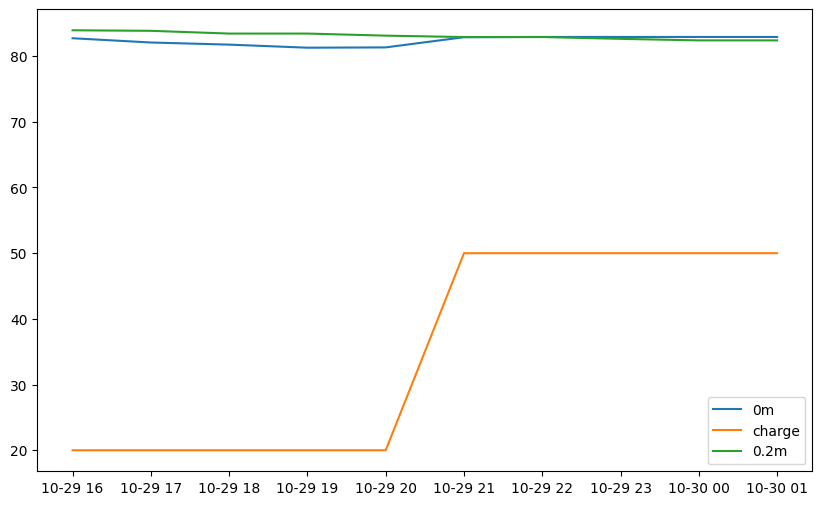

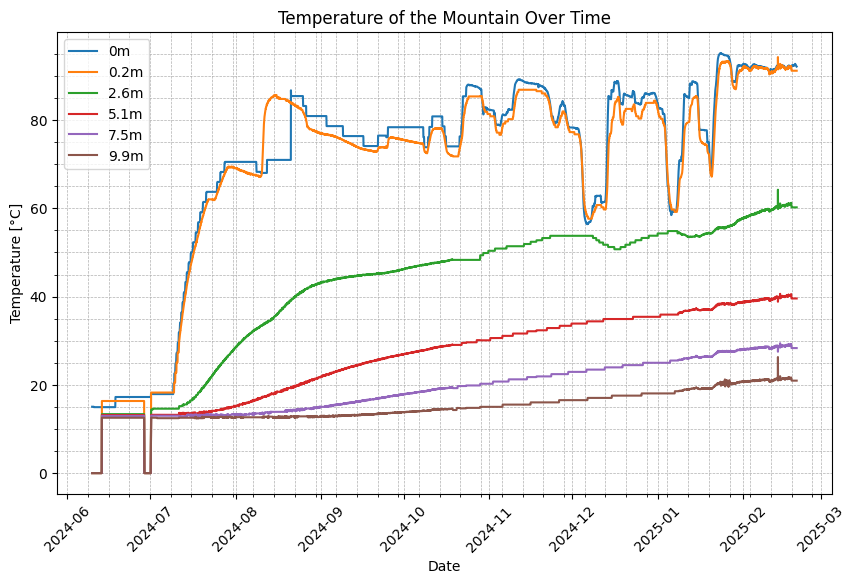

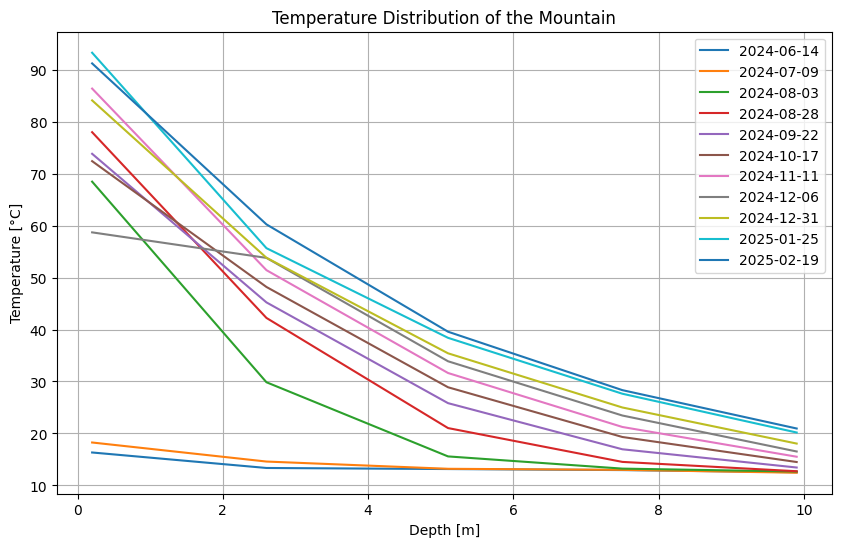

In [261]:
def level_temperature(T, level):
    """Level Temperature. Calculates the temperature of a specific level. """
    temp_level = np.zeros(len(T))

    # Get the temperature of one leve
    for i in range(len(T)):
        temp_level[i] = T[i][level]
    return temp_level

# Starting temperature in the bedrock
bedrock_init_temp = df_berg_temp['9.9m'].iloc[100]
print(f'Initial temperature in the bedrock: {bedrock_init_temp} °C')

# Calculate the temperature of the ship at level 19, 18.5 meter height
skepp2_temp_level18 = level_temperature(skepp2_temp, 18)

# Adjust charge and discharge to 1 and -1, respectively
binary_power = df_power['Skepp 2 - Effekt [MW]'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# Find indices where binary power is zero and the gradient of skepp2_temp_level18 is positive
indices = np.where((binary_power == 0) & (np.gradient(skepp2_temp_level18) > 0.1) & (np.gradient(df_berg_temp['0.2m'].values)< -0.1))[0]
print('Indices where the bedrock migh give back energy:')
print(indices)

# no detection of the bedrock giving back energy
when = slice(3400, 3410)
plt.figure(figsize=(10, 6))
plt.plot(temp_time[when], skepp2_temp_level18[when], label='0m') 
plt.plot(temp_time[when], binary_power[when]*30+50, label='charge') 
plt.plot(df_berg_temp['time'].iloc[when], df_berg_temp['0.2m'].iloc[when], label='0.2m')
plt.legend()


# Mountain temperatures
plt.figure(figsize=(10, 6))
plt.plot(temp_time, skepp2_temp_level18, label='0m') 
#plt.plot(temp_time, binary_power*30+50, label='18.5m') 
plt.plot(df_berg_temp['time'], df_berg_temp['0.2m'], label='0.2m')
plt.plot(df_berg_temp['time'], df_berg_temp['2.6m'], label='2.6m')
plt.plot(df_berg_temp['time'], df_berg_temp['5.1m'], label='5.1m')
plt.plot(df_berg_temp['time'], df_berg_temp['7.5m'], label='7.5m')
plt.plot(df_berg_temp['time'], df_berg_temp['9.9m'], label='9.9m')
plt.xlabel('Date')
plt.ylabel('Temperature [°C]')
plt.title('Temperature of the Mountain Over Time')
plt.legend()
plt.grid(True)
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.show()

# Mountain temperature distribution 
plt.figure(figsize=(10, 6))
plt.xlabel('Depth [m]')
plt.ylabel('Temperature [°C]')
plt.title('Temperature Distribution of the Mountain')
plt.grid(True)

x = np.array([0.2, 2.6, 5.1, 7.5, 9.9])
mountain_temp_dist = np.zeros((len(df_berg_temp), len(x))) # 5 columns for each depth level
for i in range(100, len(df_berg_temp), 600):  # Iterate every 100th value
    mountain_temp_dist[i] = df_berg_temp.iloc[i, 1:].values
    plt.plot(x, mountain_temp_dist[i], label=df_berg_temp['time'].iloc[i].strftime('%Y-%m-%d'))

plt.legend()
plt.show()

Thermocline size 1.0
Thermocline start 15.0


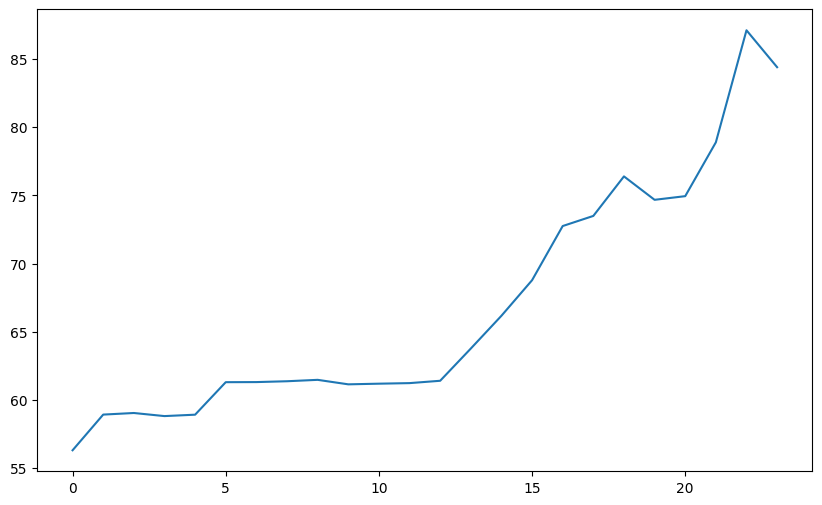

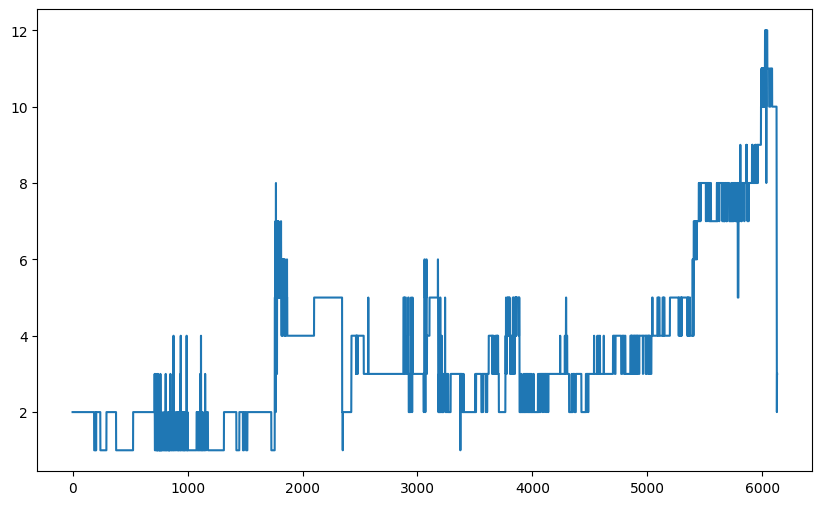

In [54]:

# stratification analysis

def stratification_analysis(T):
    """Stratification Analysis. Calculates the stratification of the ship. """
    
    # Calculate the gradient of the temperature
    gradient = np.gradient(T, axis=1)

    # Pre allocate
    max_gradient = np.zeros(len(gradient))
    min_gradient = np.zeros(len(gradient))
    thermocline_size = np.zeros(len(gradient))
    thermocline_start = np.zeros(len(gradient))

    # loop for each time step
    for g in range(len(gradient)):
        # Calculate the maximum and minimum gradient for each time step
        max_gradient[g] = np.max(gradient[g])
        min_gradient[g] = np.min(gradient[g])
    
        # find where the gradient is greater than half the maximum gradient
        thermocline_index = np.where(gradient[g] > max_gradient[g]/2)[0]
        
        # Identify groups of consecutive indices
        consecutive_groups = np.split(thermocline_index, np.where(np.diff(thermocline_index) != 1)[0] + 1)

        # Find the largest group of consecutive indices
        largest_group = max(consecutive_groups, key=len)

        thermocline_size[g] = len(np.array(largest_group))
        thermocline_start[g] = largest_group[0]

    return thermocline_size, thermocline_start

# Calculate the stratification of the ship
thermocline_size, thermocline_start = stratification_analysis(skepp2_temp)

val = 2350
print(f'Thermocline size {thermocline_size[val]}')
print(f'Thermocline start {thermocline_start[val]}')

plt.figure(figsize=(10, 6))
plt.plot(skepp2_temp[val], label='Thermocline start')

plt.figure(figsize=(10, 6))
plt.plot(thermocline_size, label='Thermocline size')

